In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

from mc_lib.rndm import RndmWrapper
from mc_lib.observable import RealObservable

import cy_ising
import cy_ising_cluster
import exact_ising

from utils import read_conformation
from utils import radius_of_gyration
from utils import mean_conections
from utils import R_to_norm
from utils import norm_to_R
import utils

In [2]:
def draw_conformation(struct):
    %matplotlib inline
    struct = np.array(struct)
    plt.plot(struct[:, 0], struct[:, 1], '-go')
    plt.scatter(struct[0, 0], struct[0, 1])
    plt.scatter(struct[-1, 0], struct[-1, 1])
    plt.grid(True)
    plt.axis('off')
    plt.show()

In [3]:
def measure_structure(struct_1, b_min=0, b_max=1, N=10, n_sweeps=100000, num_therm=100000):
    draw_conformation(struct_1)
    print("conformation length: ", len(struct_1))
    
    ene = np.empty(N, dtype=RealObservable)
    mag2 = np.empty(N, dtype=RealObservable)
    mag4 = np.empty(N, dtype=RealObservable)
    ene_arr = [0] * N
    neighbors = tabulate_neighbors(struct_1)
    
    mean_nghbrs = mean_conections(neighbors)
    L = len(struct_1)
    betas = np.linspace(b_min+(b_max-b_min)/N, b_max, N)
    
    for i in range(N):
        ene[i], mag2[i], mag4[i], ene_arr[i] = cy_ising.simulate(L=L,
                                                                 neighbors=neighbors,
                                                                 beta=betas[i],
                                                                 num_sweeps=n_sweeps,
                                                                 num_therm=num_therm)
    
#     plt.figure()
#     plt.title("Energy")
#     plt.xlabel("beta")
#     plt.ylabel("H")
#     plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
#     plt.grid(True)
#     plt.show()
    
#     plt.figure()
#     plt.title("Magnetization")
#     plt.xlabel("beta")
#     plt.ylabel("m^2")
#     plt.errorbar(betas, [m.mean for m in mag2], yerr = [m.errorbar for m in mag2], fmt='o-')
#     plt.grid(True)
#     plt.show()
    
    return ene, mag2, mag4, ene_arr, mean_nghbrs

In [4]:
def measure_structure_cluster(struct_1, b_min=0, b_max=1, N=10, n_sweeps=100000, num_therm=100000, p=1):
    draw_conformation(struct_1)
    print("conformation length: ", len(struct_1))
    
    ene = np.empty(N, dtype=RealObservable)
    mag2 = np.empty(N, dtype=RealObservable)
    mag4 = np.empty(N, dtype=RealObservable)
    ene_arr = [0] * N
    neighbors = tabulate_neighbors(struct_1)
    
    mean_nghbrs = mean_conections(neighbors)
    L = len(struct_1)
    betas = np.linspace(b_min+(b_max-b_min)/N, b_max, N)
    
    for i in range(N):
        ene[i], mag2[i], mag4[i], ene_arr[i] = cy_ising_cluster.simulate(L=L,
                                                                 neighbors=neighbors,
                                                                 beta=betas[i],
                                                                 num_sweeps=n_sweeps,
                                                                 num_therm=num_therm,
                                                                 cluster_upd_prob=p)
    
#     plt.figure()
#     plt.title("Energy")
#     plt.xlabel("beta")
#     plt.ylabel("H")
#     plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
#     plt.grid(True)
#     plt.show()
    
#     plt.figure()
#     plt.title("Magnetization")
#     plt.xlabel("beta")
#     plt.ylabel("m^2")
#     plt.errorbar(betas, [m.mean for m in mag2], yerr = [m.errorbar for m in mag2], fmt='o-')
#     plt.grid(True)
#     plt.show()
    
    return ene, mag2, mag4, ene_arr, mean_nghbrs

# Binder cumulant

## 500 length conformation cumulant

In [13]:
dir_name = 'Conformations\\L500_beta0.1_1_10\\'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 100


0 R = 23.061769830354653 False


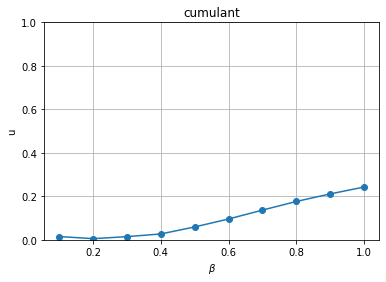

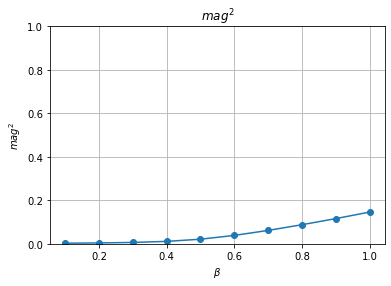

1 R = 11.159358438184048 True


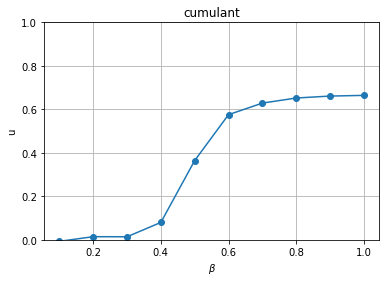

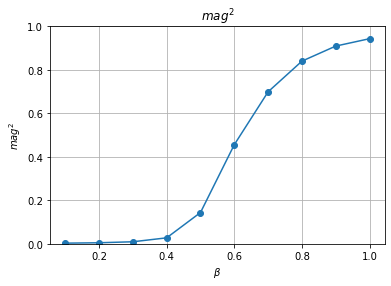

2 R = 10.33688193234087 True


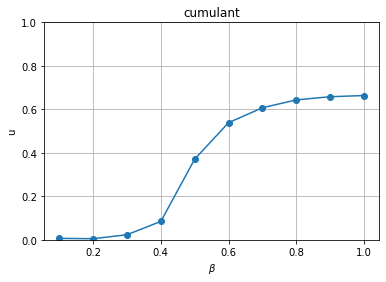

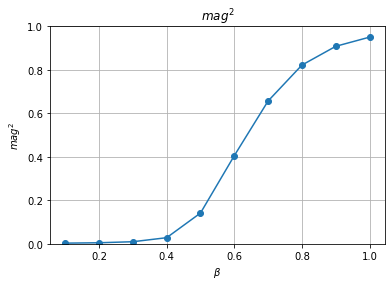

3 R = 10.499633413767299 True


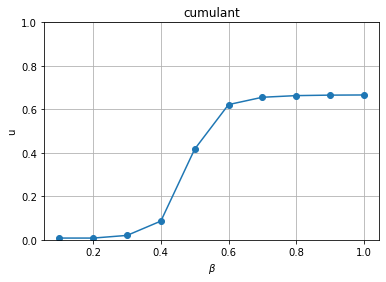

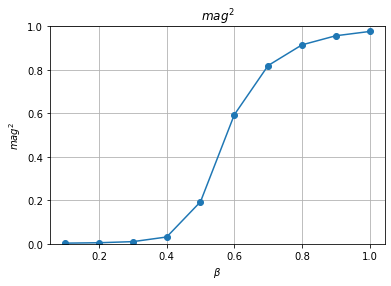

4 R = 11.019947245512355 True


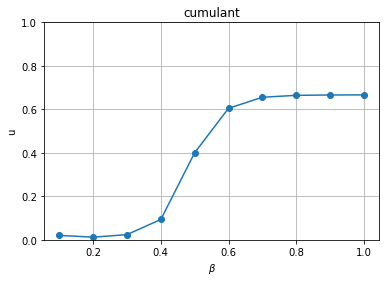

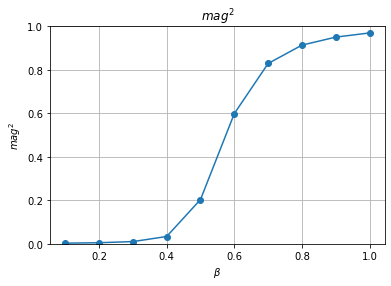

5 R = 10.316399270674651 True


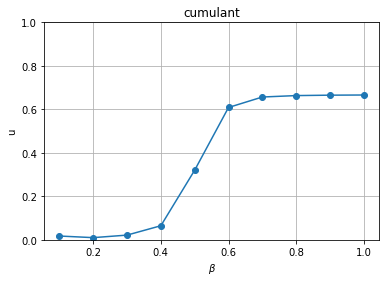

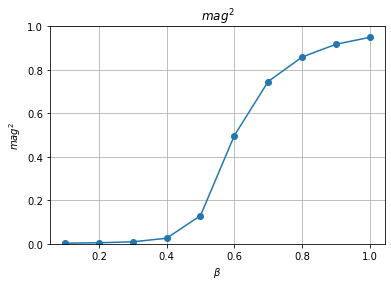

6 R = 9.927248799341589 True


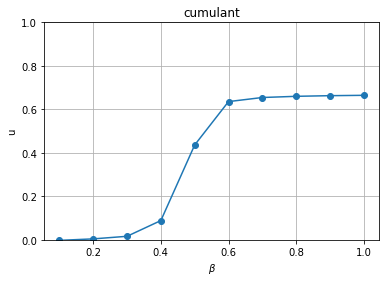

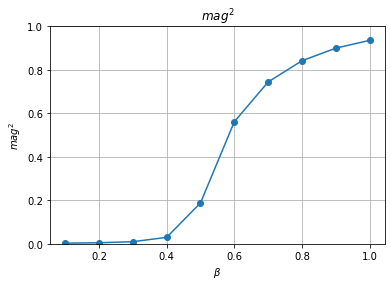

7 R = 16.01942836592415 True


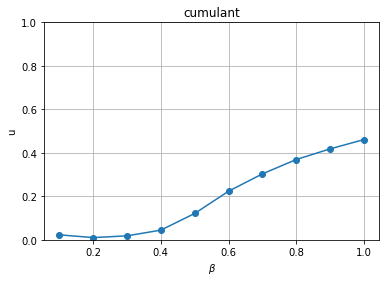

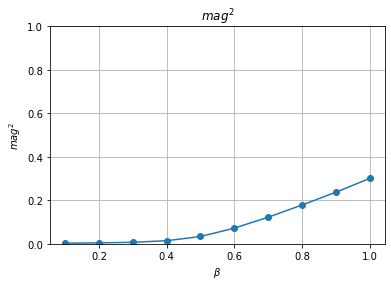

8 R = 13.931256942584858 True


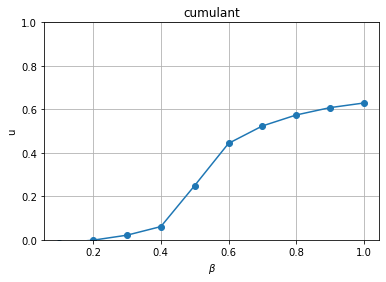

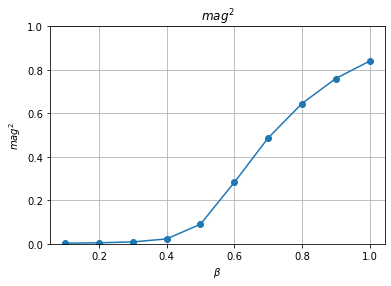

9 R = 10.744485578320983 True


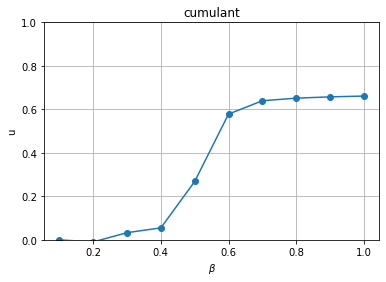

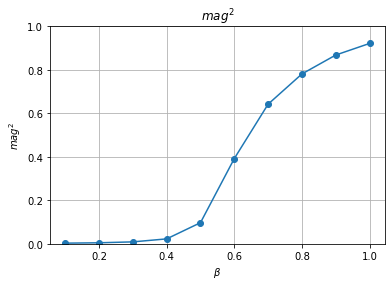

10 R = 24.45475617260894 False


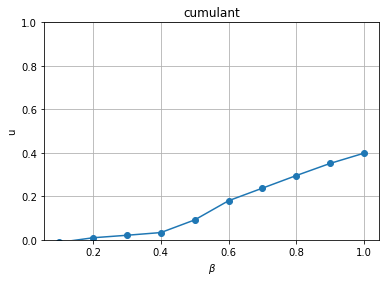

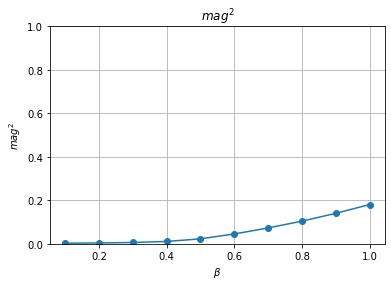

11 R = 10.58449139269336 True


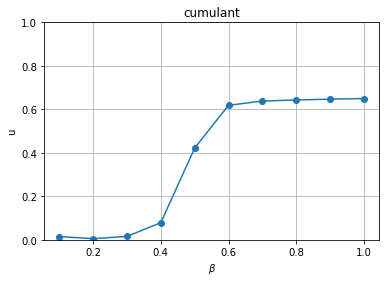

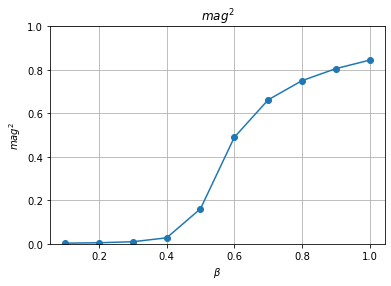

12 R = 9.97803971971951 True


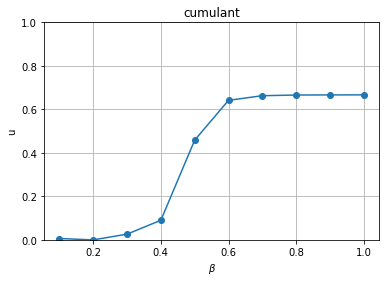

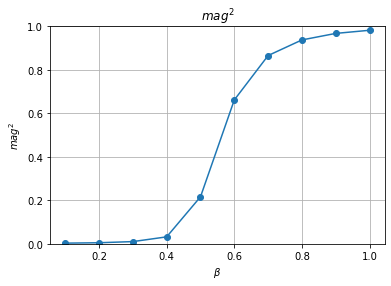

13 R = 16.17730079265426 True


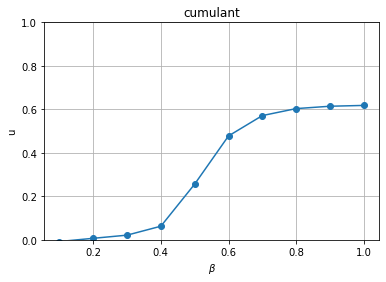

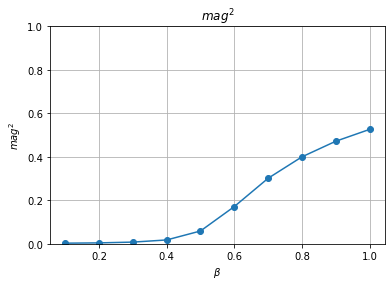

14 R = 10.189696023932175 True


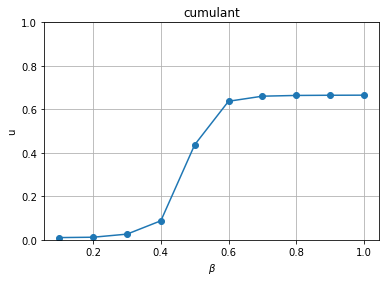

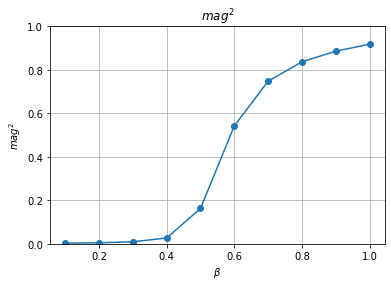

15 R = 9.77047070312207 True


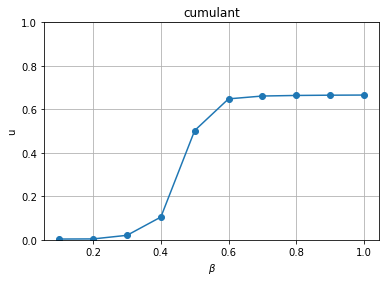

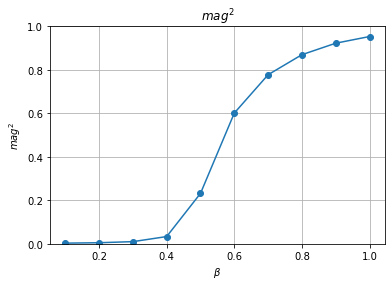

16 R = 9.948379721473902 True


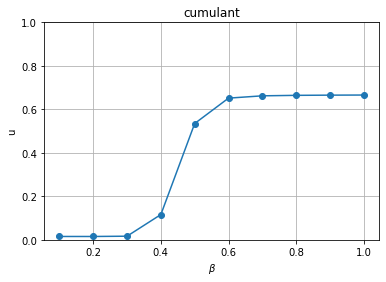

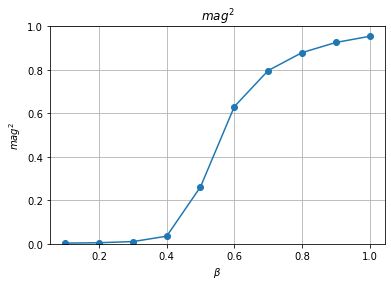

17 R = 10.667977213405816 True


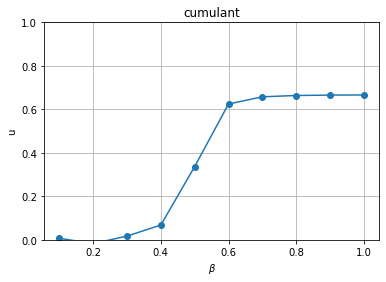

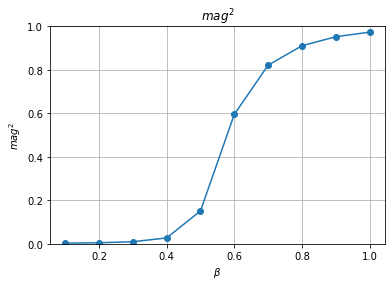

18 R = 10.304711685437304 True


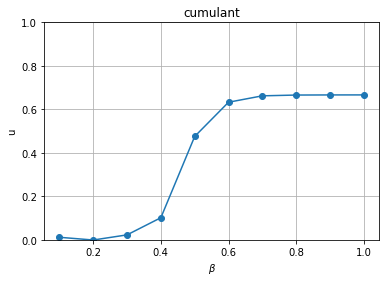

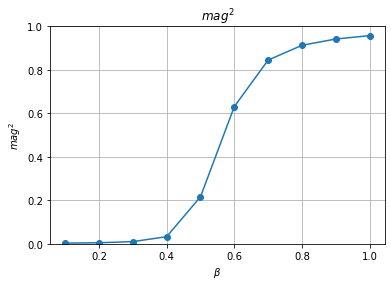

19 R = 10.590392519612635 True


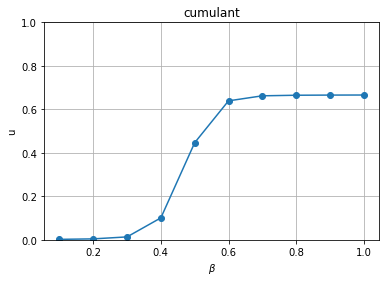

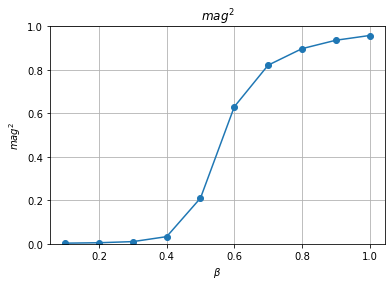

20 R = 15.71082114582466 False


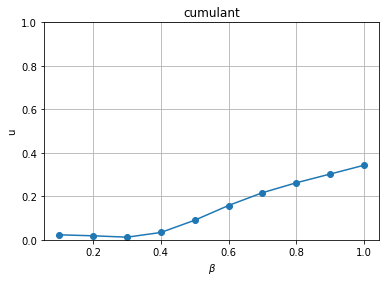

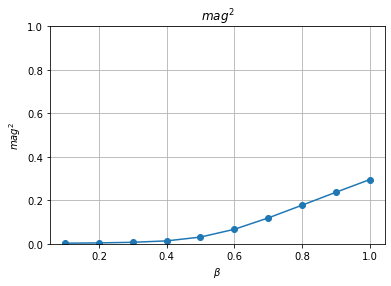

21 R = 23.364369654401813 False


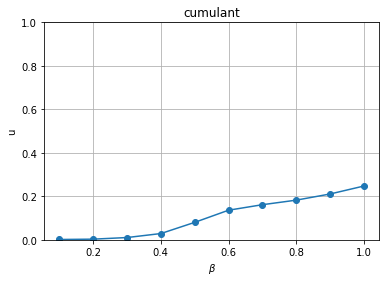

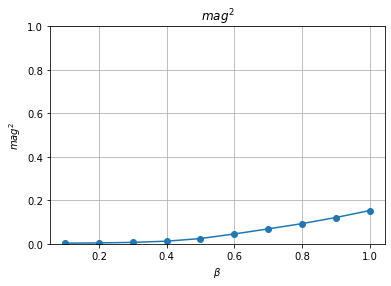

22 R = 10.695884377728783 True


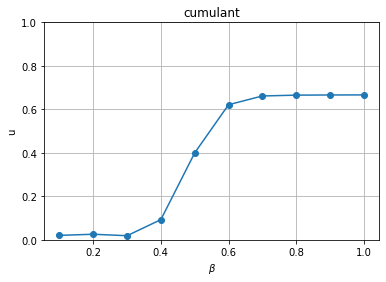

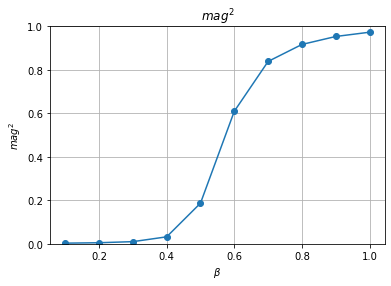

23 R = 10.754144637578046 True


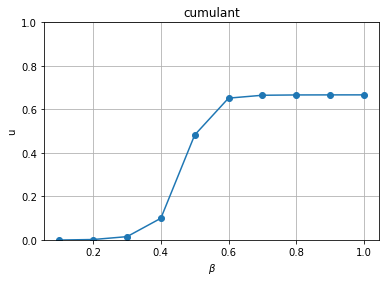

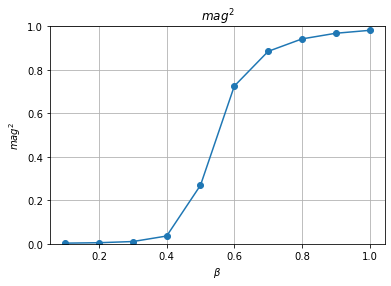

24 R = 10.511149367166293 True


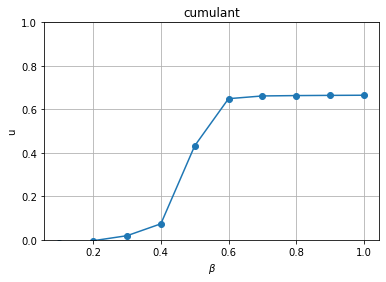

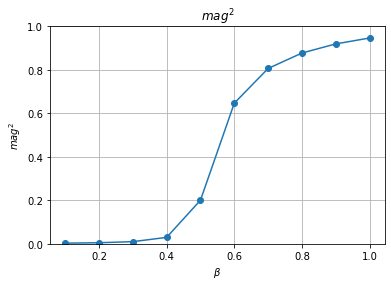

25 R = 25.800367545872863 False


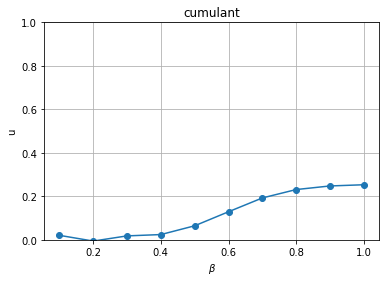

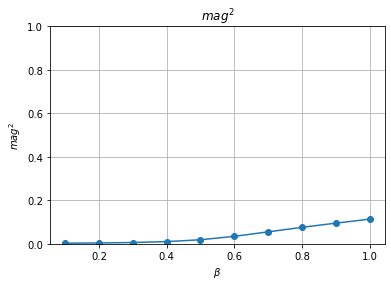

26 R = 15.522194245311663 True


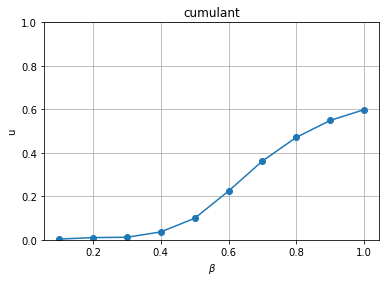

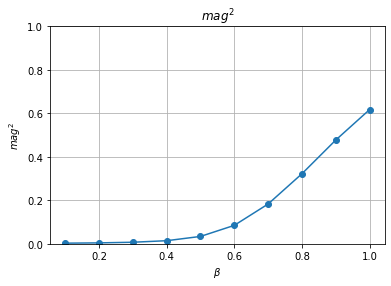

27 R = 16.752699889089225 False


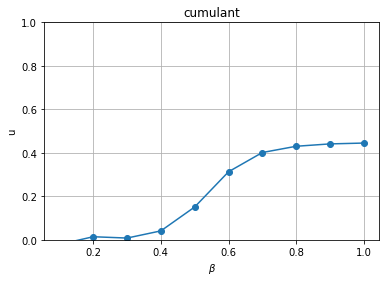

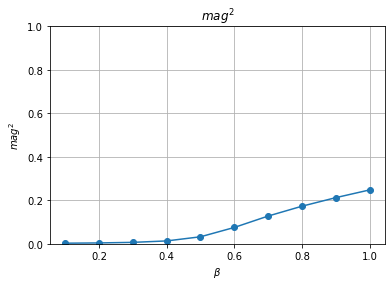

28 R = 18.250811138214107 False


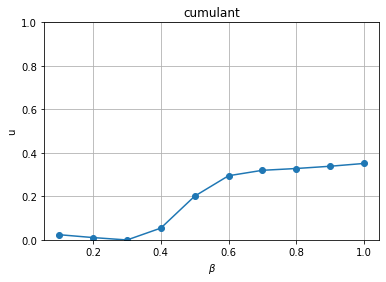

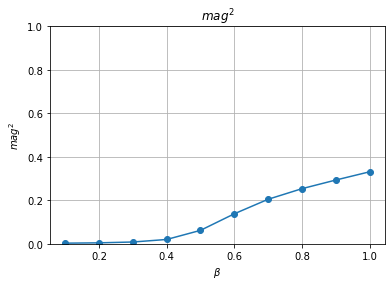

29 R = 9.315769352621416 True


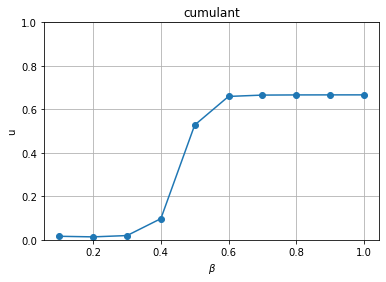

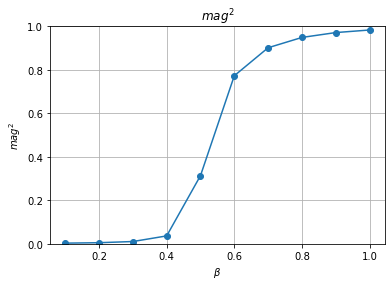

30 R = 17.110479679613736 False


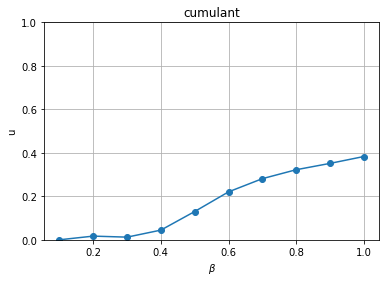

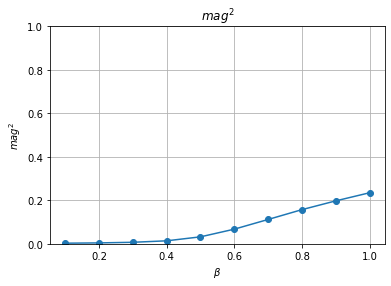

31 R = 9.823503302113002 True


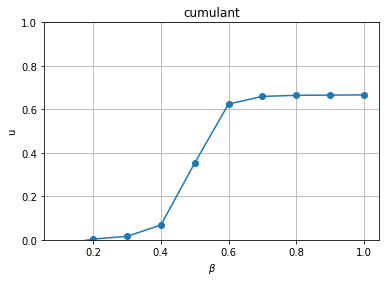

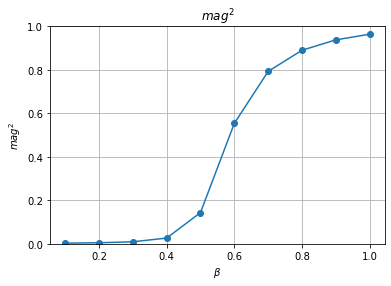

32 R = 18.043557571630863 False


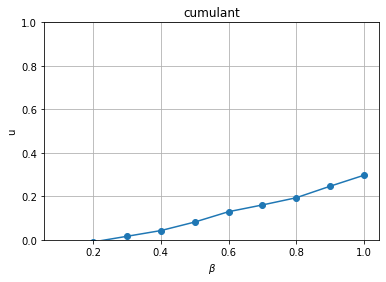

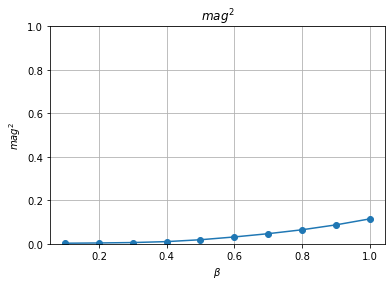

33 R = 10.083460941414593 True


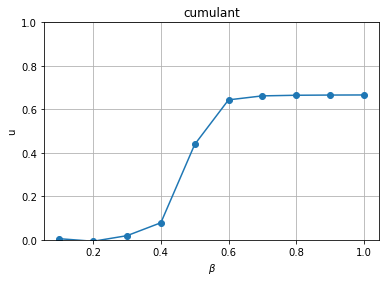

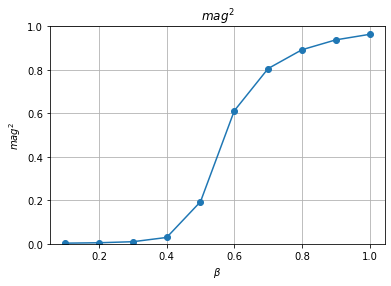

34 R = 17.046952900527884 False


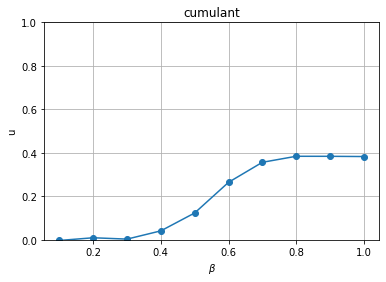

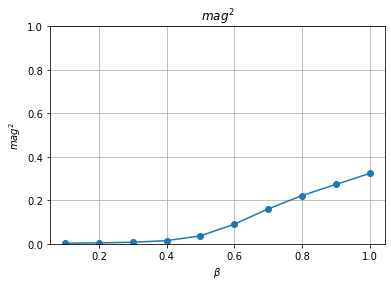

35 R = 10.747325525736697 True


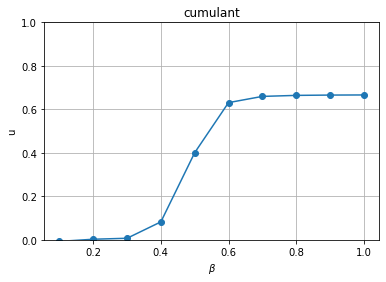

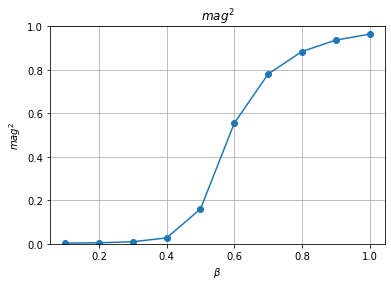

36 R = 28.14783466648841 False


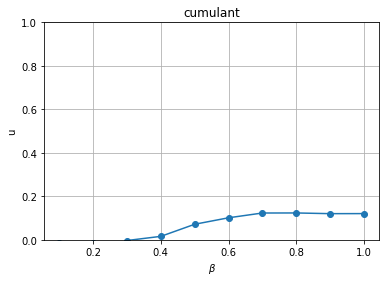

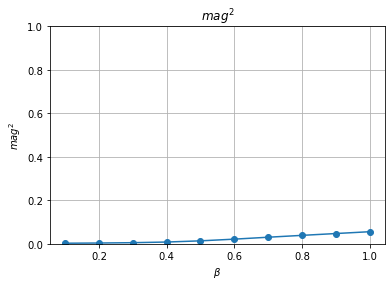

37 R = 10.428112718912619 True


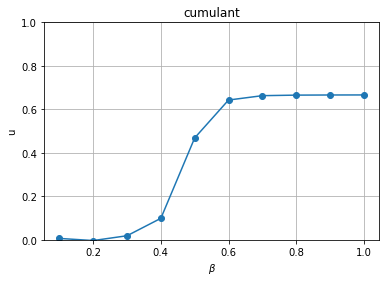

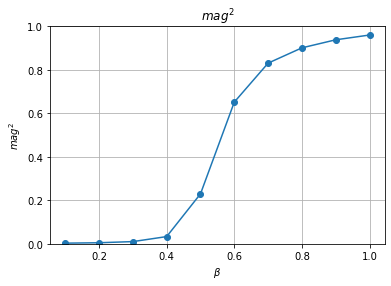

38 R = 11.529567233593028 True


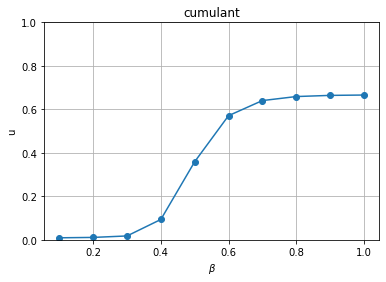

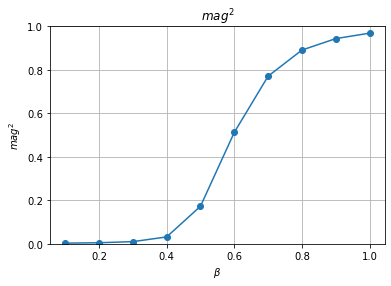

39 R = 28.49492609053633 False


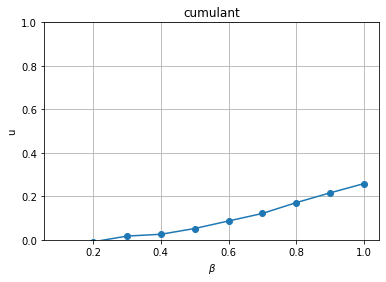

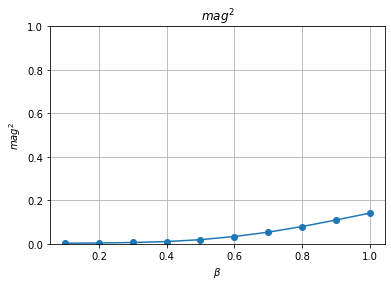

40 R = 9.880649198143743 True


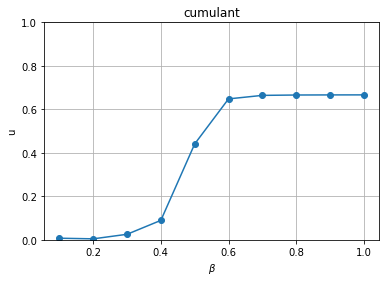

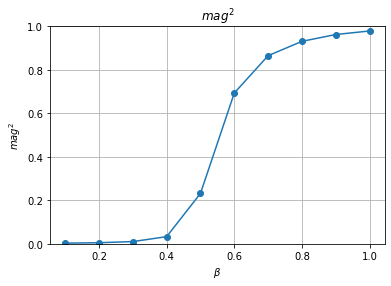

41 R = 9.941171015921823 True


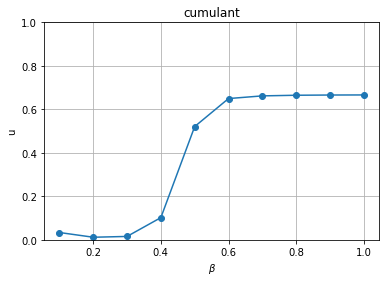

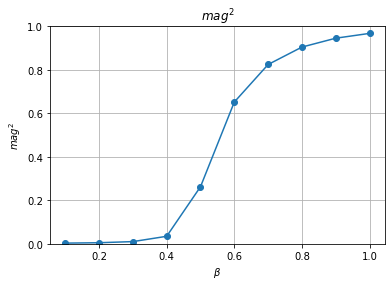

42 R = 18.02222302345304 False


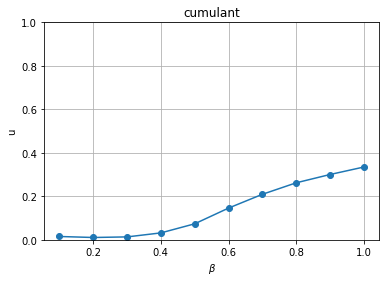

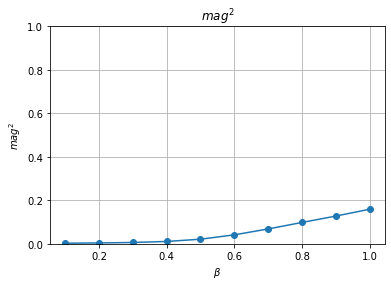

43 R = 10.926916326593004 True


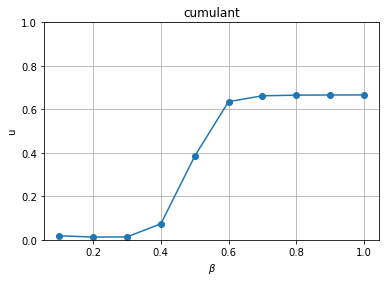

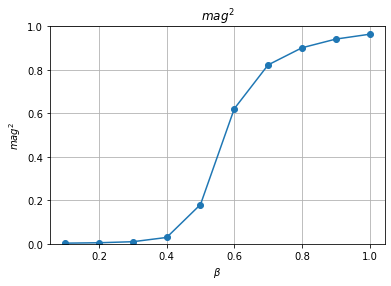

44 R = 9.867006602387402 True


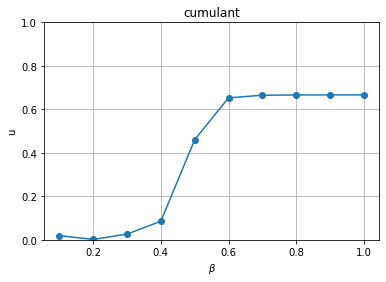

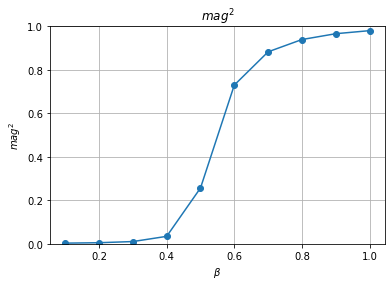

45 R = 26.320492768342472 False


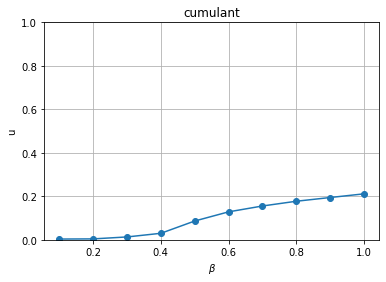

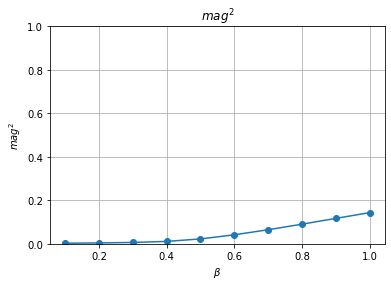

46 R = 10.235360790295957 True


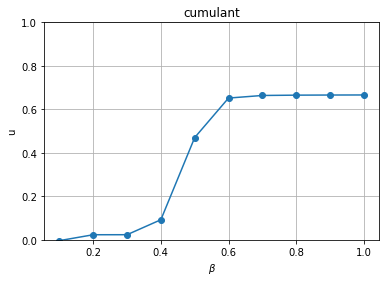

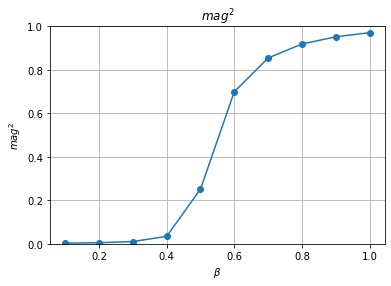

47 R = 10.974418563065624 True


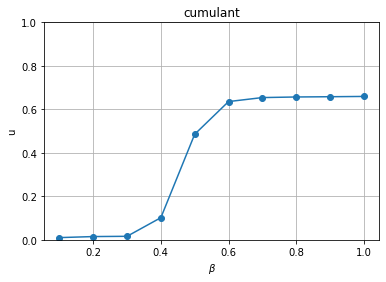

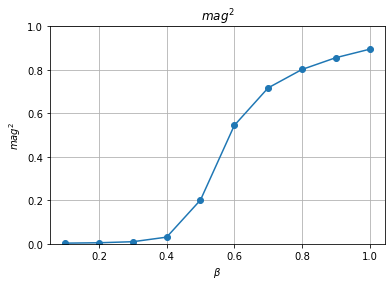

48 R = 17.708500042102397 False


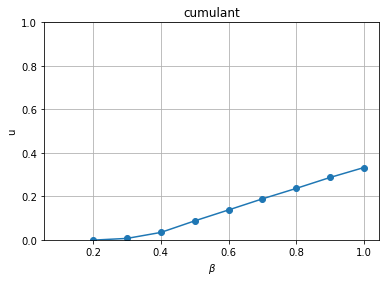

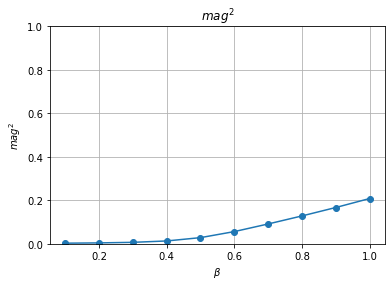

49 R = 10.647338225659425 True


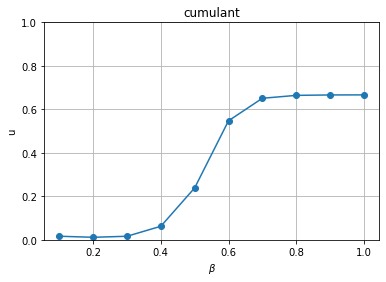

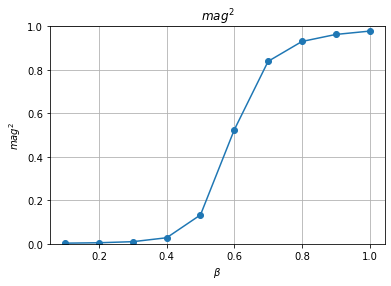

50 R = 10.143460026815916 True


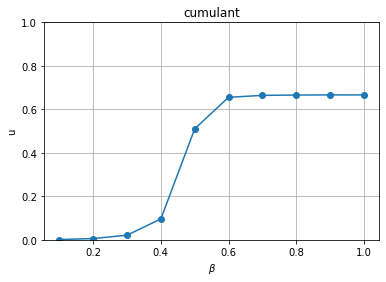

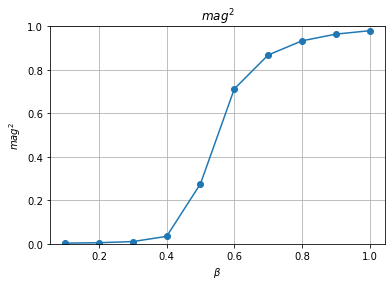

51 R = 27.276975972302235 False


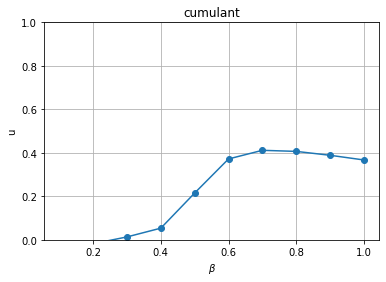

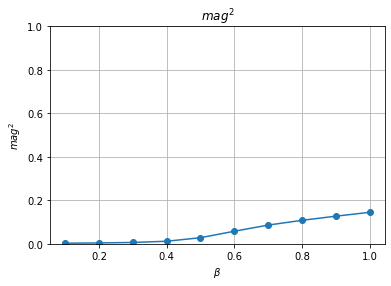

52 R = 10.226873709045863 True


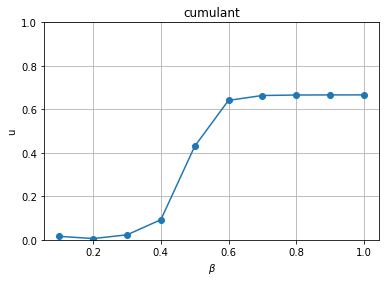

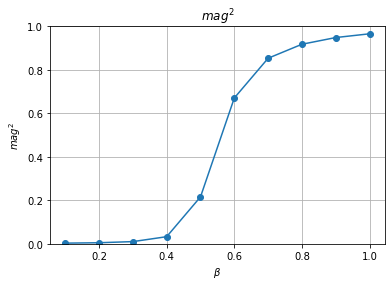

53 R = 18.661912522997742 False


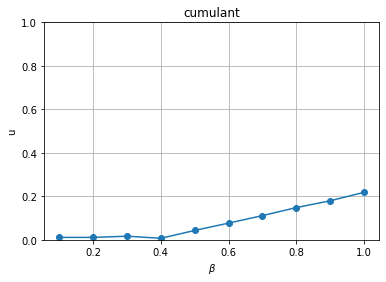

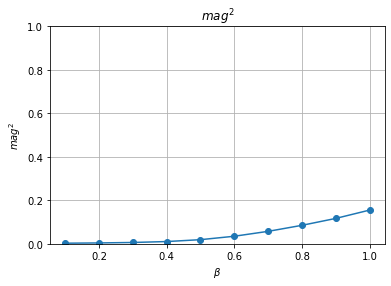

54 R = 10.072003831128058 True


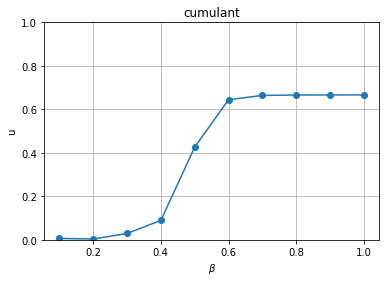

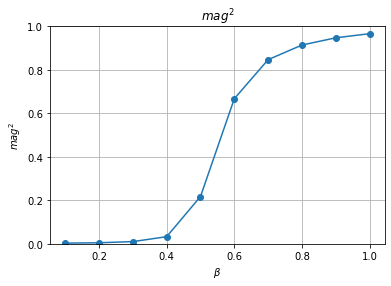

55 R = 12.257136755564723 True


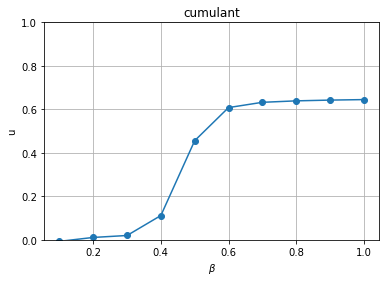

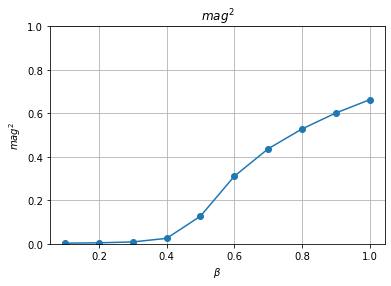

56 R = 9.909135349898904 True


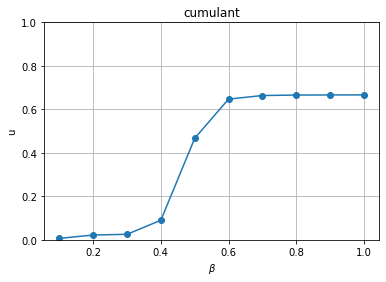

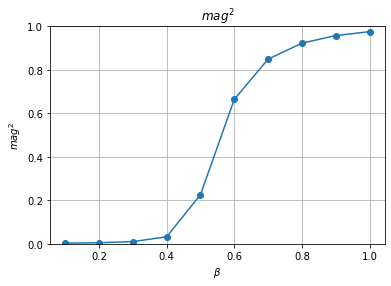

57 R = 10.660584653158137 True


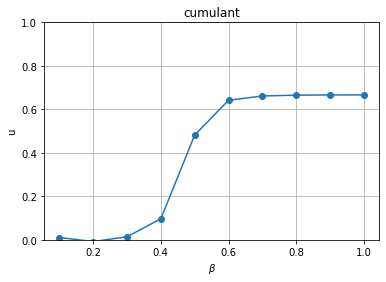

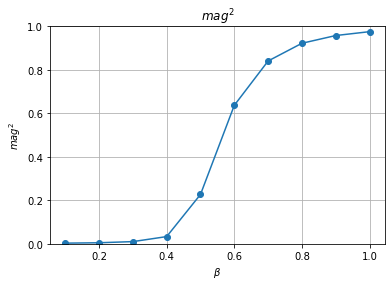

58 R = 11.538134049165171 True


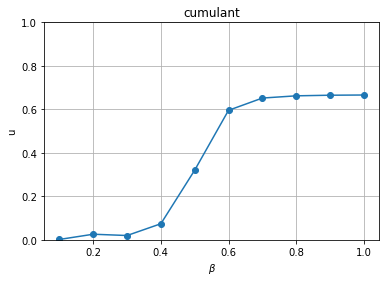

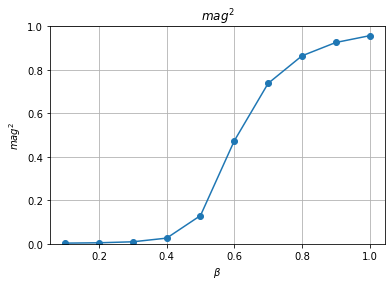

59 R = 15.338391114036813 True


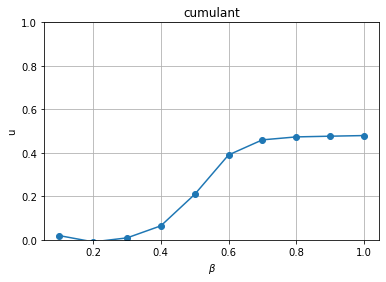

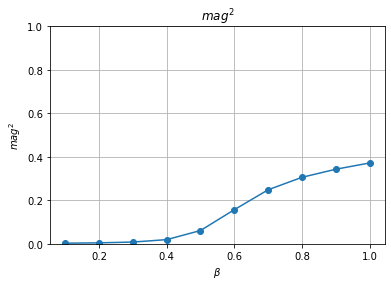

60 R = 11.542217463424096 True


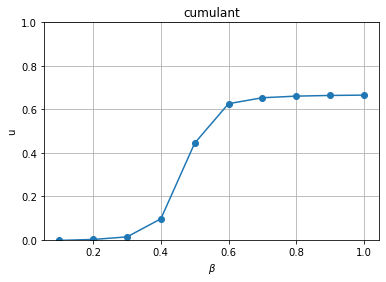

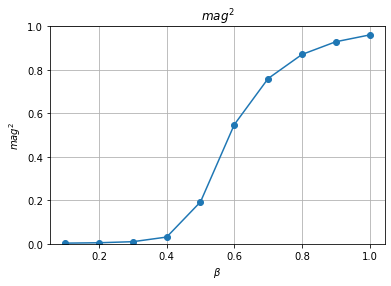

61 R = 14.297808258844752 True


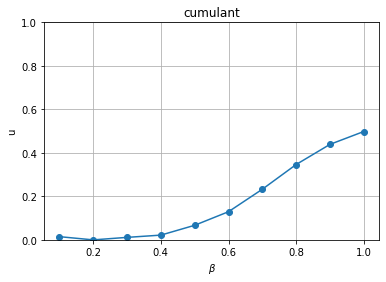

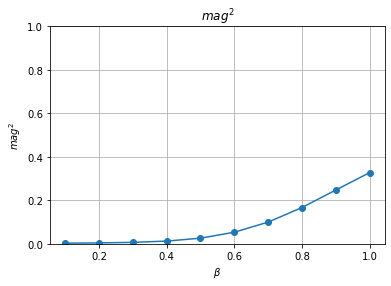

62 R = 10.255163859408759 True


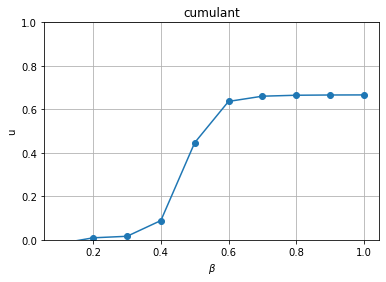

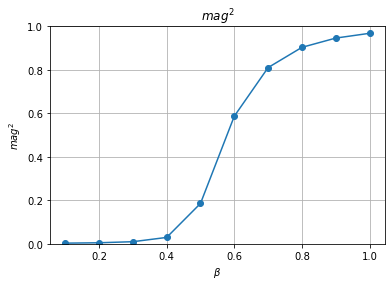

63 R = 29.10667868768456 False


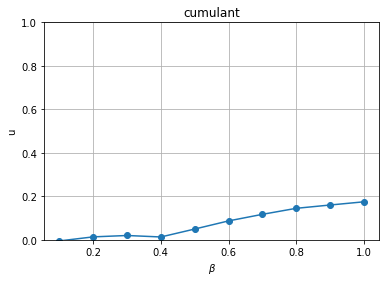

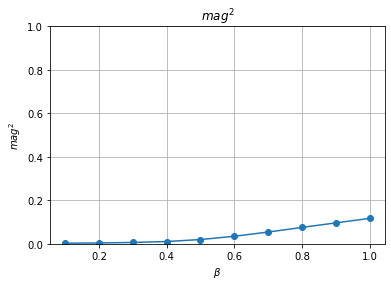

64 R = 9.991161866617835 True


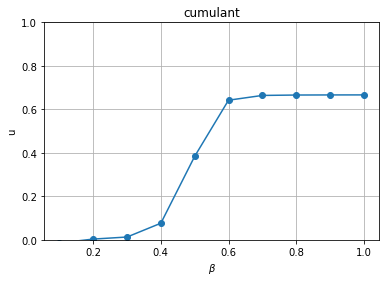

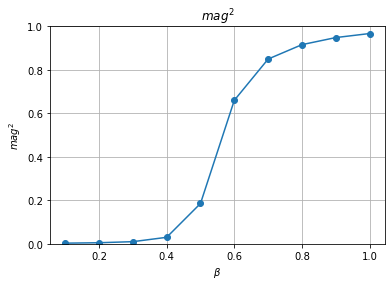

65 R = 9.862356444438259 True


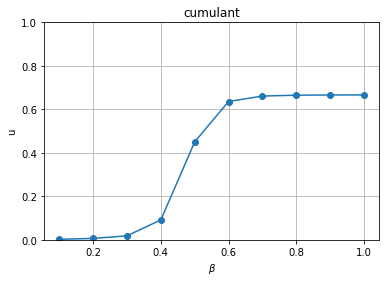

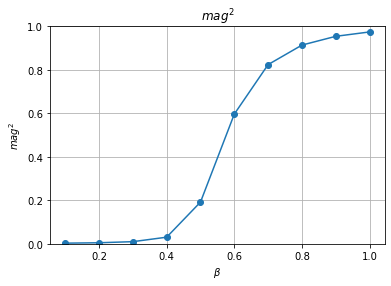

66 R = 10.683162436357273 True


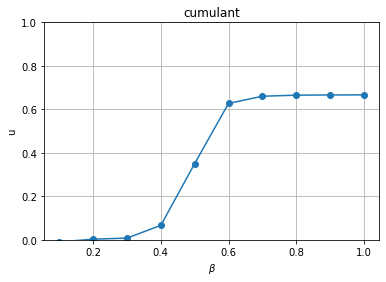

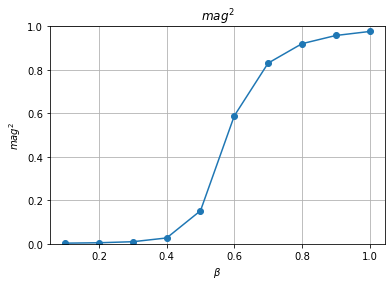

67 R = 10.163178736550273 True


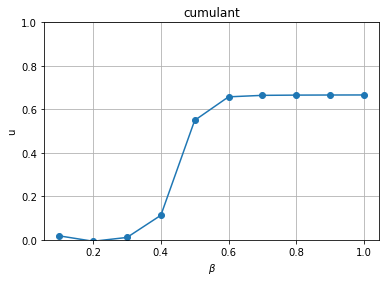

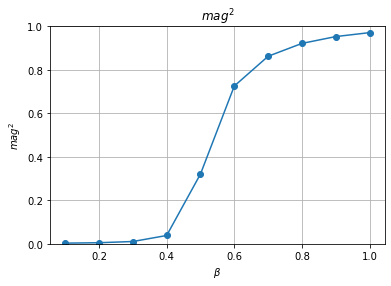

68 R = 21.091774150152673 False


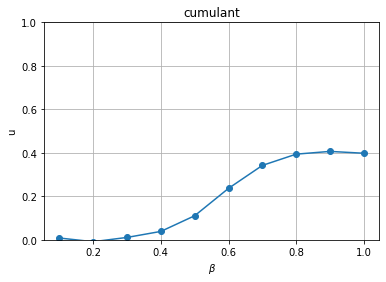

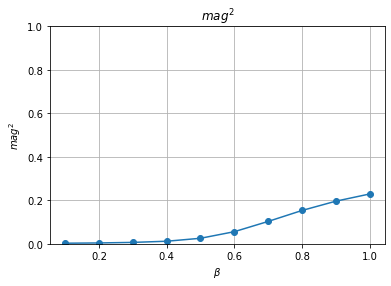

69 R = 13.954713502902585 True


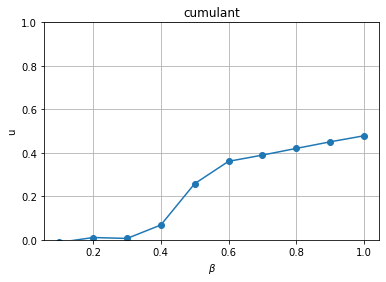

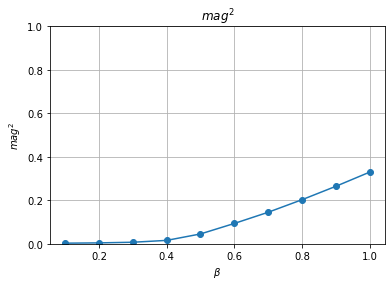

70 R = 14.83513729228289 True


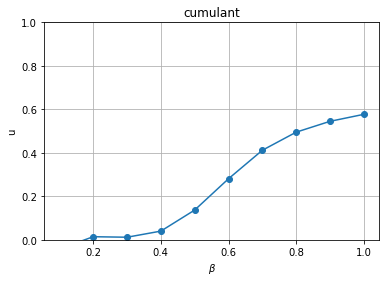

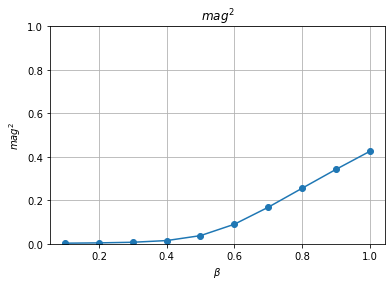

71 R = 10.162866693352564 True


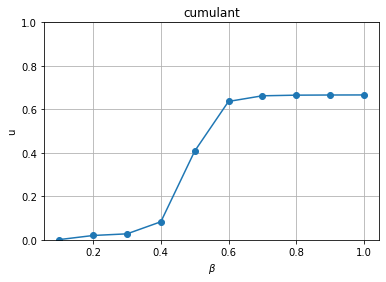

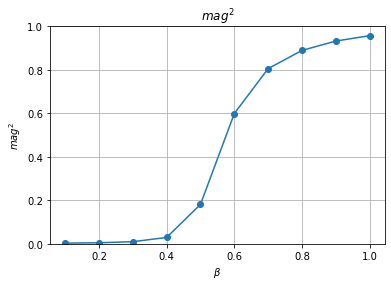

72 R = 9.978885761606008 True


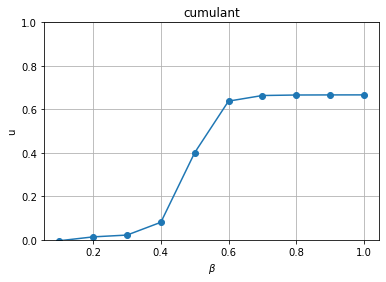

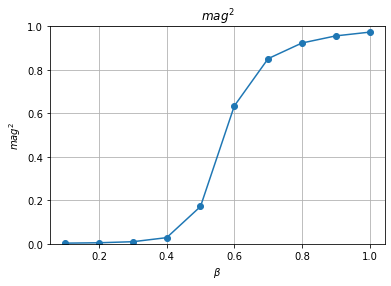

73 R = 9.841308408430045 True


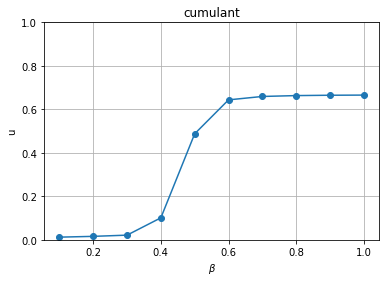

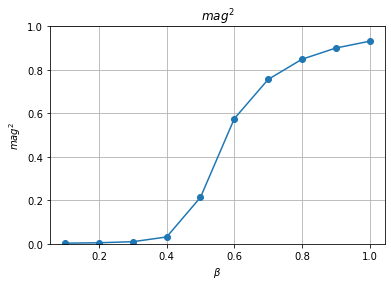

74 R = 9.811581848913802 True


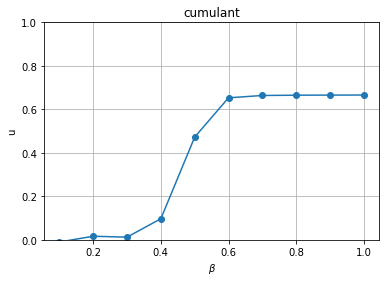

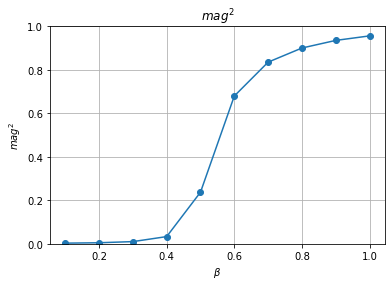

75 R = 11.52116625880644 True


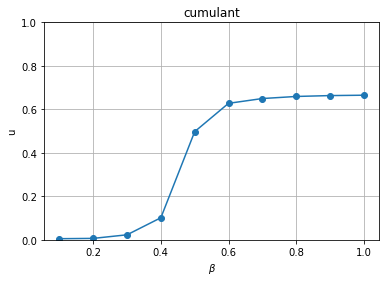

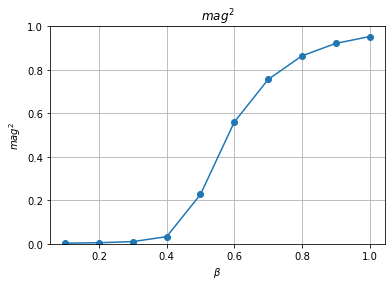

76 R = 9.767927146913381 True


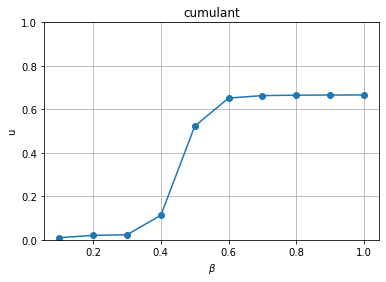

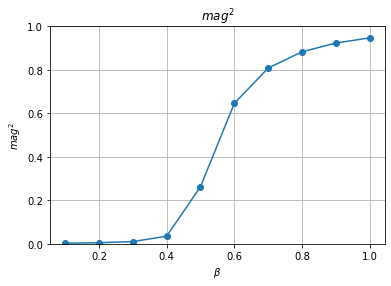

77 R = 10.266814716957391 True


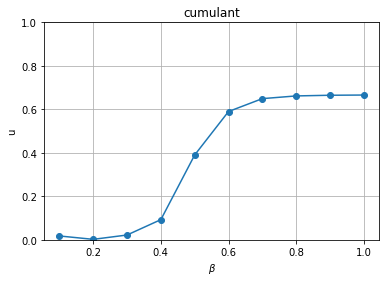

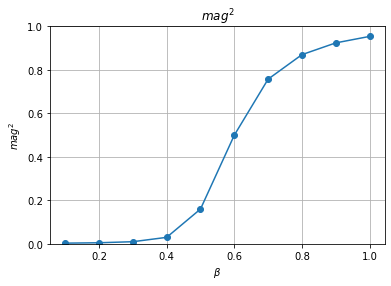

78 R = 17.825565624615976 False


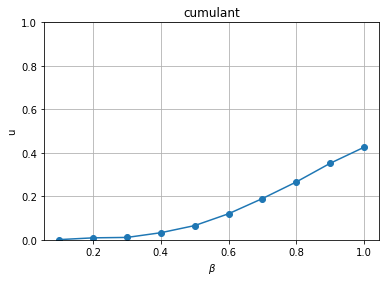

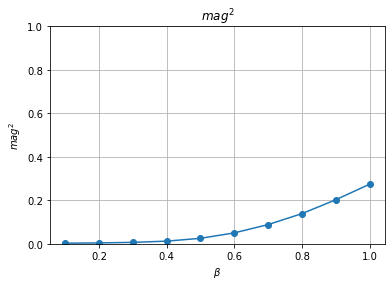

79 R = 13.805678057469954 True


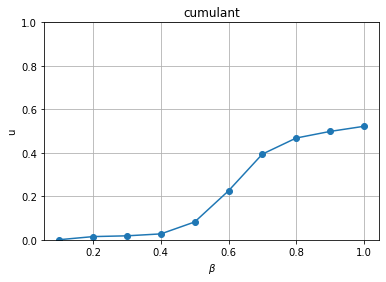

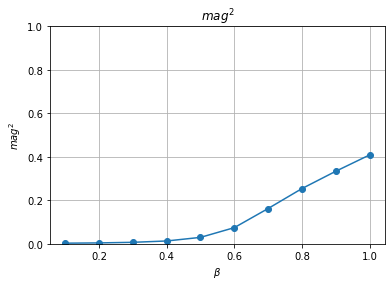

80 R = 21.71764868298758 True


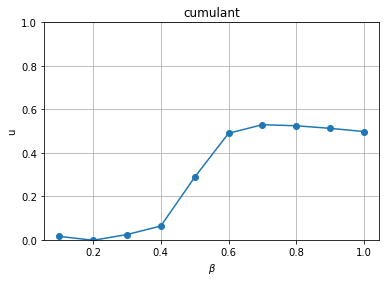

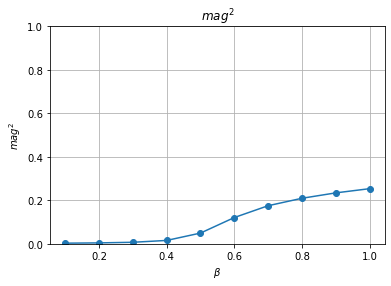

81 R = 20.6613272242506 False


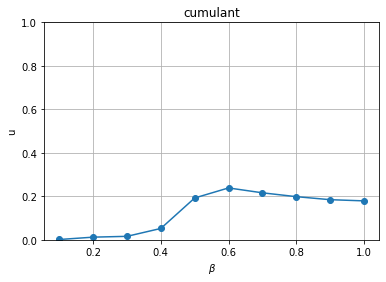

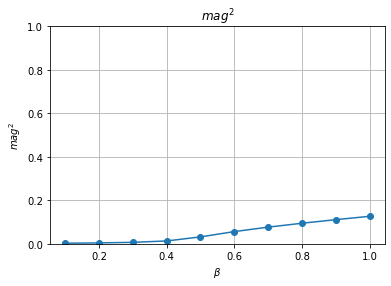

82 R = 10.047870092097911 True


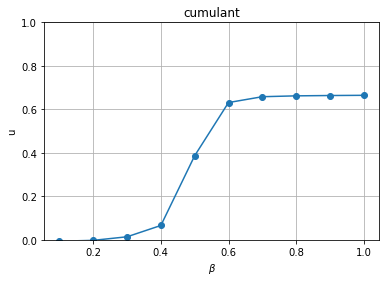

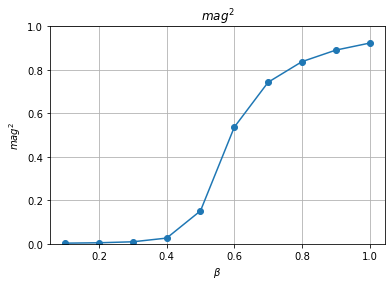

83 R = 15.085164929406854 True


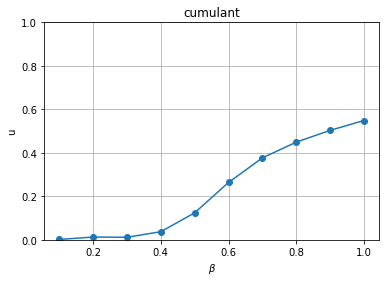

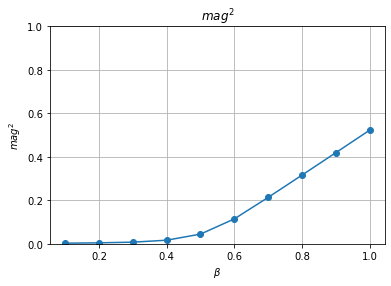

84 R = 10.746001669748962 True


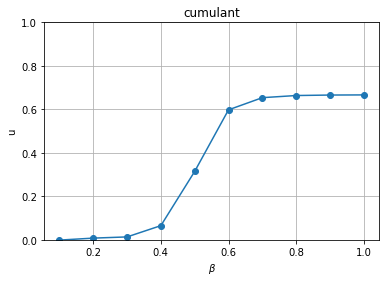

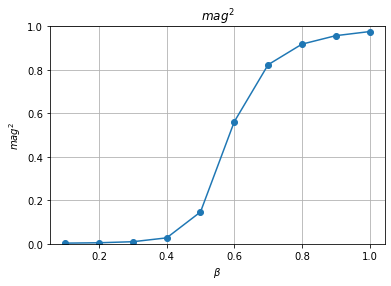

85 R = 9.996231177321139 True


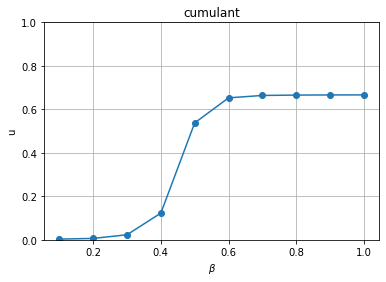

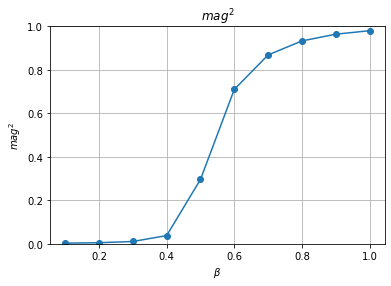

86 R = 9.432188474453419 True


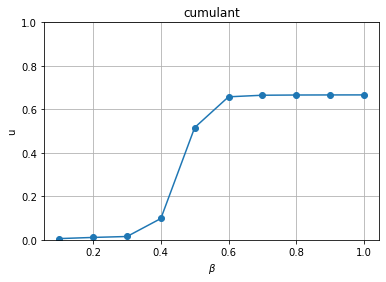

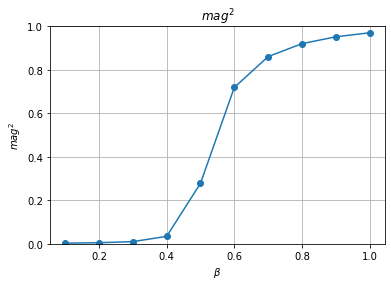

87 R = 16.00022111312907 True


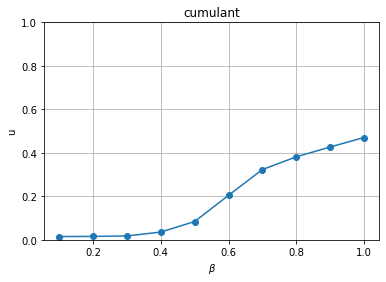

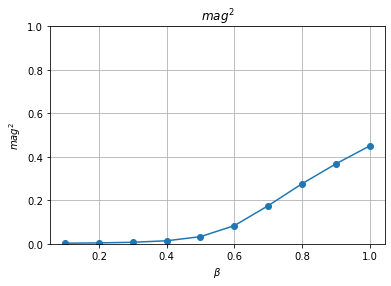

88 R = 9.651766315116706 True


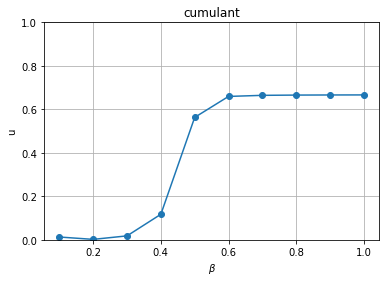

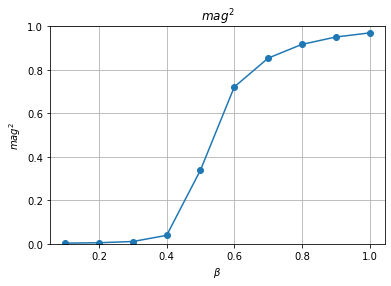

89 R = 11.36391452065949 True


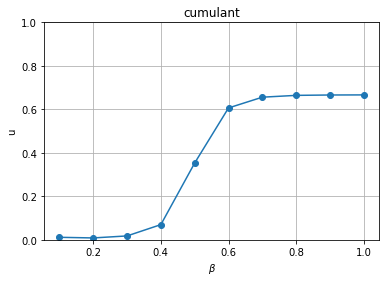

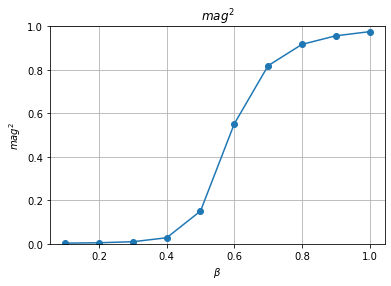

90 R = 9.916963544932997 True


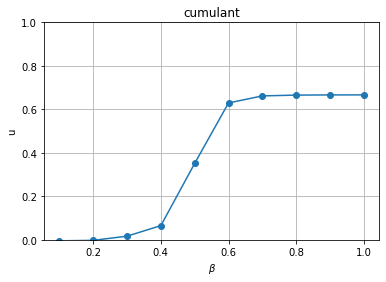

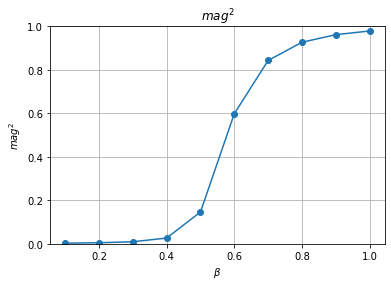

91 R = 13.09908673771792 True


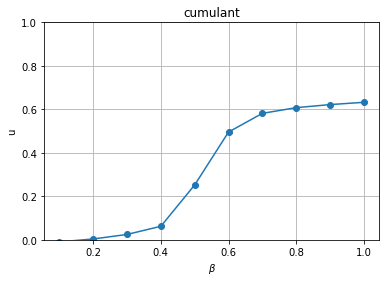

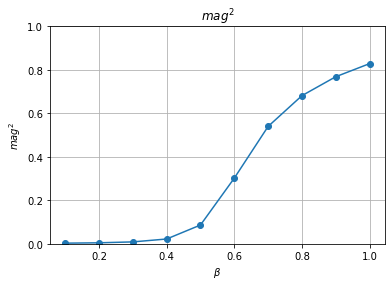

92 R = 10.312919148782136 True


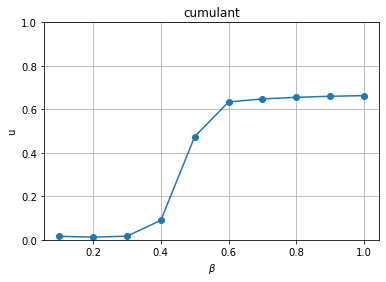

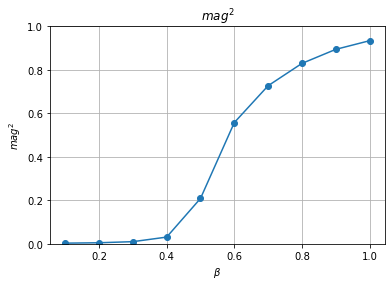

93 R = 10.184857572867013 True


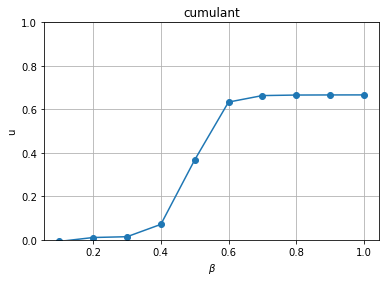

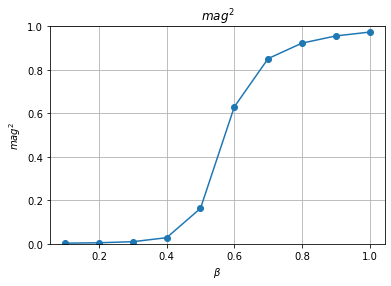

94 R = 10.109758173657733 True


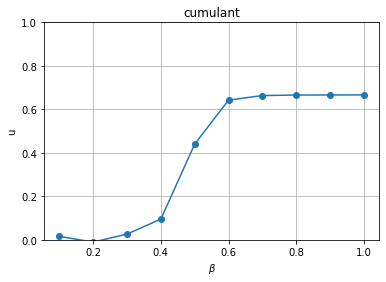

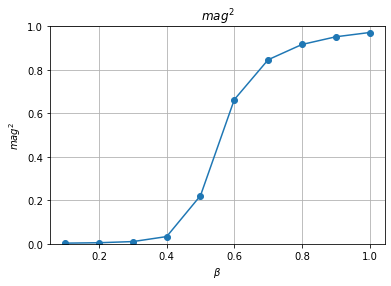

95 R = 21.070369486010705 False


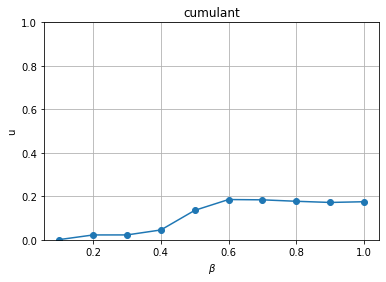

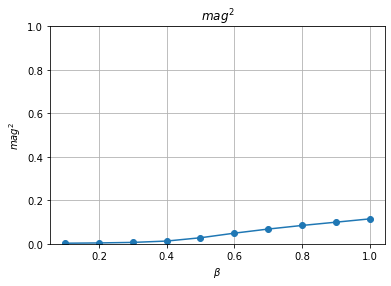

96 R = 16.442845309854896 False


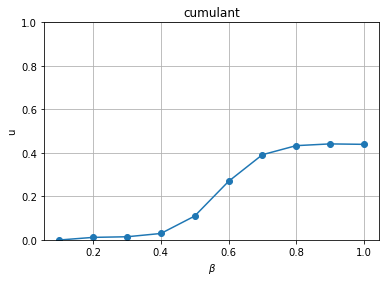

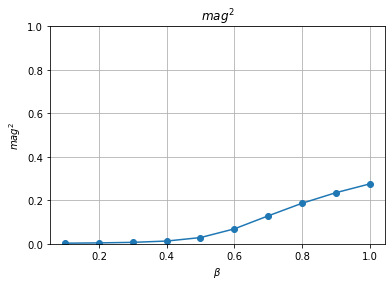

97 R = 9.719466139647428 True


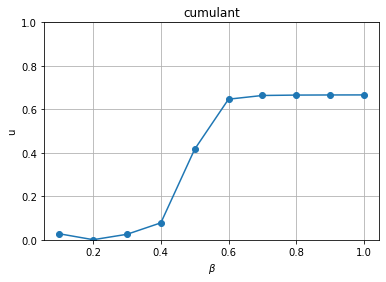

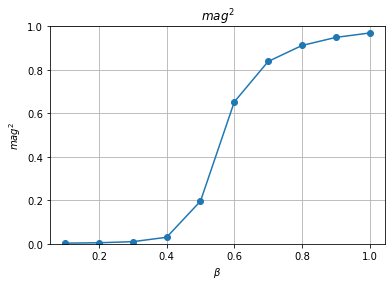

98 R = 9.916386226743342 True


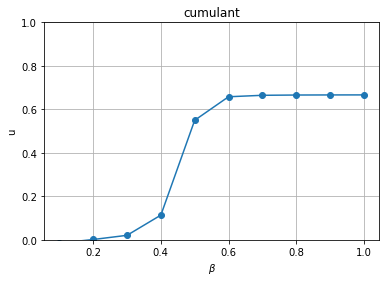

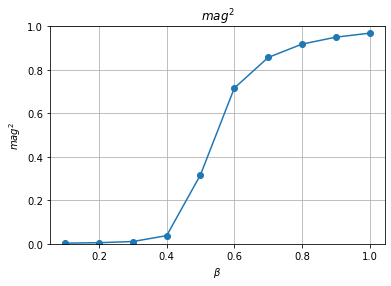

99 R = 19.80274215904307 False


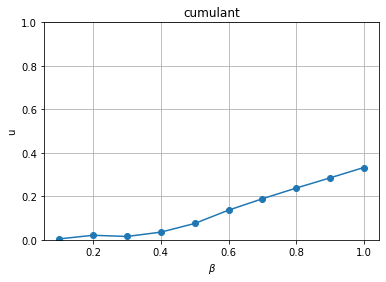

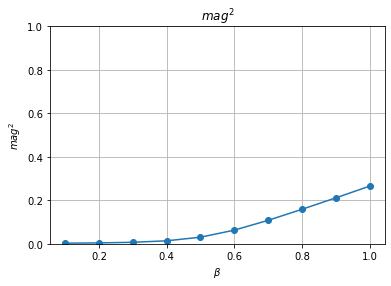

In [14]:
%matplotlib inline
# mean Binder cumulant
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
U_transition = 0.450
betas = np.linspace(0.1, 1, 10)
U_good = [False] * N_conf
R = [0] * N_conf
Mag2 = [0] * N_conf
U = [0] * N_conf
beta_transition = [-1] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        u = [0] * len(betas)
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        mag2 = data['mag2']
        Mag2[j] = mag2[-1].mean
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] = 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
        U_good[j] = max(u) >= U_transition
        U[j] = max(u)
        for k in range(len(betas)):
            if u[k] >= U_transition:
                beta_transition[j] = betas[k]
                break
        R[j] = radius_of_gyration(struct)
        print(j, 'R =',R[j], U_good[j])
        plt.figure()
        plt.title('cumulant')
        plt.xlabel(r'$\beta$')
        plt.ylabel('u')
        plt.ylim([0, 1])
        plt.errorbar(betas, u, fmt='o-')
        plt.grid(True)
        plt.show()
        
        plt.figure()
        plt.title(r'$mag^2$')
        plt.xlabel(r'$\beta$')
        plt.ylabel(r'$mag^2$')
        plt.ylim([0, 1])
        plt.errorbar(betas, [m.mean for m in mag2], fmt='o-')
        plt.grid(True)
        plt.show()
    


<IPython.core.display.Javascript object>


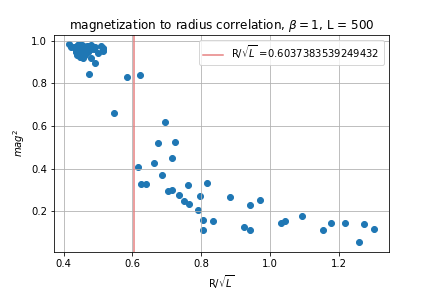

In [23]:
%matplotlib notebook
plt.figure()
plt.title(r'magnetization to radius correlation, $\beta=1$, L = 500')
plt.xlabel(r'R/$\sqrt{L}$')
plt.ylabel(r'$mag^2$')
plt.scatter([r/np.sqrt(500) for r in R], Mag2)
plt.axvline(x=13.5/np.sqrt(500), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(13.5/np.sqrt(500)))
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [24]:
%matplotlib notebook
plt.figure()
plt.title(r'cumulant to radius correlation, L = 500')
plt.xlabel(r'R/$\sqrt{L}$')
plt.ylabel(r'U')
plt.scatter([r/np.sqrt(500) for r in R], U)
plt.axvline(x=13.5/np.sqrt(500), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(13.5/np.sqrt(500)))
plt.legend(loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

field 55

<IPython.core.display.Javascript object>


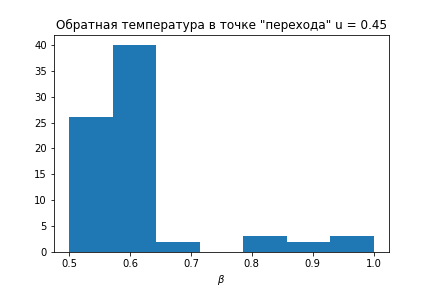

In [16]:
%matplotlib notebook
beta_hist = []
k = 0
for b in beta_transition:
    if b > 0:
        beta_hist.append(b)
        

plt.figure()
plt.title('Обратная температура в точке \"перехода\" u = ' + str(U_transition))
plt.xlabel(r'$\beta$')
plt.hist(beta_hist, bins=7)
plt.show()

In [17]:
len(beta_histist)

76

<IPython.core.display.Javascript object>


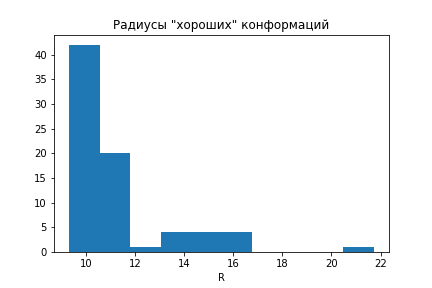

In [18]:
%matplotlib notebook
R_hist = []
for i in range(len(R)):
    if U_good[i]:
        R_hist.append(R[i])

plt.figure()
plt.title('Радиусы плотных конформаций')
plt.xlabel('R')
plt.hist(R_hist, bins=10)
plt.show()

<IPython.core.display.Javascript object>


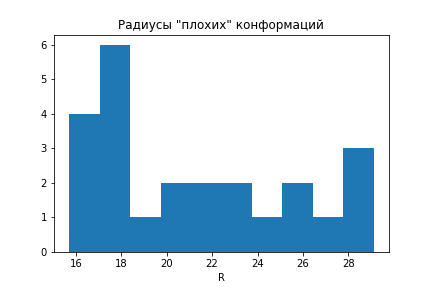

In [25]:
%matplotlib notebook
R_hist = []
for i in range(len(R)):
    if not U_good[i]:
        R_hist.append(R[i])

plt.figure()
plt.title('Радиусы развёрнутых конформаций')
plt.xlabel('R')
plt.hist(R_hist, bins=10)
plt.show()

In [37]:
for i in range(0, N_conf):
    if not U_good[i]:
        print(i, R[i])

0 23.061769830354653
10 24.45475617260894
20 15.71082114582466
21 23.364369654401813
25 25.800367545872863
28 18.250811138214107
30 17.110479679613736
32 18.043557571630863
34 17.046952900527884
36 28.14783466648841
39 28.49492609053633
42 18.02222302345304
45 26.320492768342472
48 17.708500042102397


501 0 R = 23.061769830354653


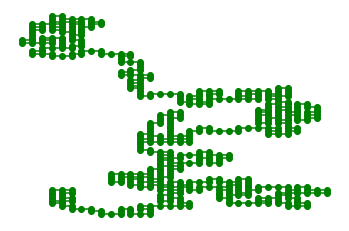

501 1 R = 11.159358438184048


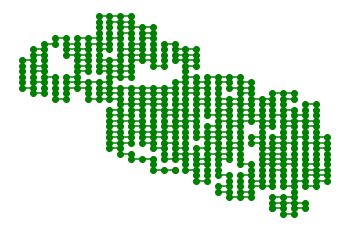

501 2 R = 10.33688193234087


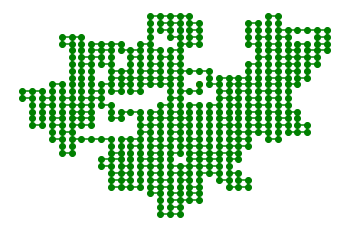

501 3 R = 10.499633413767299


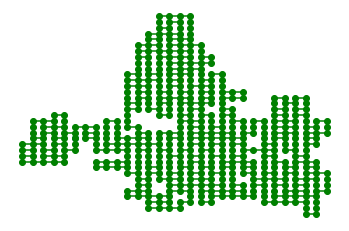

501 4 R = 11.019947245512355


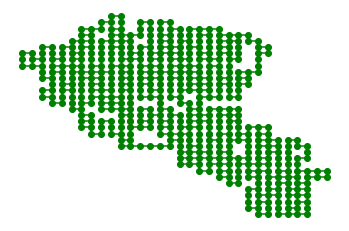

501 5 R = 10.316399270674651


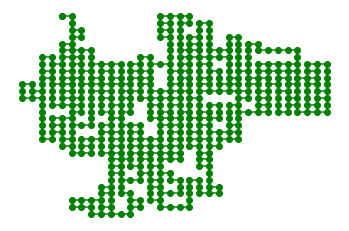

501 6 R = 9.927248799341589


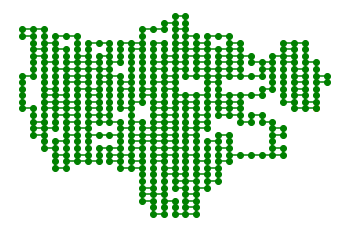

501 7 R = 16.01942836592415


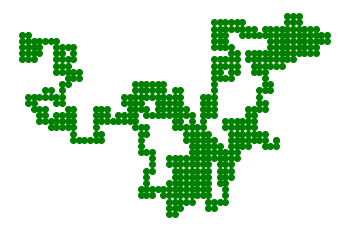

501 8 R = 13.931256942584858


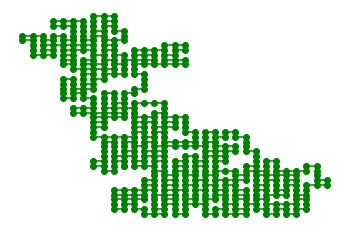

501 9 R = 10.744485578320983


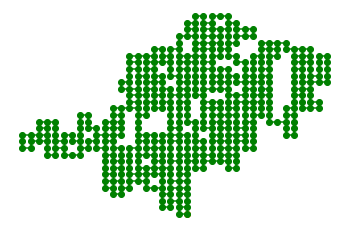

501 10 R = 24.45475617260894


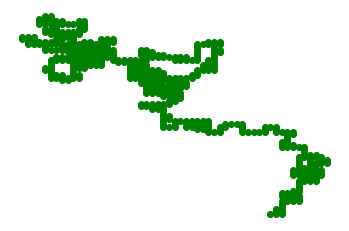

501 11 R = 10.58449139269336


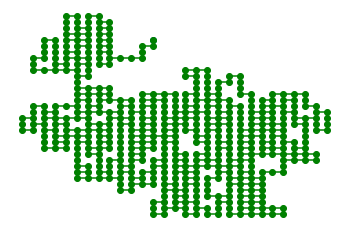

501 12 R = 9.97803971971951


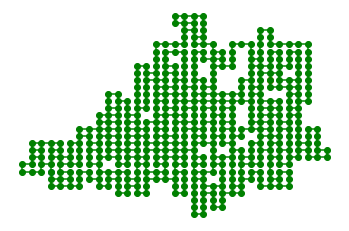

501 13 R = 16.17730079265426


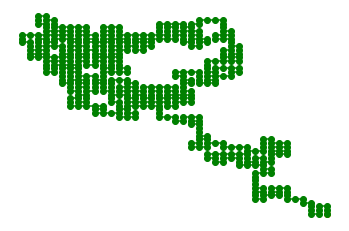

501 14 R = 10.189696023932175


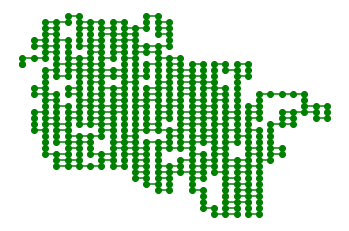

501 15 R = 9.77047070312207


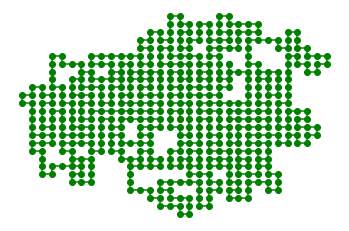

501 16 R = 9.948379721473902


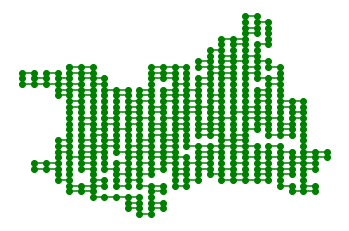

501 17 R = 10.667977213405816


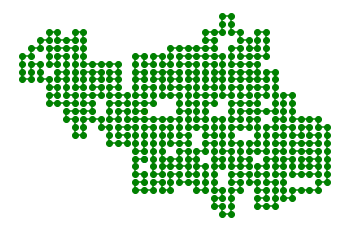

501 18 R = 10.304711685437304


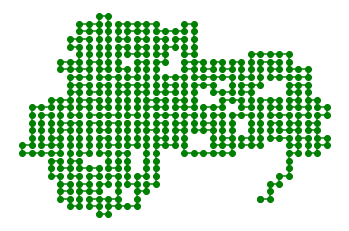

501 19 R = 10.590392519612635


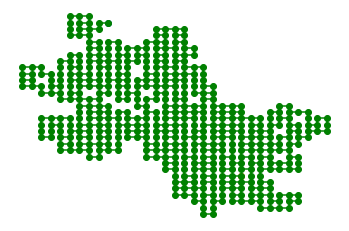

501 20 R = 15.71082114582466


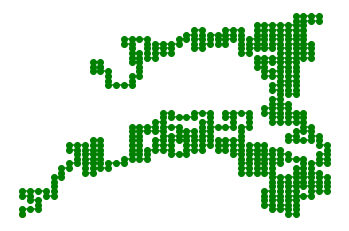

501 21 R = 23.364369654401813


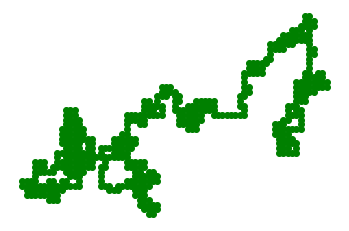

501 22 R = 10.695884377728783


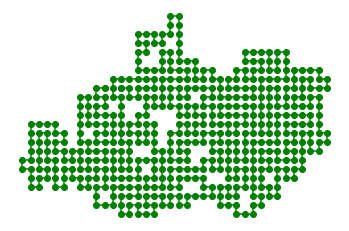

501 23 R = 10.754144637578046


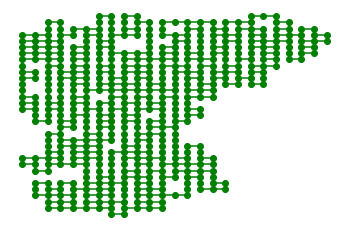

501 24 R = 10.511149367166293


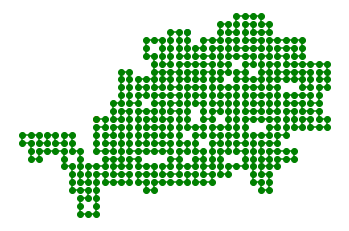

501 25 R = 25.800367545872863


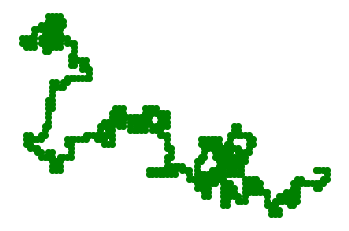

501 26 R = 15.522194245311663


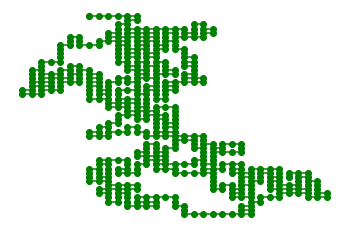

501 27 R = 16.752699889089225


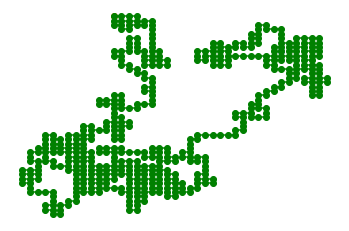

501 28 R = 18.250811138214107


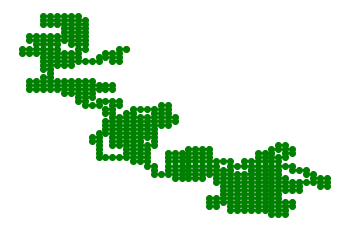

501 29 R = 9.315769352621416


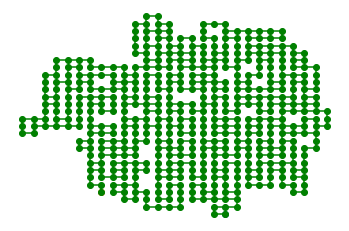

501 30 R = 17.110479679613736


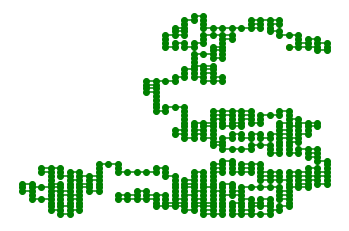

501 31 R = 9.823503302113002


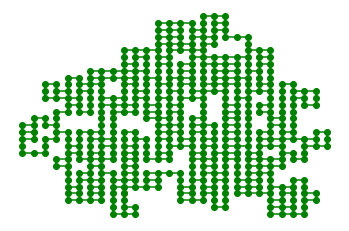

501 32 R = 18.043557571630863


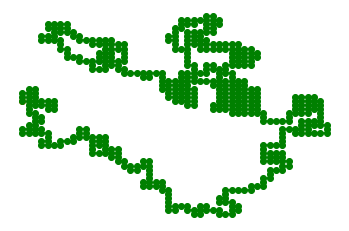

501 33 R = 10.083460941414593


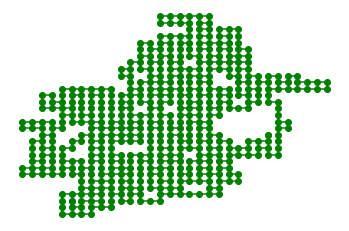

501 34 R = 17.046952900527884


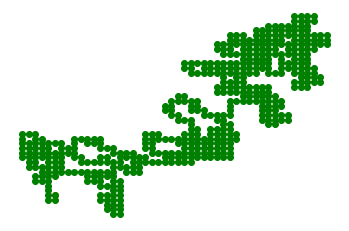

501 35 R = 10.747325525736697


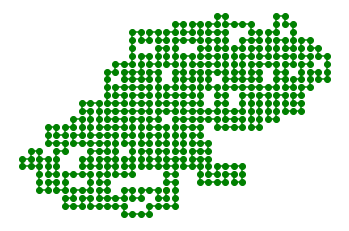

501 36 R = 28.14783466648841


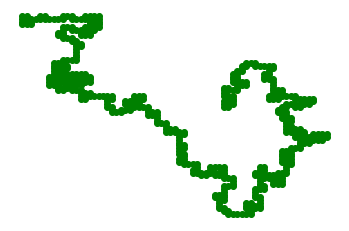

501 37 R = 10.428112718912619


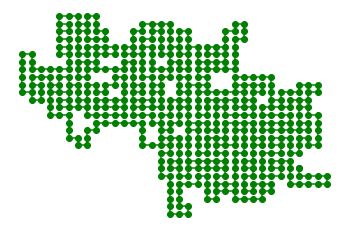

501 38 R = 11.529567233593028


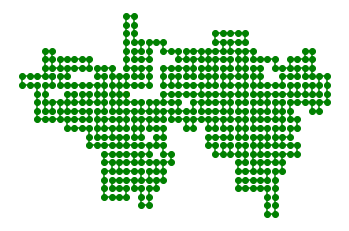

501 39 R = 28.49492609053633


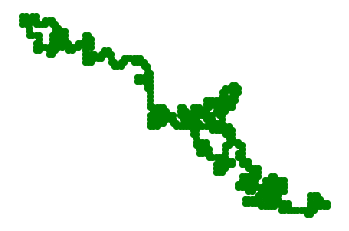

501 40 R = 9.880649198143743


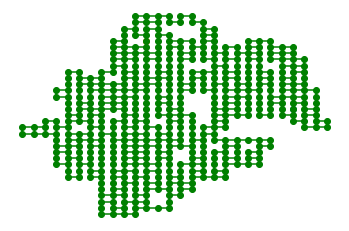

501 41 R = 9.941171015921823


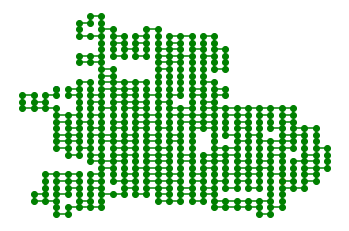

501 42 R = 18.02222302345304


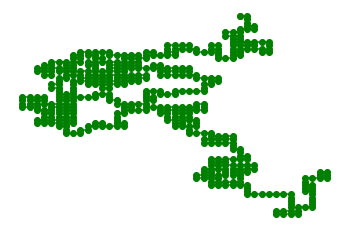

501 43 R = 10.926916326593004


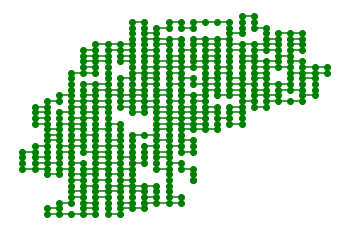

501 44 R = 9.867006602387402


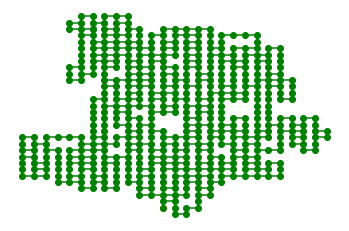

501 45 R = 26.320492768342472


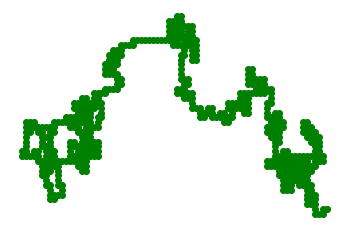

501 46 R = 10.235360790295957


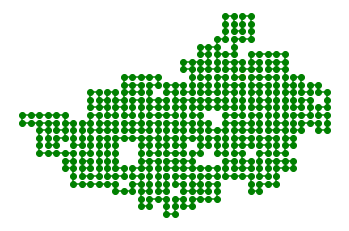

501 47 R = 10.974418563065624


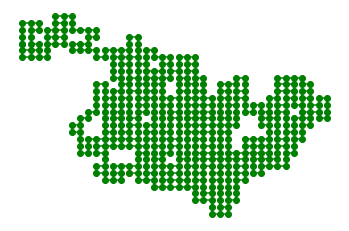

501 48 R = 17.708500042102397


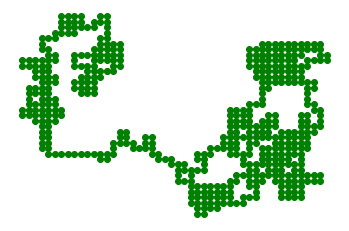

501 49 R = 10.647338225659425


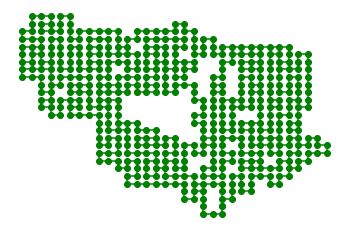

501 50 R = 10.143460026815916


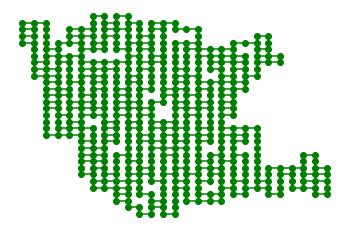

501 51 R = 27.276975972302235


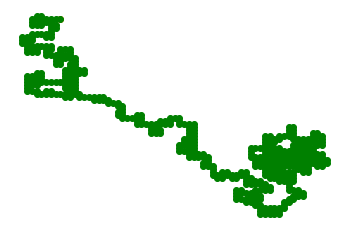

501 52 R = 10.226873709045863


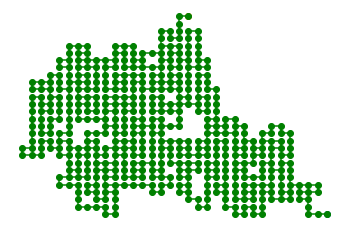

501 53 R = 18.661912522997742


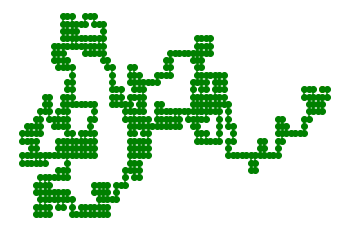

501 54 R = 10.072003831128058


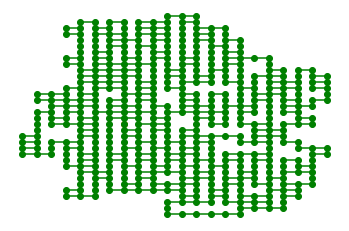

501 55 R = 12.257136755564723


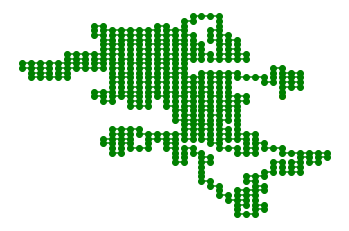

501 56 R = 9.909135349898904


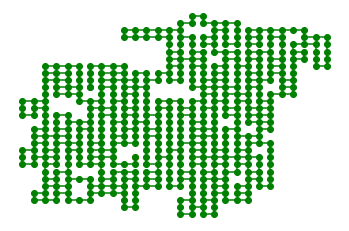

501 57 R = 10.660584653158137


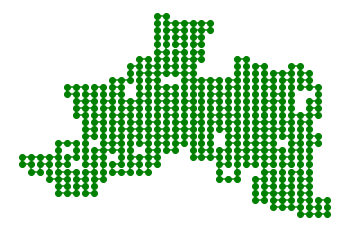

501 58 R = 11.538134049165171


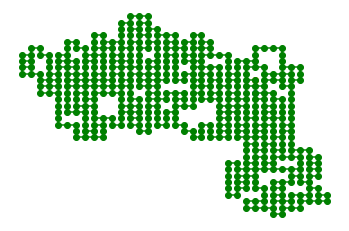

501 59 R = 15.338391114036813


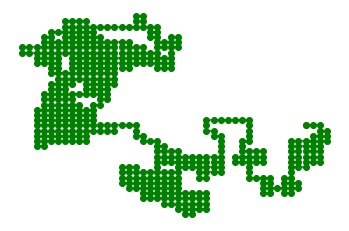

501 60 R = 11.542217463424096


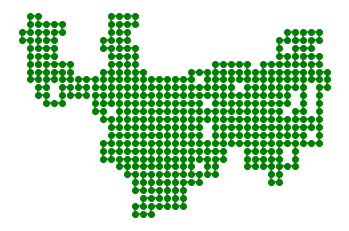

501 61 R = 14.297808258844752


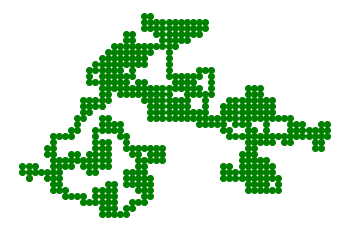

501 62 R = 10.255163859408759


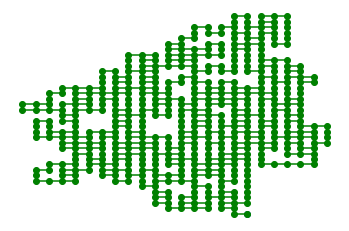

501 63 R = 29.10667868768456


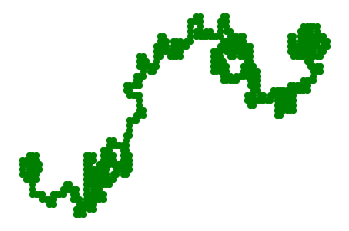

501 64 R = 9.991161866617835


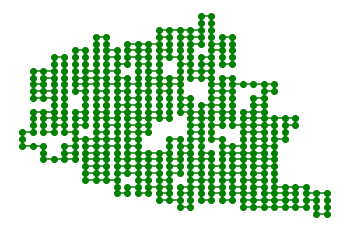

501 65 R = 9.862356444438259


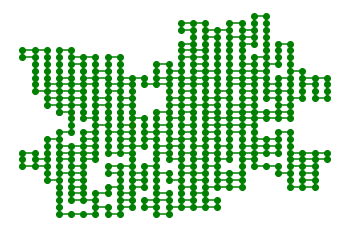

501 66 R = 10.683162436357273


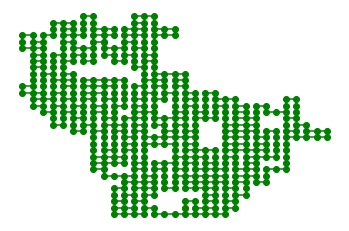

501 67 R = 10.163178736550273


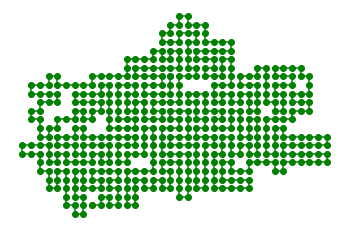

501 68 R = 21.091774150152673


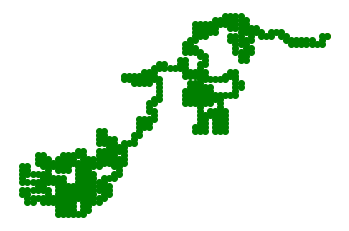

501 69 R = 13.954713502902585


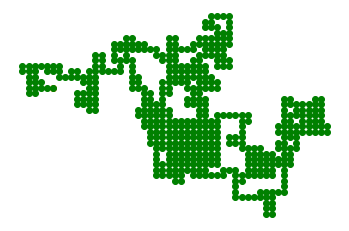

501 70 R = 14.83513729228289


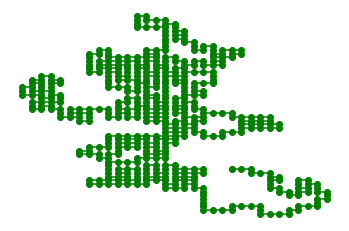

501 71 R = 10.162866693352564


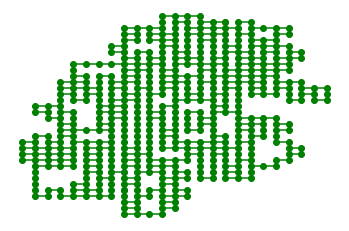

501 72 R = 9.978885761606008


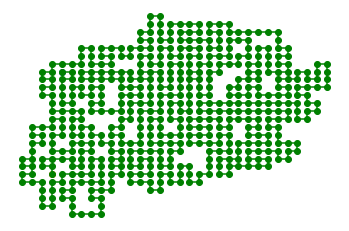

501 73 R = 9.841308408430045


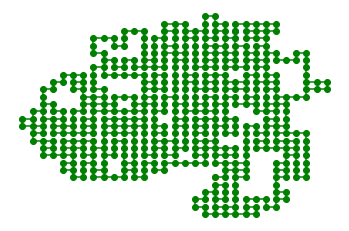

501 74 R = 9.811581848913802


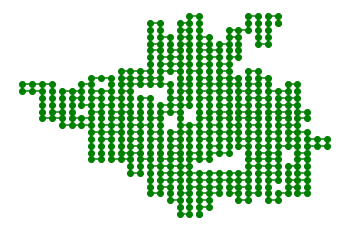

501 75 R = 11.52116625880644


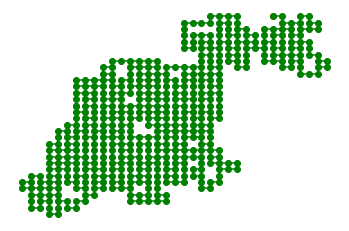

501 76 R = 9.767927146913381


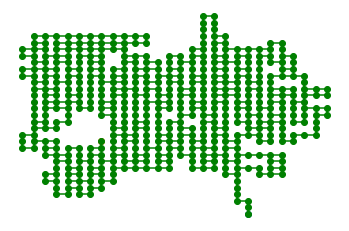

501 77 R = 10.266814716957391


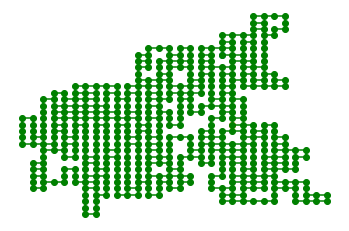

501 78 R = 17.825565624615976


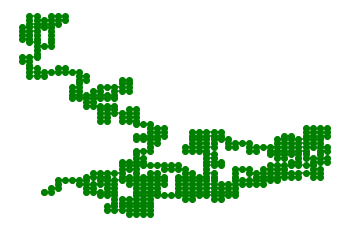

501 79 R = 13.805678057469954


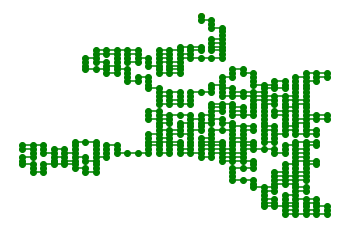

501 80 R = 21.71764868298758


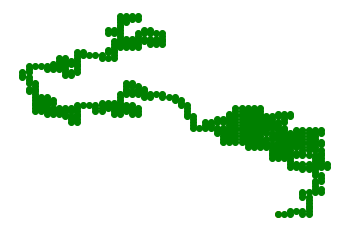

501 81 R = 20.6613272242506


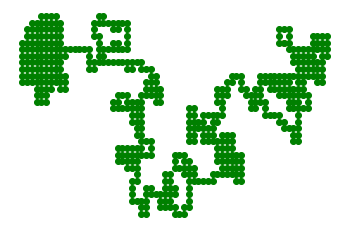

501 82 R = 10.047870092097911


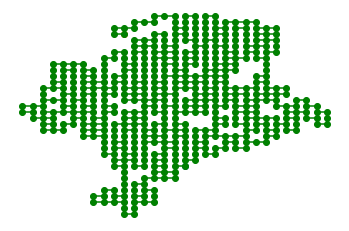

501 83 R = 15.085164929406854


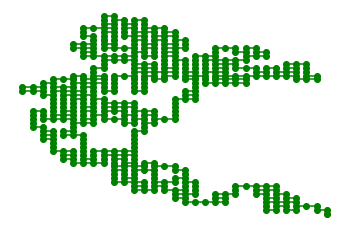

501 84 R = 10.746001669748962


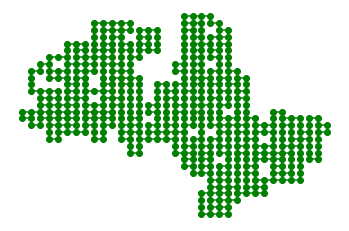

501 85 R = 9.996231177321139


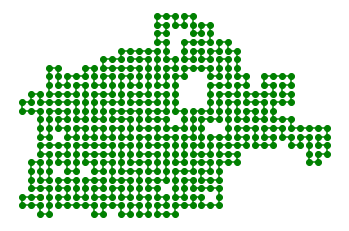

501 86 R = 9.432188474453419


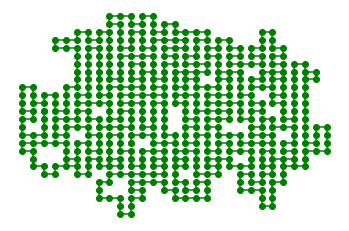

501 87 R = 16.00022111312907


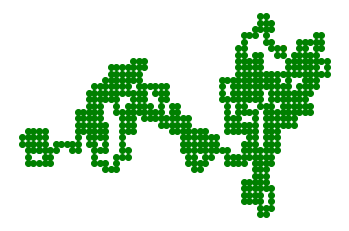

501 88 R = 9.651766315116706


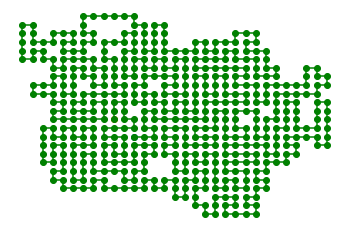

501 89 R = 11.36391452065949


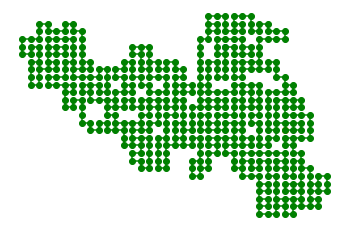

501 90 R = 9.916963544932997


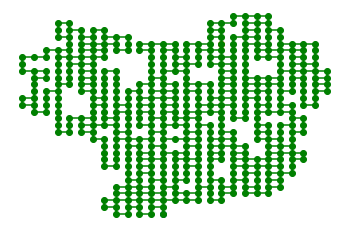

501 91 R = 13.09908673771792


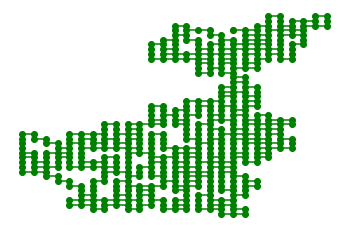

501 92 R = 10.312919148782136


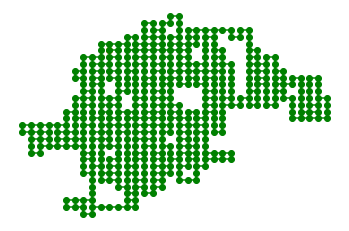

501 93 R = 10.184857572867013


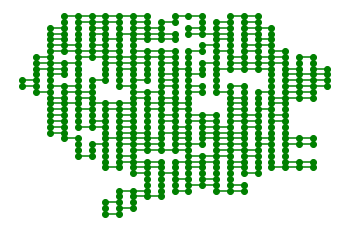

501 94 R = 10.109758173657733


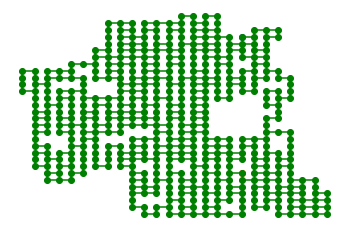

501 95 R = 21.070369486010705


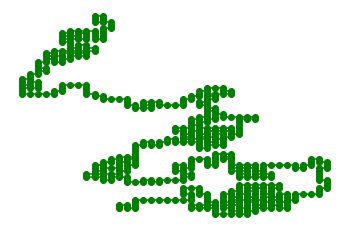

501 96 R = 16.442845309854896


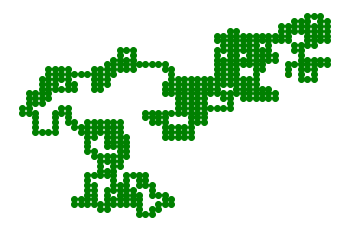

501 97 R = 9.719466139647428


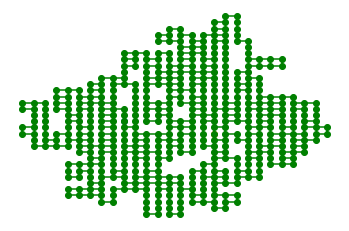

501 98 R = 9.916386226743342


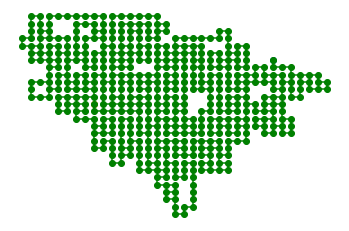

501 99 R = 19.80274215904307


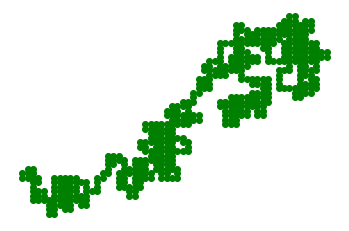

In [14]:
%matplotlib inline
for conf in range(N_conf):
    file_name = dir_name + 'struct_conf_' + str(conf) + '.dat'
    struct = read_conformation(file_name)
    print(len(struct), conf, 'R =', radius_of_gyration(struct))
    draw_conformation(struct)

In [29]:
# mean Binder cumulant
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
betas = np.linspace(0.1, 1, 10)
conf_count = 0
u = [0] * len(betas)
R = [0] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if radius_of_gyration(struct) > 12:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
u = [U / conf_count for U in u]

u_err = [0] * len(betas)
conf_count = 0
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if radius_of_gyration(struct) > 12:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2


u_err = [np.sqrt(u / conf_count) for u in u_err]

U500 = u
U500_err = u_err
print('fraction of dence conformations =', conf_count / N_rep)

fraction of dence conformations = 0.62


<IPython.core.display.Javascript object>


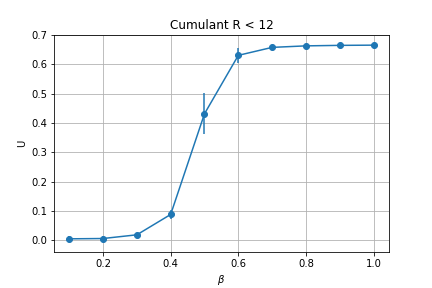

In [159]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant R < 12')
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U500, yerr=U500_err, fmt='o-')
plt.grid(True)
plt.show()

In [24]:
np.sqrt(500)

22.360679774997898

## 250 conformation length cumulant

In [5]:
dir_name = 'Conformations/L250_beta0.1_1_10/'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 100


In [6]:
%matplotlib inline
# mean Binder cumulant
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
U_transition = 0.450
betas = np.linspace(0.1, 1, 10)
U_good = [False] * N_conf
R = [0] * N_conf
Mag2 = [0] * N_conf
U = [0] * N_conf
beta_transition = [-1] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        u = [0] * len(betas)
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        mag2 = data['mag2']
        Mag2[j] = mag2[-1].mean
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] = 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
        U_good[j] = max(u) >= U_transition
        U[j] = max(u)
        for k in range(len(betas)):
            if u[k] >= U_transition:
                beta_transition[j] = betas[k]
                break
        R[j] = radius_of_gyration(struct)
        print(j, 'R =',R[j], U_good[j])
#         plt.figure()
#         plt.title('cumulant')
#         plt.xlabel(r'$\beta')
#         plt.ylabel('u')
#         plt.ylim([0, 1])
#         plt.errorbar(betas, u, fmt='o-')
#         plt.grid(True)
#         plt.show()
        
#         plt.figure()
#         plt.title('mag2')
#         plt.xlabel(r'$\beta$')
#         plt.ylabel('mag2')
#         plt.ylim([0, 1])
#         plt.errorbar(betas, [m.mean for m in mag2], fmt='o-')
#         plt.grid(True)
#         plt.show()
    


0 R = 16.555505445601963 False
1 R = 7.2417260476537955 True
2 R = 8.296766594955873 True
3 R = 7.715727565553583 True
4 R = 7.768231657753418 True
5 R = 6.955696099374494 True
6 R = 7.807823750092755 True
7 R = 14.508209778664304 True
8 R = 7.564733101821585 True
9 R = 6.946918627550123 True
10 R = 10.0026202500384 True
11 R = 7.176620436582911 True
12 R = 9.802053493753332 True
13 R = 10.273611173982674 False
14 R = 7.228534449687077 True
15 R = 7.4498306149102556 True
16 R = 7.754726018539222 True
17 R = 6.682029145385833 True
18 R = 8.317658416445946 True
19 R = 8.274907112040198 True
20 R = 13.092605803466803 True
21 R = 9.819075689335454 False
22 R = 7.241910160558936 True
23 R = 7.261296916788575 True
24 R = 9.419511388943253 True
25 R = 15.31285253124345 False
26 R = 9.190488125392706 True
27 R = 15.87977241491992 False
28 R = 8.5760838093239 True
29 R = 7.2931701140325265 True
30 R = 9.562169645636455 True
31 R = 6.65813462274955 True
32 R = 11.117208459472467 False
33 R = 8.0

<IPython.core.display.Javascript object>


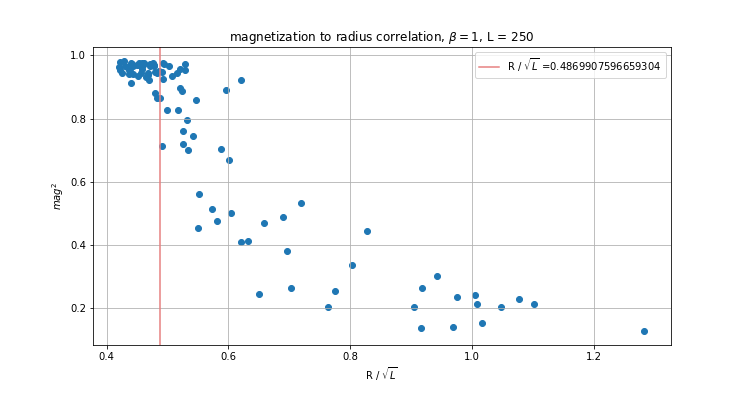

In [7]:
%matplotlib notebook
plt.figure()
plt.title(r'magnetization to radius correlation, $\beta=1$, L = 250')
plt.xlabel(r'R / $\sqrt{L}$')
plt.ylabel(r'$mag^2$')
plt.scatter([r / np.sqrt(250) for r in R], Mag2)
plt.axvline(x=7.7/np.sqrt(250), color = (0.9, 0.5, 0.5), label=r'R / $\sqrt{L}$ ='+str(7.7/np.sqrt(250)))
plt.legend(loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


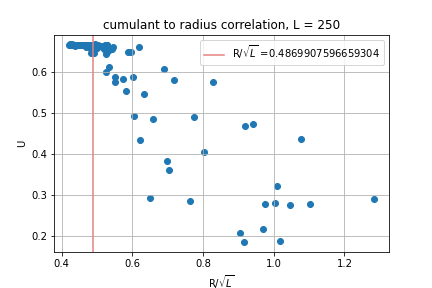

In [15]:
%matplotlib notebook
plt.figure()
plt.title(r'cumulant to radius correlation, L = 250')
plt.xlabel(r'R/$\sqrt{L}$')
plt.ylabel(r'U')
plt.scatter([r/np.sqrt(250) for r in R], U)
plt.axvline(x=7.7/np.sqrt(250), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(7.7/np.sqrt(250)))
plt.legend(loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


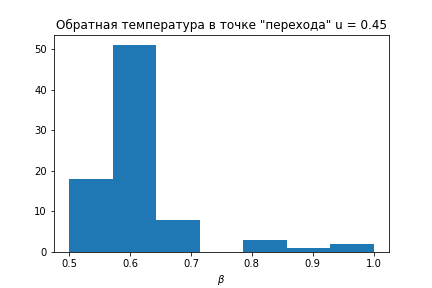

In [16]:
%matplotlib notebook
beta_hist = []
k = 0
for b in beta_transition:
    if b > 0:
        beta_hist.append(b)
        

plt.figure()
plt.title('Обратная температура в точке \"перехода\" u = ' + str(U_transition))
plt.xlabel(r'$\beta$')
plt.hist(beta_hist, bins=7)
plt.show()

<IPython.core.display.Javascript object>


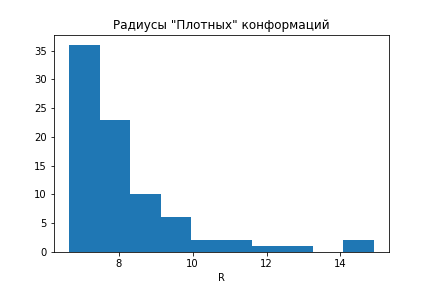

In [145]:
%matplotlib notebook
R_hist = []
for i in range(len(R)):
    if U_good[i]:
        R_hist.append(R[i])

plt.figure()
plt.title('Радиусы \"Плотных\" конформаций')
plt.xlabel('R')
plt.hist(R_hist, bins=10)
plt.show()

<IPython.core.display.Javascript object>


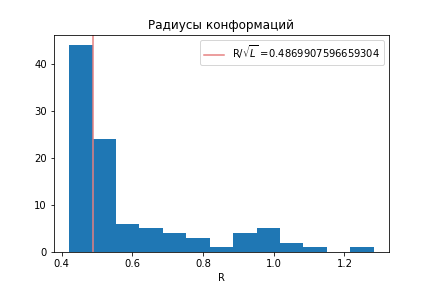

In [20]:
plt.figure()
plt.title('Радиусы конформаций')
plt.xlabel('R')
plt.hist([r/np.sqrt(250) for r in R], bins='auto')
plt.axvline(x=7.7/np.sqrt(250), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(7.7/np.sqrt(250)))
plt.legend(loc='best')
plt.show()

In [32]:
# mean Binder cumulant
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
betas = np.linspace(0.1, 1, 10)
R_normal = np.sqrt(250) / 2
conf_count = 0
u = [0] * len(betas)
R = [0] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if radius_of_gyration(struct) > R_normal:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
u = [U / conf_count for U in u]

u_err = [0] * len(betas)
conf_count = 0
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if radius_of_gyration(struct) > R_normal:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2


u_err = [np.sqrt(u / conf_count) for u in u_err]

U250 = u
U250_err = u_err

print('fraction of dence conformations =', conf_count / N_rep)

fraction of dence conformations = 0.51


In [150]:
R_normal

7.905694150420948

<IPython.core.display.Javascript object>


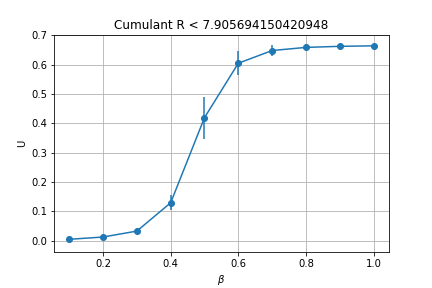

In [151]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant R < '+str(R_normal))
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U250, yerr=U250_err, fmt='o-')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


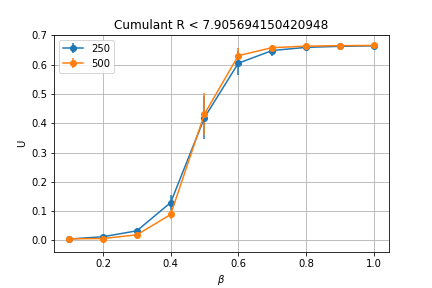

In [83]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant R < '+ str(R_normal))
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U250, yerr=U250_err, fmt='o-', label='250')
plt.errorbar(betas, U500, yerr=U500_err, fmt='o-', label='500')
plt.legend(loc='best')
plt.grid(True)
plt.show()

0.0021532630278212864


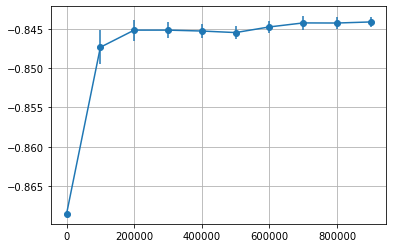

0.0010934677011780272


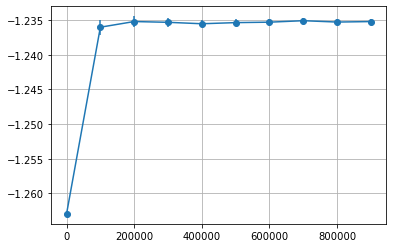

0.001748890027945867


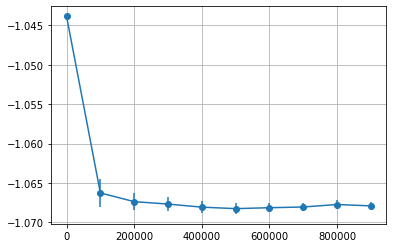

0.0014051755682204115


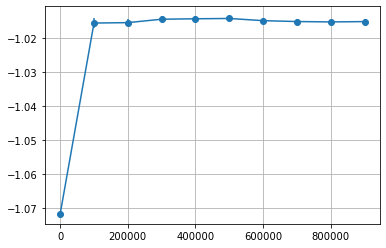

0.0012191147037969327


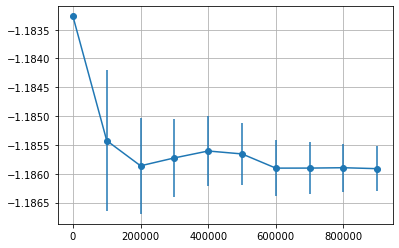

0.0012718055907366922


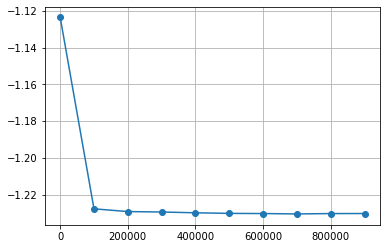

0.0011685263789534242


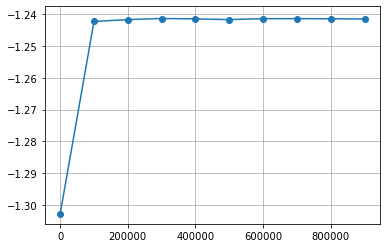

0.0020037619874770977


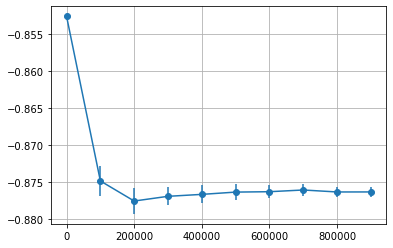

0.0018552279265882385


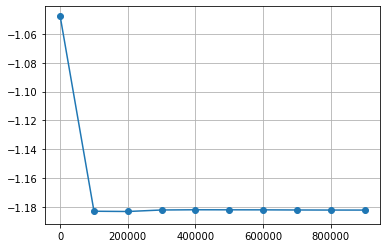

0.0014511570758596833


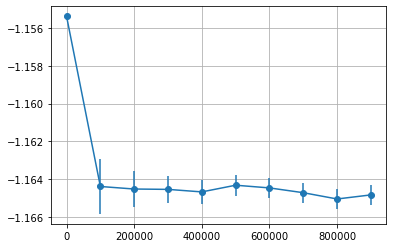

0.001817023439602928


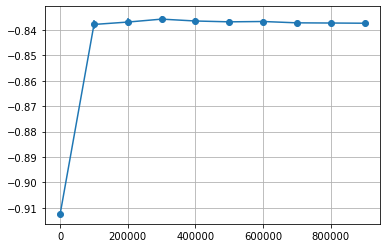

0.0014998645519301924


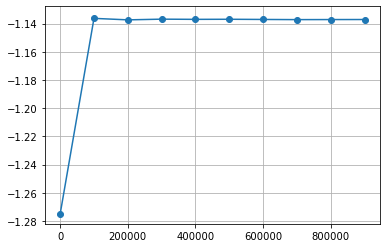

0.0014660125779393186


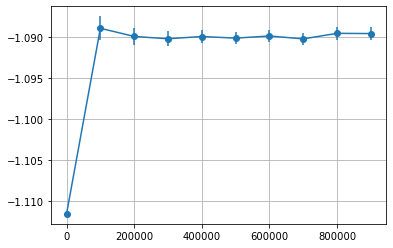

0.0026202979030734465


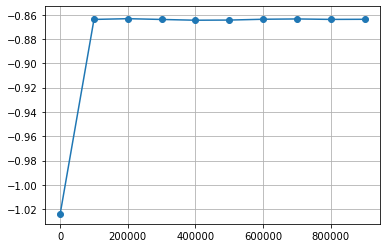

0.0016318704517059893


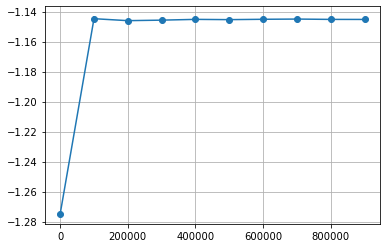

0.001076531673856092


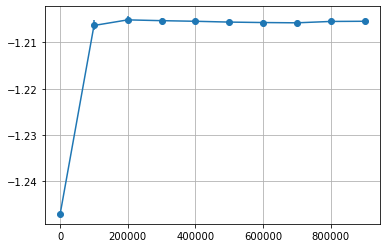

0.001525853882695685


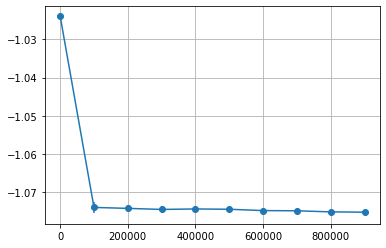

0.0010232298922712394


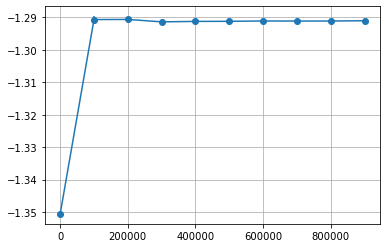

0.0015453003526435616


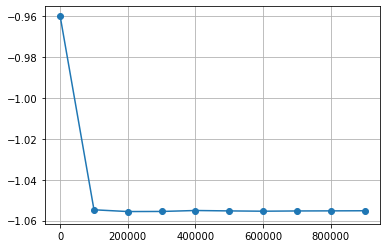

0.001387664871079134


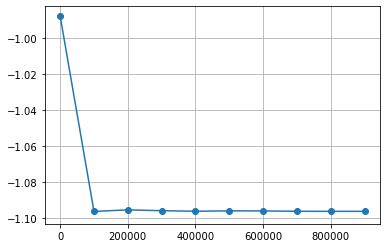

0.0017640796048813525


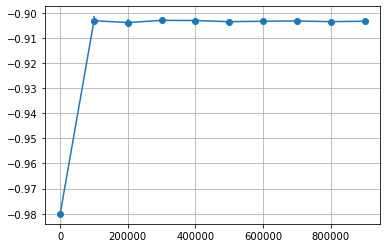

0.001588842551244075


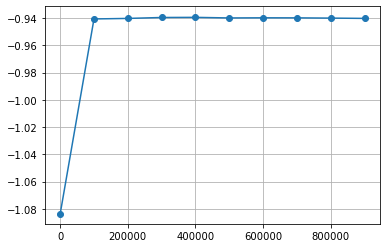

0.001400686229493964


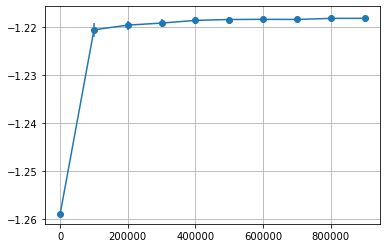

0.0010900765024541646


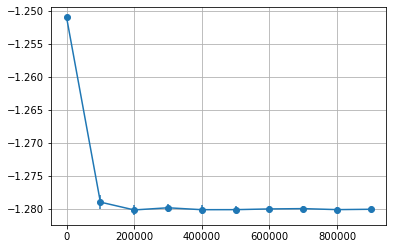

0.0016335361436498135


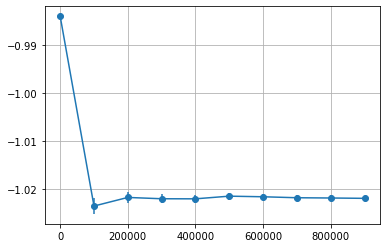

0.0016068634564870192


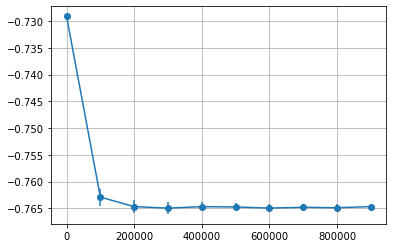

0.0017677404943165992


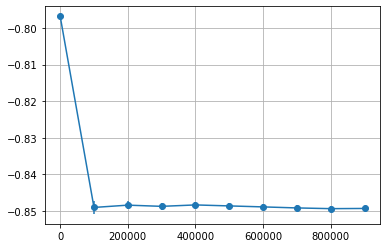

0.0023857311322918163


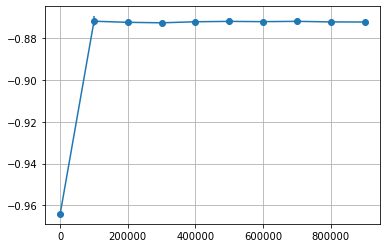

0.0017963506619588403


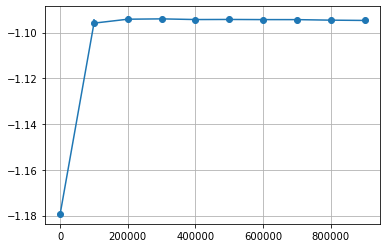

0.0012231164130271247


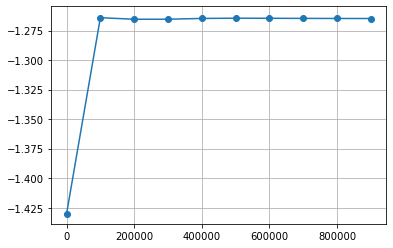

0.001617885732526489


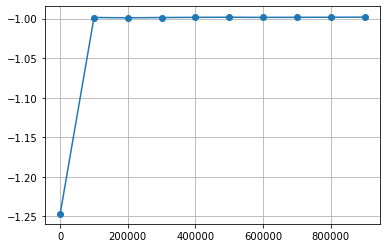

0.001147315877106883


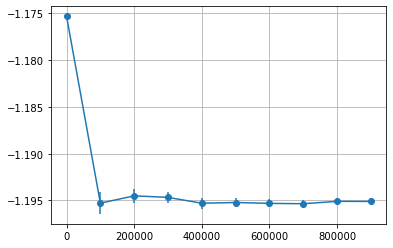

0.0022045094910944384


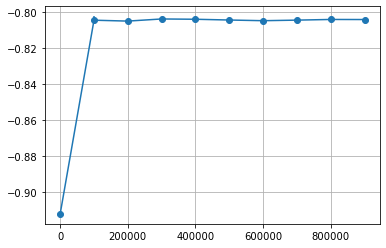

0.0013883986076333715


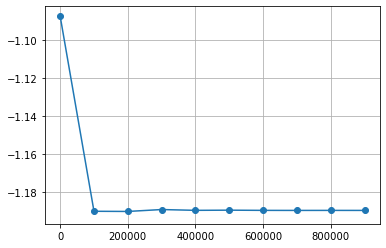

0.0014284141947870472


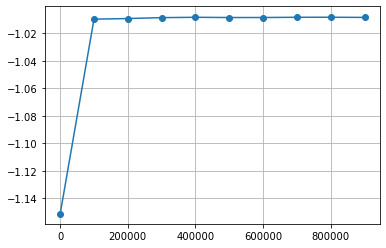

0.0017765214397823766


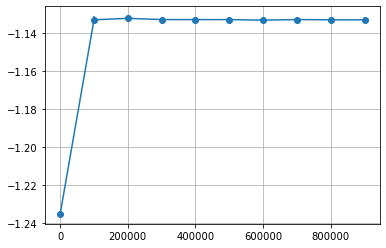

0.0020644217673621637


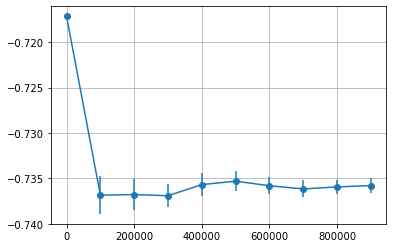

0.0015188323560944737


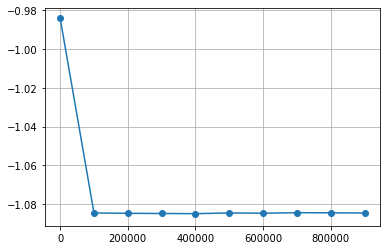

0.0011653070452131036


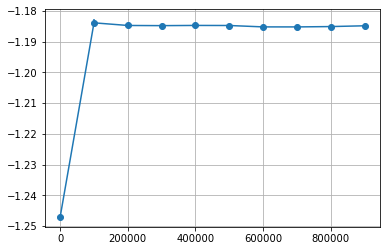

0.0021649864596476505


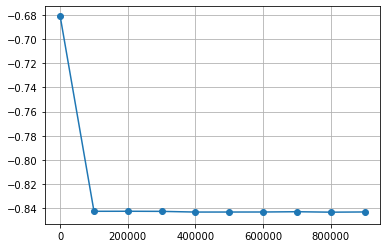

0.0017871811990634865


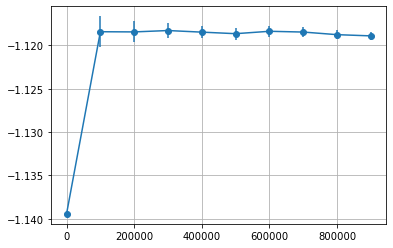

0.0011509402603777992


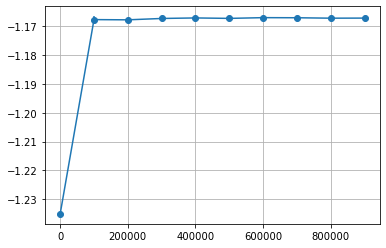

0.002028452938306229


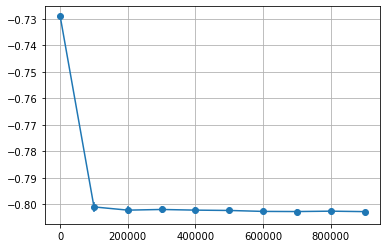

0.001343493468687927


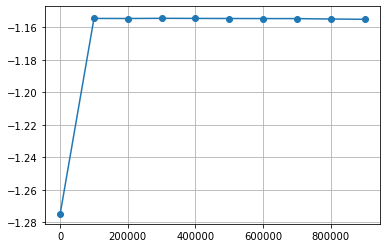

0.0013866238424340282


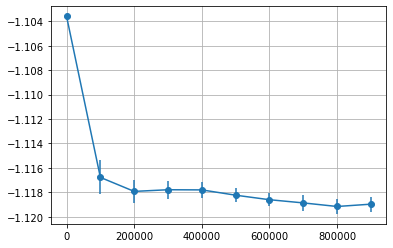

0.0026919535761481964


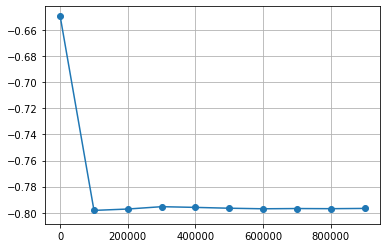

0.001196185072703787


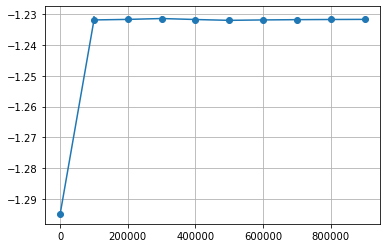

0.0021301480961575456


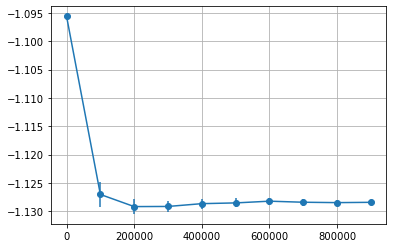

0.0016307526596797334


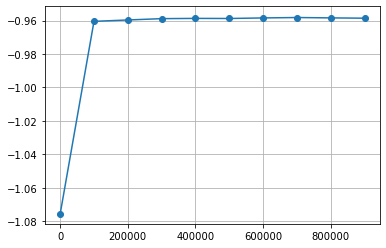

0.0015338048430918573


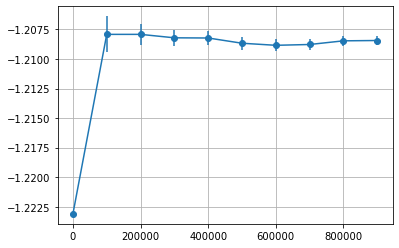

0.0013322774230211496


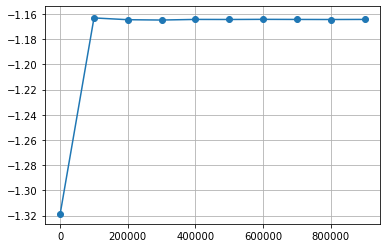

0.0015415781105306528


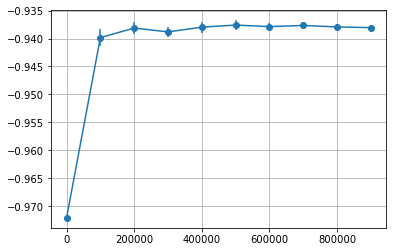

0.0010636386235872302


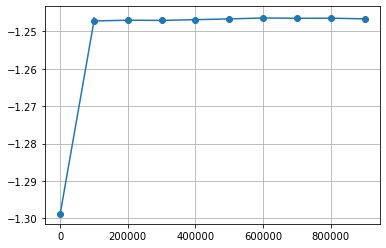

0.0019492230397005973


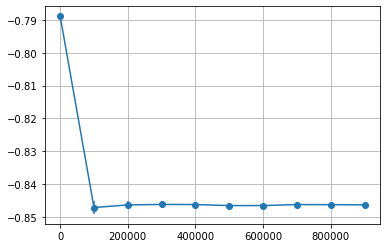

0.0011877179430950077


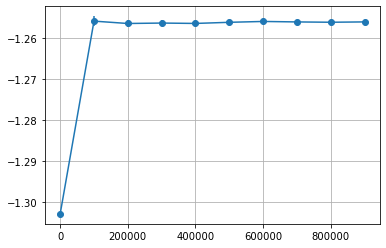

0.0014867623532306654


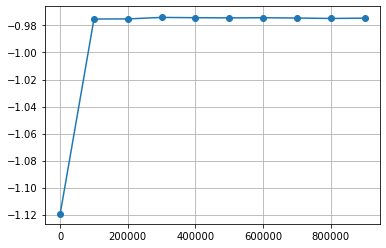

0.0014559845938501583


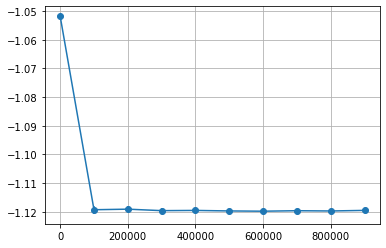

0.0012355661586985257


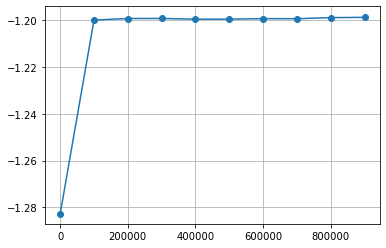

0.001145722418776591


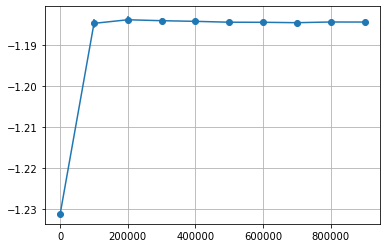

0.0019028410909763007


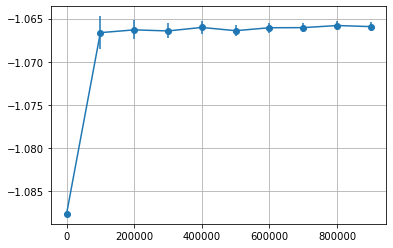

0.0012681960902113877


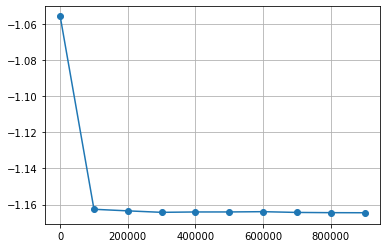

0.0015250140421159922


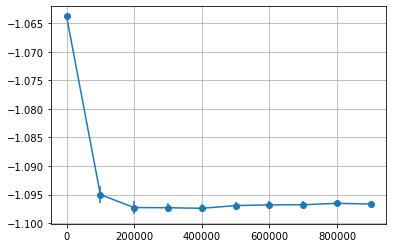

0.0018369656427623562


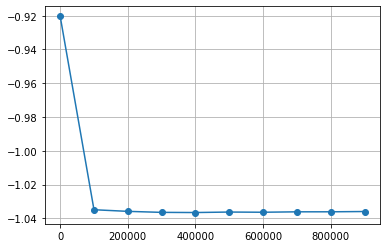

0.0018564512177467818


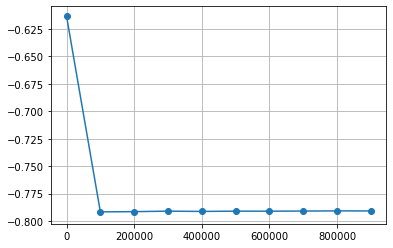

0.0011900508927462261


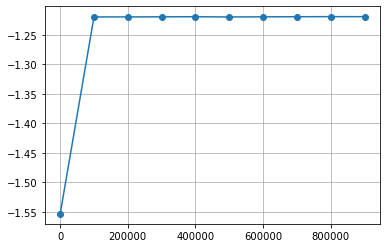

0.0011157997814636171


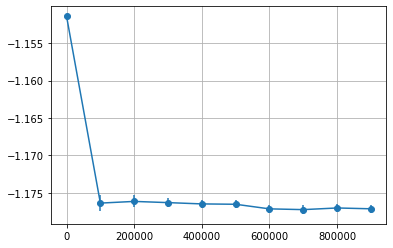

0.0013013230370346042


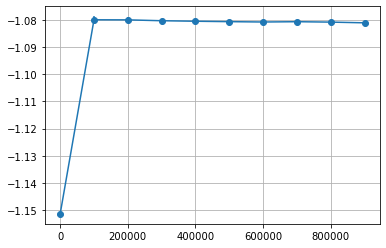

0.001649165438955403


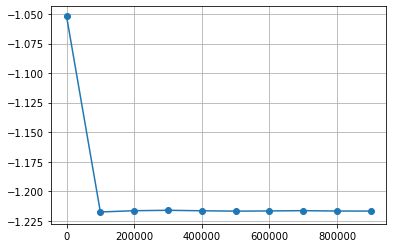

0.0018187959020291207


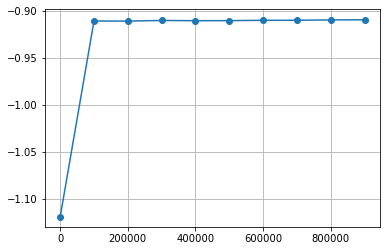

0.0014216722914501905


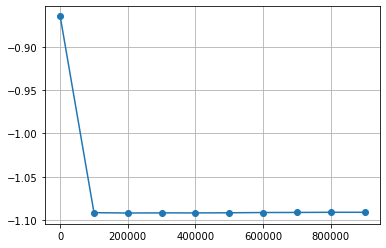

0.00166083996384267


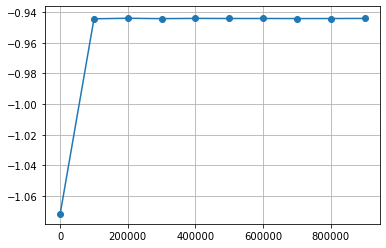

0.0012204783241706598


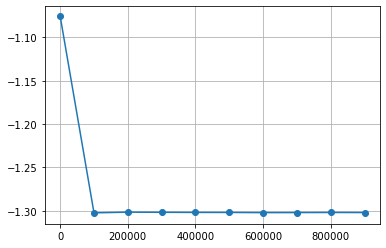

0.0013855712647817277


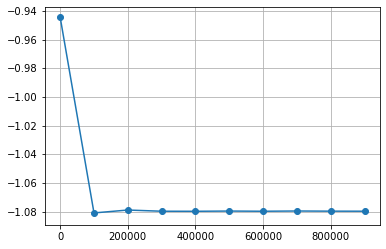

0.0012153765428207734


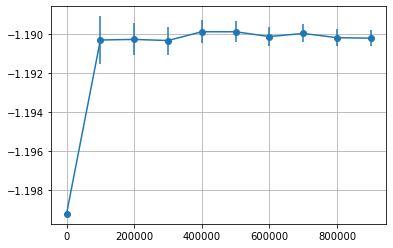

0.001263240777881729


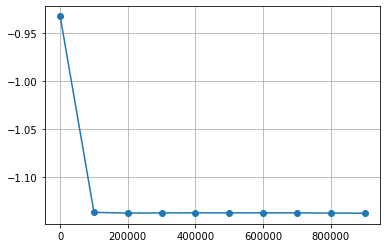

0.0015484768233797622


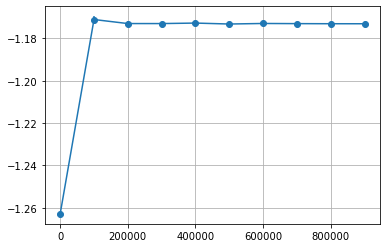

0.001404025789827525


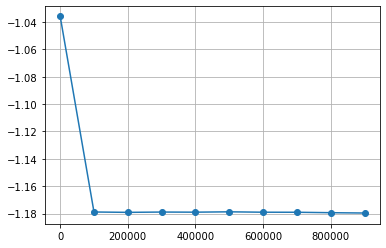

0.001740928343890382


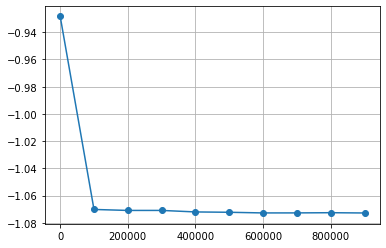

0.0019153991479758463


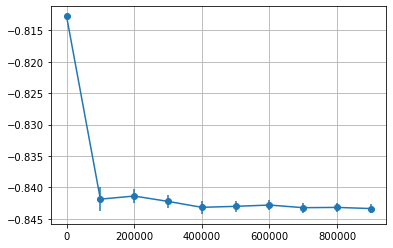

0.0019337321211570619


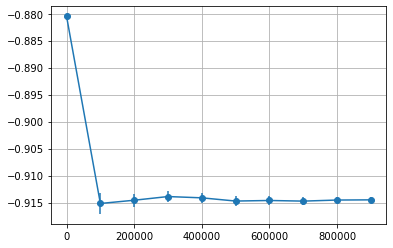

0.001744320624673588


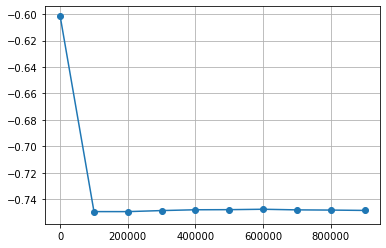

0.0021737348726848914


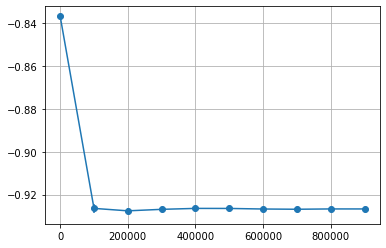

0.0011961816434049662


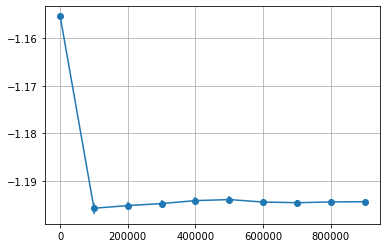

0.0016022781396889591


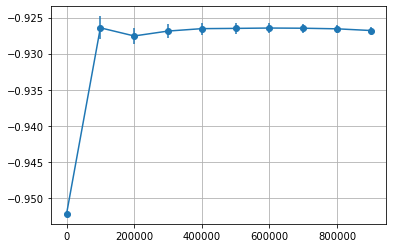

0.0016521073502372228


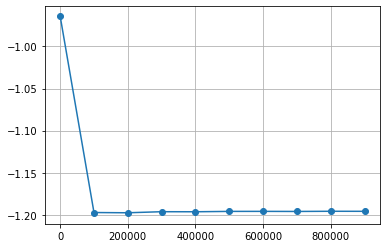

0.0013871692052073944


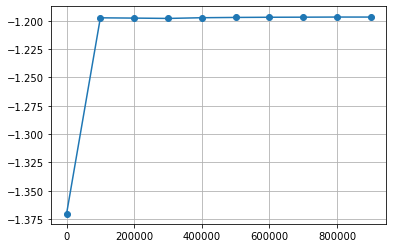

0.0015292870231992076


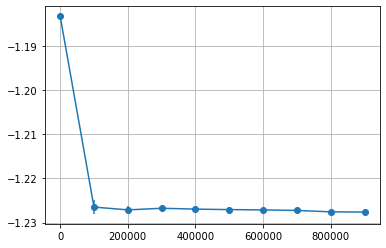

0.0024830006290429223


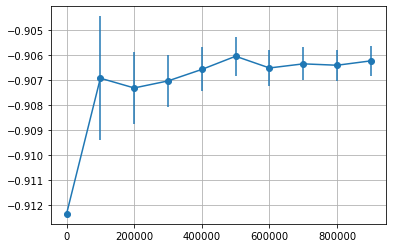

0.0013077276753177844


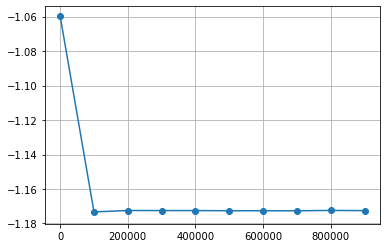

0.0012914753426713748


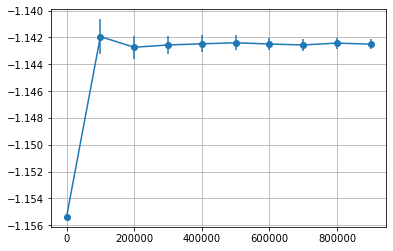

0.0014247692414835898


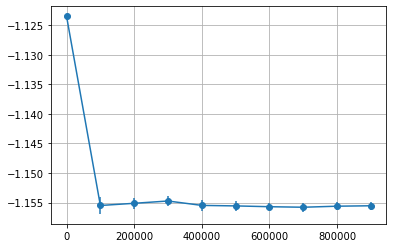

0.0020042831576528265


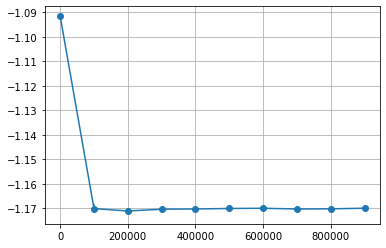

0.0018506821817970553


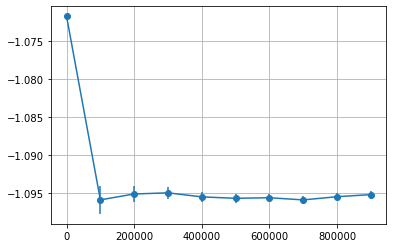

0.0012428582046418936


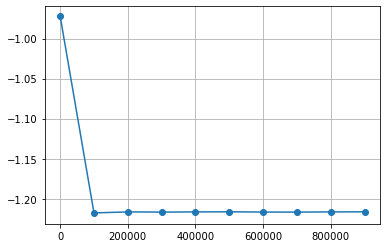

0.001407477501485169


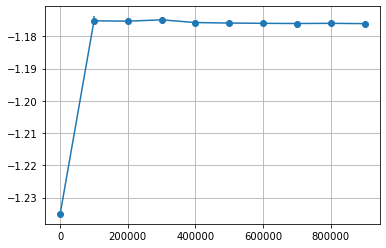

0.00229381378203761


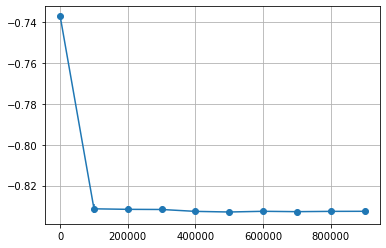

0.0016849282300025114


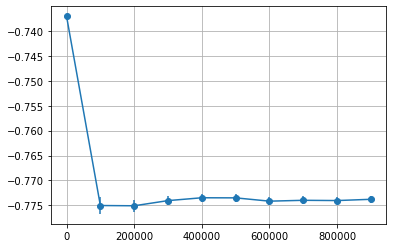

0.0011856475830954514


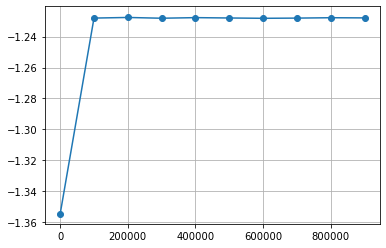

0.0014116503117377749


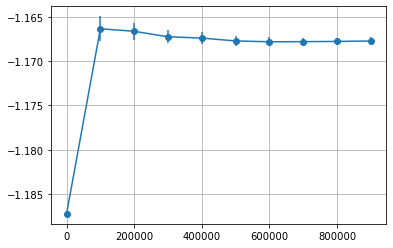

0.0020527917552307486


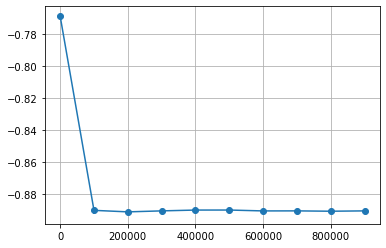

In [105]:
# checing convergion
%matplotlib inline
b = 4
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        ene_arr = data['ene_arr']
        print(max([e.errorbar for e in ene_arr[b]]))
        plt.figure()
        plt.errorbar(range(0, 100000 * 10, 100000), [e.mean for e in ene_arr[b]], yerr=[e.errorbar for e in ene_arr[b]], fmt='o-',)
        plt.grid(True)
        plt.show()

## 250 length cconformation cumulant #2
there are 1000 conformation of 250 length

In [8]:
dir_name = 'Conformations/L250_beta0.1_1_10(1000)/'
conformations = utils.load_Conformations_from_dir(dir_name) # new way of loaing data
conformations.sort(key=lambda x: x.R)
R_normal = np.sqrt(250) / 2
L = 250

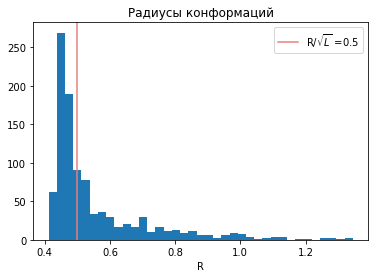

In [15]:
plt.figure()
plt.title('Радиусы конформаций')
plt.xlabel('R')
plt.hist([utils.R_to_norm(c.R, L) for c in conformations], bins='auto')
plt.axvline(x=utils.R_to_norm(R_normal, L), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(R_to_norm(R_normal, L)))
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


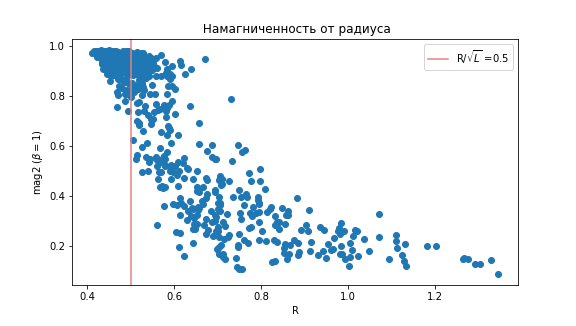

In [16]:
%matplotlib notebook
plt.figure()
plt.title(' Намагниченность от радиуса')
plt.xlabel('R')
plt.ylabel(r'mag2 ($\beta=1$)')
plt.scatter(x=[utils.R_to_norm(c.R, L) for c in conformations], y=[c.mag2[-1].mean for c in conformations])
plt.axvline(x=utils.R_to_norm(R_normal, L), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(R_to_norm(R_normal, L)))
plt.legend(loc='best')
plt.show()

mag2 = 0.7566582644614525
R normalized = 0.468533756066011


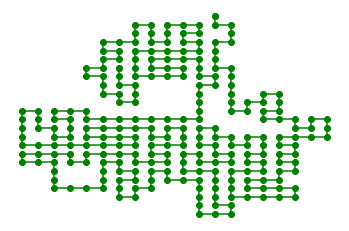

mag2 = 0.7804078262553623
R normalized = 0.4856837450227897


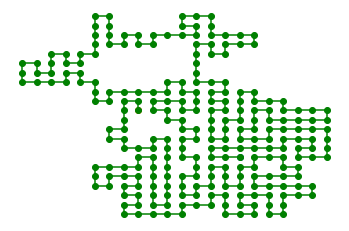

mag2 = 0.7410708382698049
R normalized = 0.4932366172512447


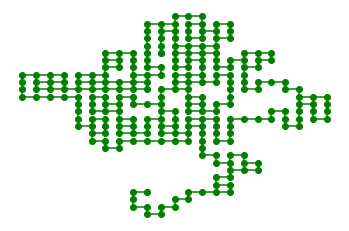

In [17]:
%matplotlib inline
for c in conformations:
    if c.mag2[-1].mean < 0.8 and R_to_norm(c.R, L) < 0.5:
        print('mag2 =', c.mag2[-1].mean)
        print('R normalized =', R_to_norm(c.R, L))
        draw_conformation(c.struct)

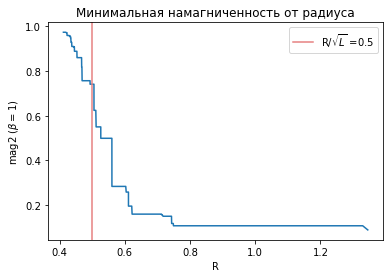

In [12]:
# min mag2 for R
R_arr = []
mag2_arr = []
min_mag2 = 1
for c in conformations:
    R_arr.append(utils.R_to_norm(c.R, L))
    min_mag2 = min(min_mag2, c.mag2[-1].mean)
    mag2_arr.append(min_mag2)
    
plt.figure()
plt.title('Минимальная намагниченность от радиуса')
plt.xlabel('R')
plt.ylabel(r'mag2 ($\beta=1$)')
plt.plot(R_arr, mag2_arr)
plt.axvline(x=utils.R_to_norm(R_normal, L), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(R_to_norm(R_normal, L)))
plt.legend(loc='best')
plt.show()

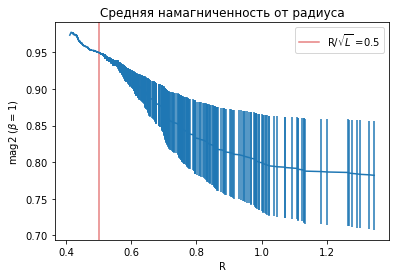

In [13]:
# min mag2 for R
R_arr = []
mag2_arr = []
mag2_sum = 0
k = 0
for c in conformations:
    k += 1
    R_arr.append(utils.R_to_norm(c.R, L))
    mag2_sum += c.mag2[-1].mean
    mag2_arr.append(mag2_sum / k)
    
mag2_err = []
for n in range(1, len(conformations)+1):
    er = 0
    for i in range(n):
        er += (conformations[i].mag2[-1].mean - mag2_arr[n-1])**2 / n
    
    mag2_err.append(er)

plt.figure()
plt.title('Средняя намагниченность от радиуса')
plt.xlabel('R')
plt.ylabel(r'mag2 ($\beta=1$)')
plt.errorbar(R_arr, mag2_arr, yerr=mag2_err)
plt.axvline(x=utils.R_to_norm(R_normal, L), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(R_to_norm(R_normal, L)))
plt.legend(loc='best')
plt.show()

In [14]:
# conformations are already sorte by R
betas = np.linspace(0.1, 1, 10)
N = 10
U = N * [0]
R_normal = np.sqrt(250) / 2
counter = 0
for conf in conformations:
    if conf.R > R_normal:
        continue
    
    counter += 1
    for i in range(conf.nBetas):
        U[i] += conf.U[i]

U = [u / counter for u in U]

U_err = N * [0]
for conf in conformations:
    if conf.R > R_normal:
        continue
    
    for i in range(conf.nBetas):
        U_err[i] += (conf.U[i] - U[i])**2
        
U_err = [np.sqrt(u / counter) for u in U_err]
U250_2 = U
U250_2_err = U_err

<IPython.core.display.Javascript object>


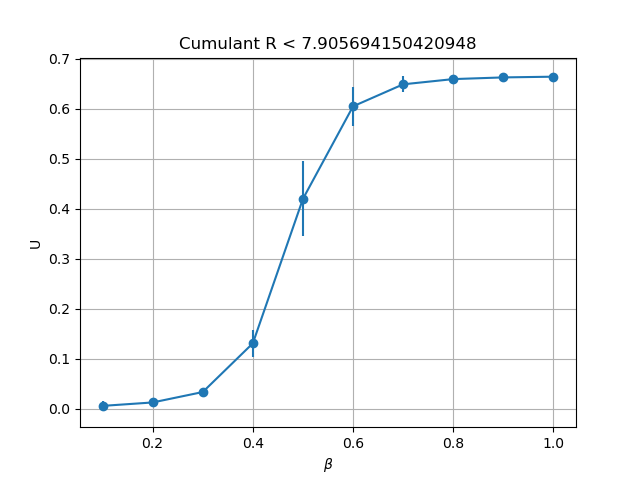

In [24]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant R < '+str(R_normal))
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U250_2, yerr=U250_2_err, fmt='o-')
plt.grid(True)
plt.show()

## 1000 conformation length cumulant

In [75]:
dir_name = 'Conformations\\L1000_beta0.1_1_10\\'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 100


1001 0 R = 28.30080592196483


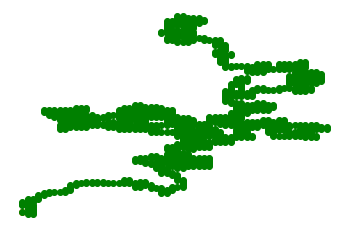

1001 1 R = 13.926336860081362


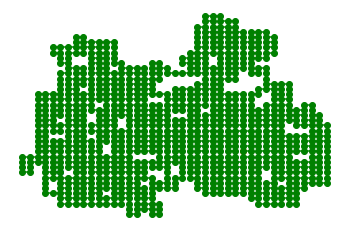

1001 2 R = 14.295609631145261


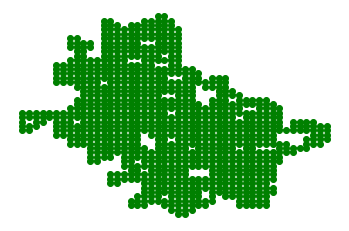

1001 3 R = 14.507738093732698


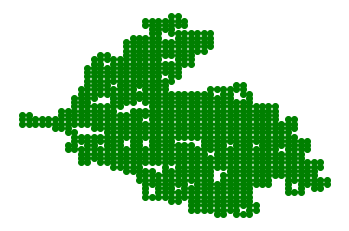

1001 4 R = 15.685638000470274


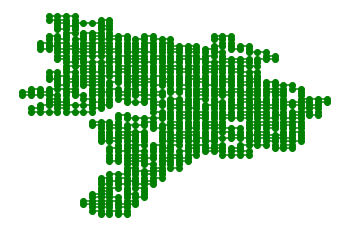

1001 5 R = 14.114897594437677


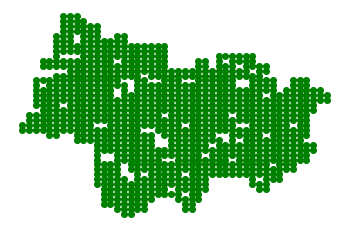

1001 6 R = 13.825754369319402


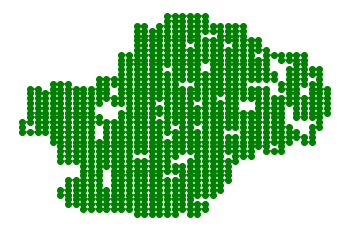

1001 7 R = 27.3949527221215


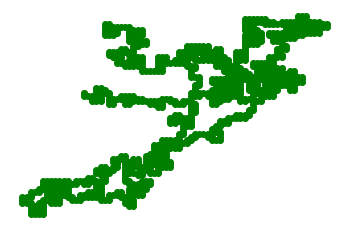

1001 8 R = 14.308287915287536


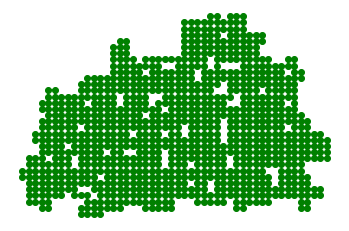

1001 9 R = 14.683395934372701


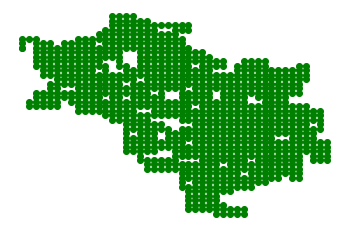

1001 10 R = 43.05428839071191


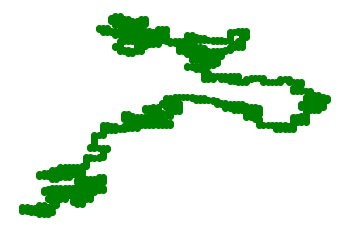

1001 11 R = 14.518528021137088


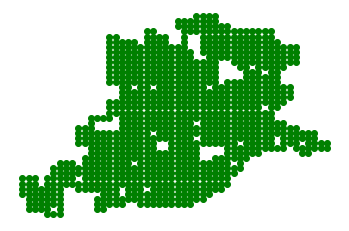

1001 12 R = 14.789054500468625


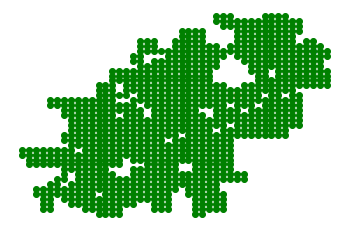

1001 13 R = 20.590227805450773


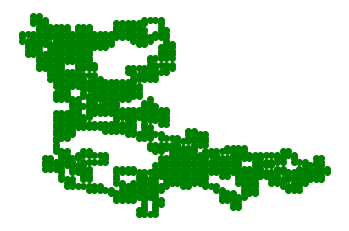

1001 14 R = 13.7814659041143


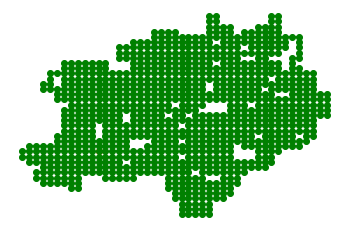

1001 15 R = 13.621808584329573


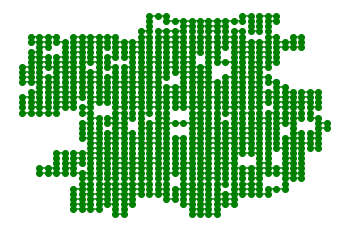

1001 16 R = 15.227646754093014


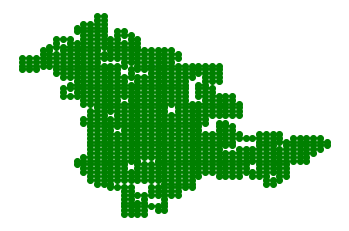

1001 17 R = 13.753436037489783


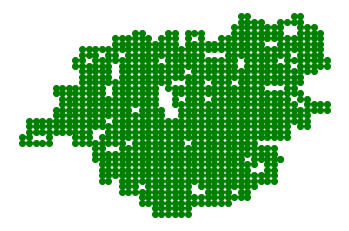

1001 18 R = 14.268937984831908


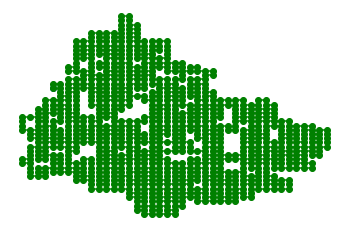

1001 19 R = 15.012969396842472


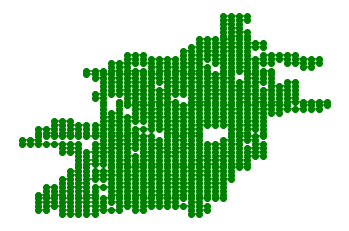

1001 20 R = 20.47708355180186


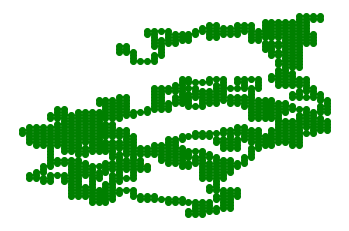

1001 21 R = 31.2115009293319


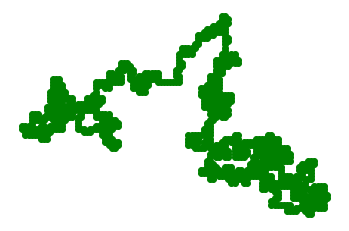

1001 22 R = 14.066207724270091


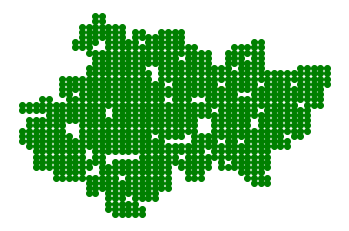

1001 23 R = 14.467633733126583


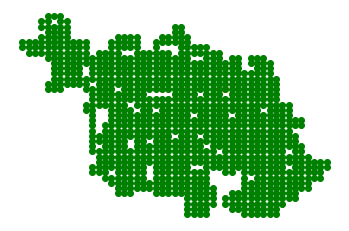

1001 24 R = 13.615011991489085


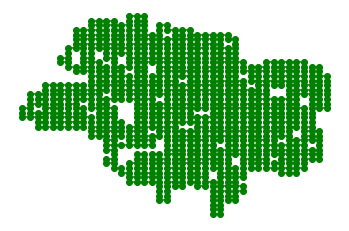

1001 25 R = 32.77164540474262


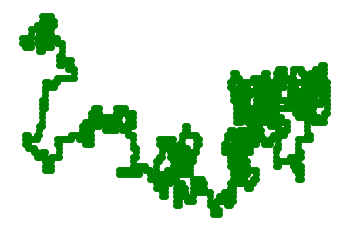

1001 26 R = 31.117064070628064


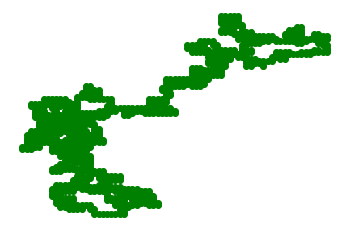

1001 27 R = 24.427393070853718


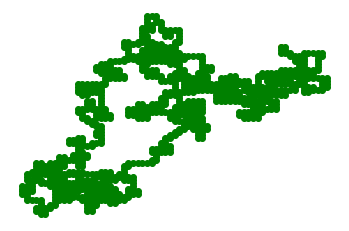

1001 28 R = 18.75438419197584


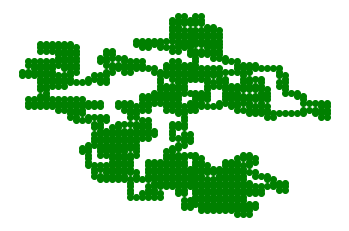

1001 29 R = 27.173872430974345


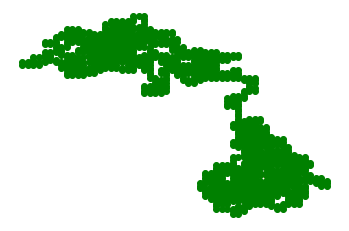

1001 30 R = 24.460460735788423


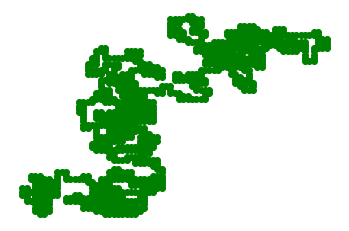

1001 31 R = 13.943164845054419


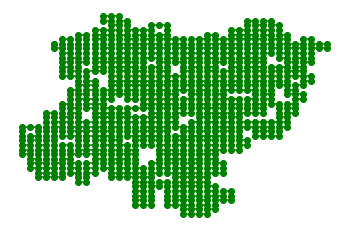

1001 32 R = 18.291929914727135


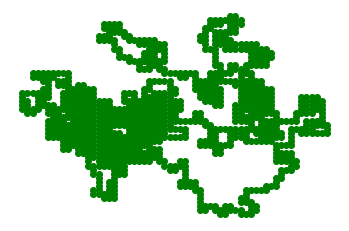

1001 33 R = 15.183017270921097


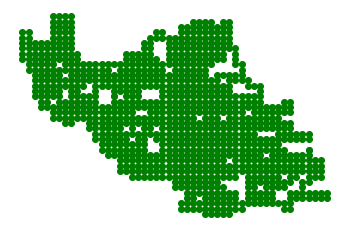

1001 34 R = 22.800077786321875


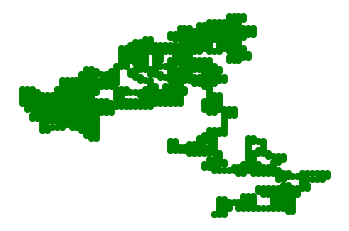

1001 35 R = 15.11514314942444


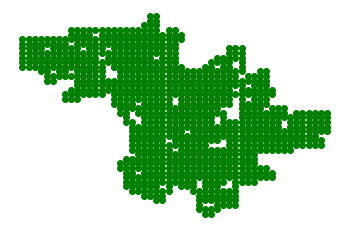

1001 36 R = 24.075087512047357


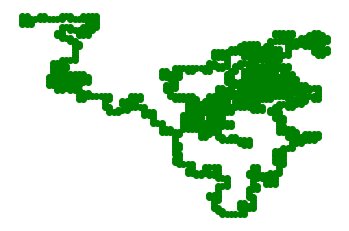

1001 37 R = 17.271861257554388


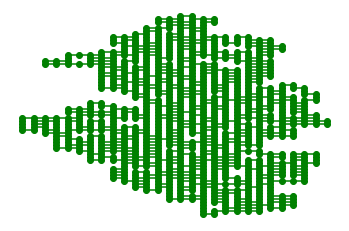

1001 38 R = 14.33571620008231


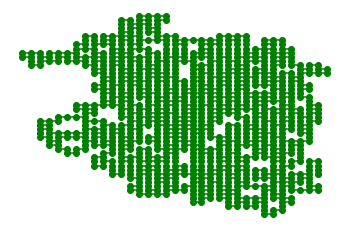

1001 39 R = 34.76923389792586


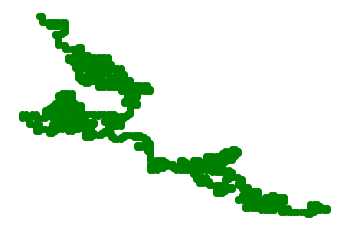

1001 40 R = 13.572702357422578


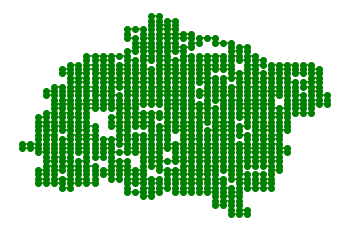

1001 41 R = 15.120271827487281


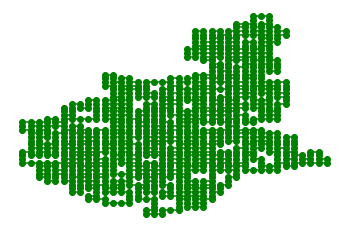

1001 42 R = 22.899115542859217


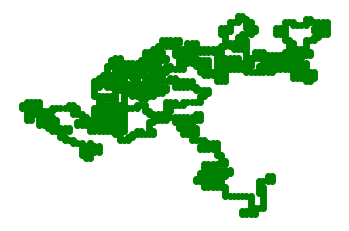

1001 43 R = 17.274240037202947


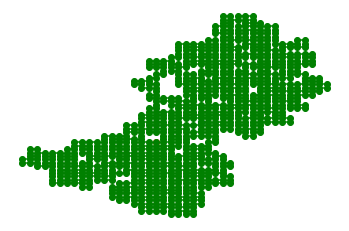

1001 44 R = 14.020306325187985


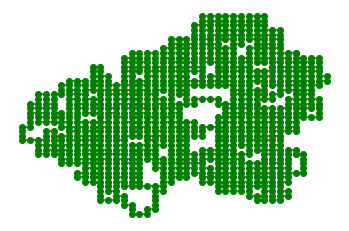

1001 45 R = 38.44505006147951


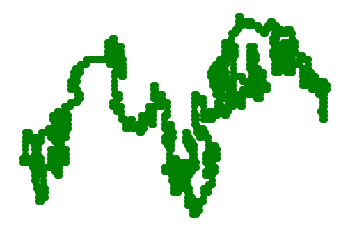

1001 46 R = 13.678791329142184


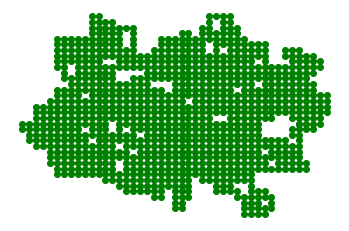

1001 47 R = 15.142331270883268


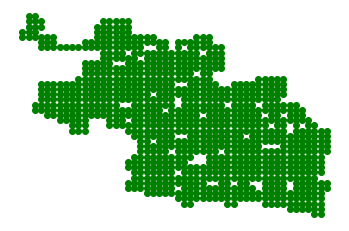

1001 48 R = 39.85622120502825


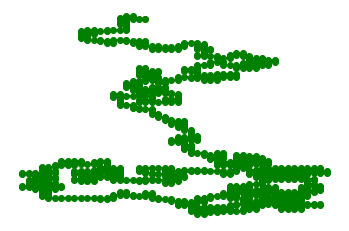

1001 49 R = 14.387117387351037


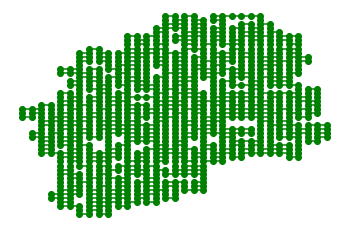

1001 50 R = 15.510518014742761


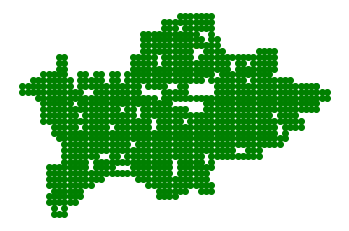

1001 51 R = 36.121734700657896


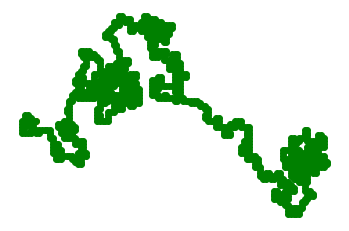

1001 52 R = 16.931694326681633


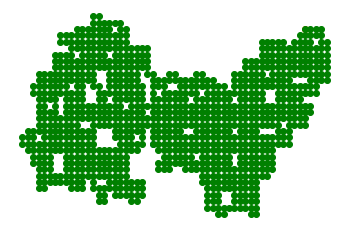

1001 53 R = 33.73369998988361


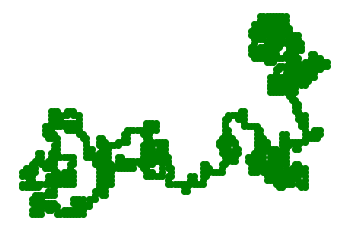

1001 54 R = 13.639677575019679


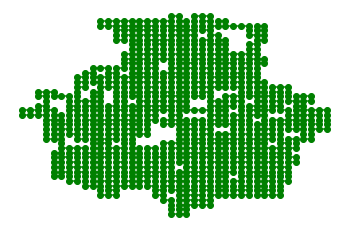

1001 55 R = 21.187237739142088


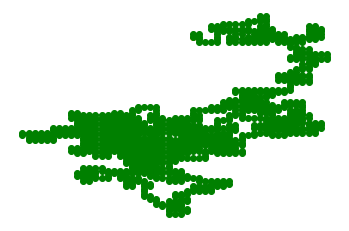

1001 56 R = 13.827704291842112


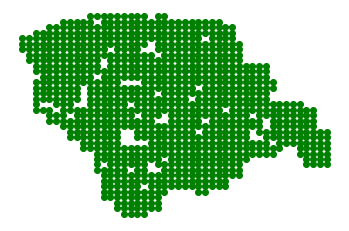

1001 57 R = 14.051648973462665


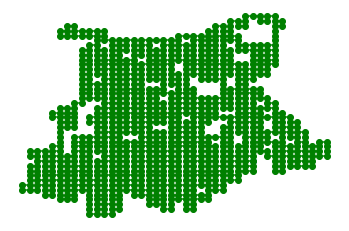

1001 58 R = 13.575859889985722


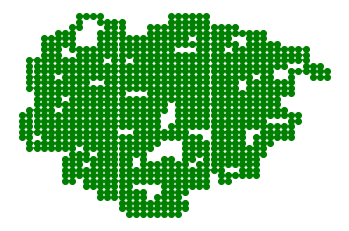

1001 59 R = 21.707114390697885


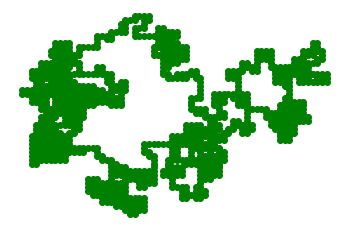

1001 60 R = 13.878364075502057


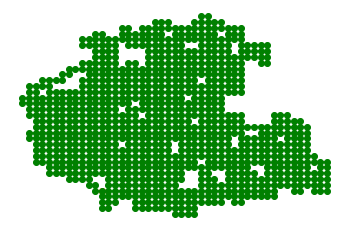

1001 61 R = 24.46302802353174


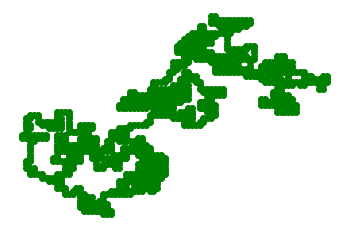

1001 62 R = 14.704109293966498


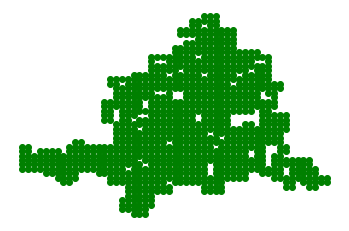

1001 63 R = 31.26740113284795


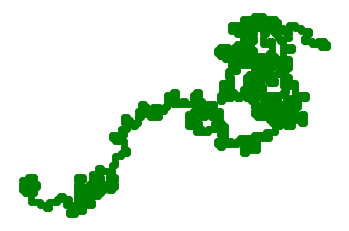

1001 64 R = 14.894166702446883


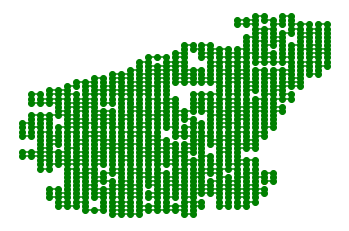

1001 65 R = 13.738553909530884


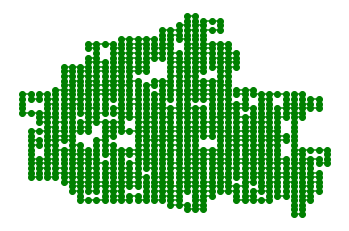

1001 66 R = 13.820120316161068


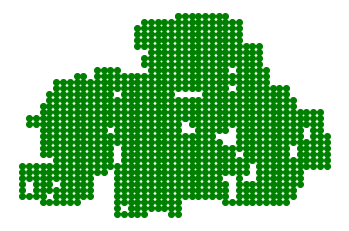

1001 67 R = 13.747264761975012


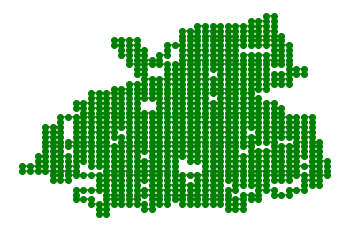

1001 68 R = 42.14592883169751


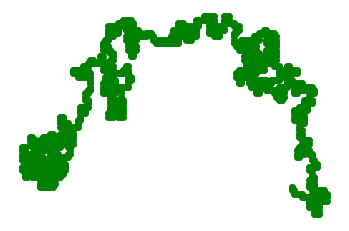

1001 69 R = 31.868360196977967


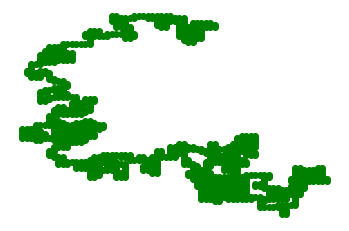

1001 70 R = 20.900320628446202


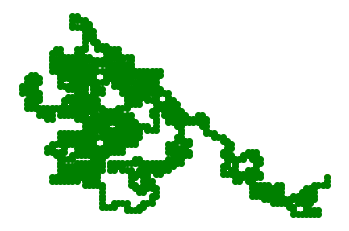

1001 71 R = 14.047626669089574


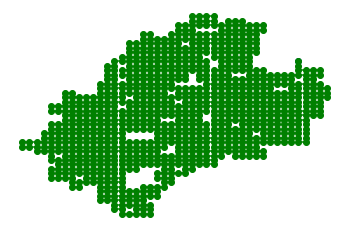

1001 72 R = 13.831719551524683


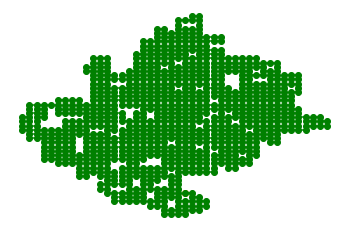

1001 73 R = 15.843545723727985


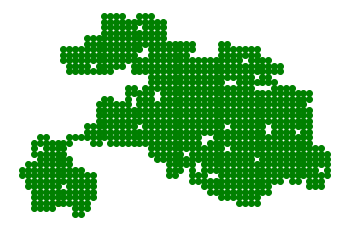

1001 74 R = 14.233672629701182


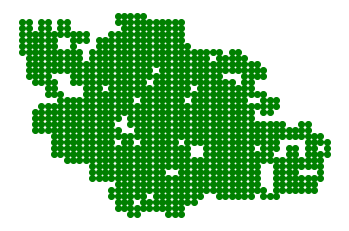

1001 75 R = 14.127001383579202


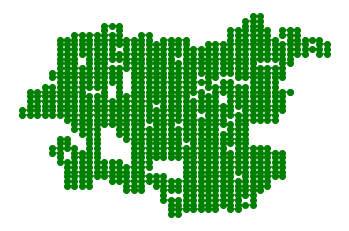

1001 76 R = 13.762520214978853


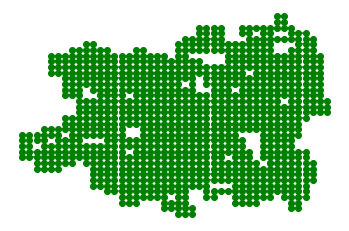

1001 77 R = 13.853291403882169


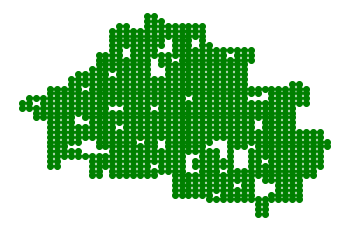

1001 78 R = 32.16942463528667


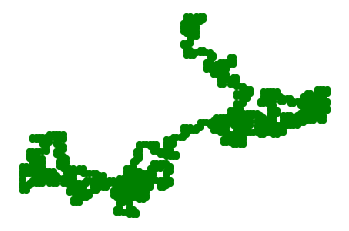

1001 79 R = 23.004438190117522


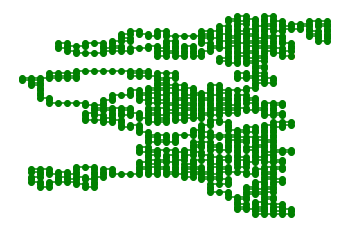

1001 80 R = 36.636500915999946


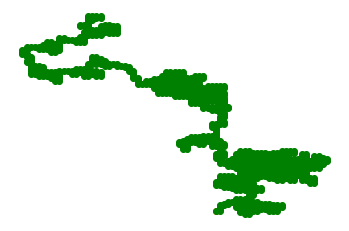

1001 81 R = 31.322868940130608


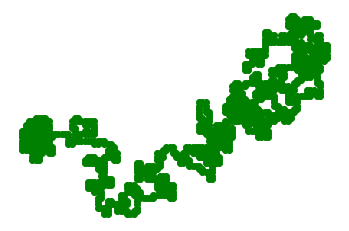

1001 82 R = 14.191184769424817


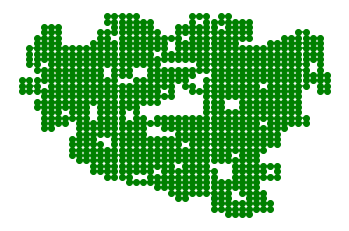

1001 83 R = 27.019856820533555


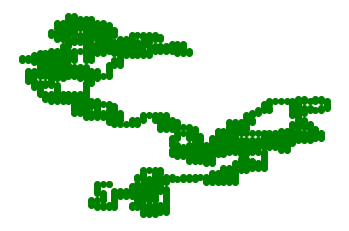

1001 84 R = 13.980070308334719


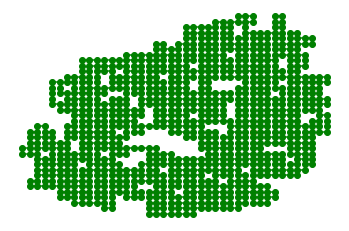

1001 85 R = 13.79833690714545


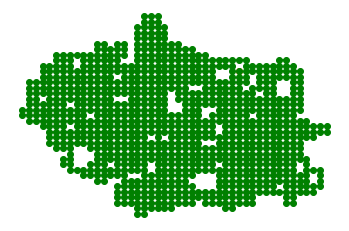

1001 86 R = 14.06677354229114


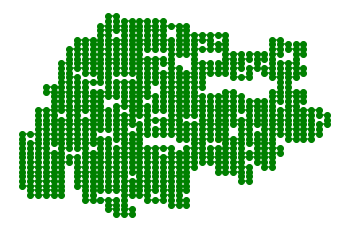

1001 87 R = 19.898555250203678


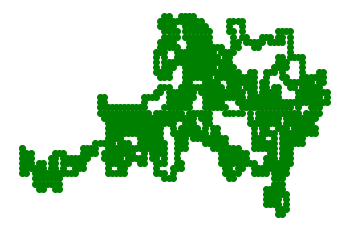

1001 88 R = 14.231550421797207


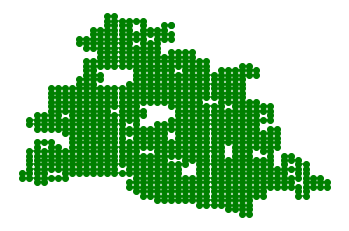

1001 89 R = 14.933255263750851


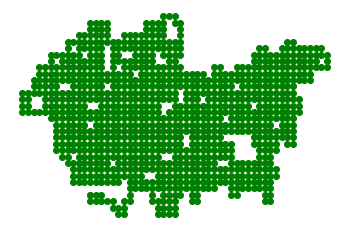

1001 90 R = 18.77019534297233


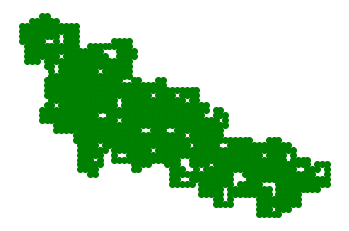

1001 91 R = 13.770695851679275


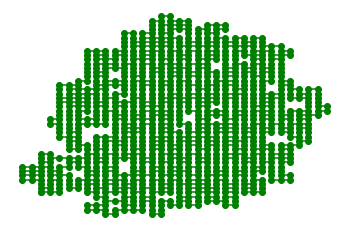

1001 92 R = 13.645660471247156


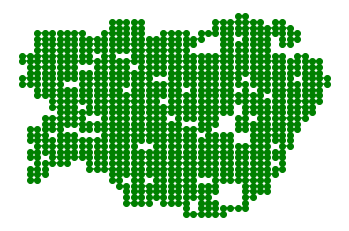

1001 93 R = 15.00050015749625


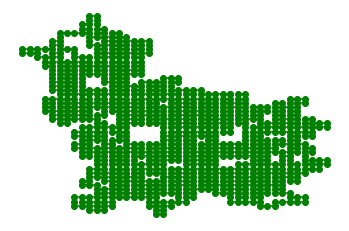

1001 94 R = 13.624926462889277


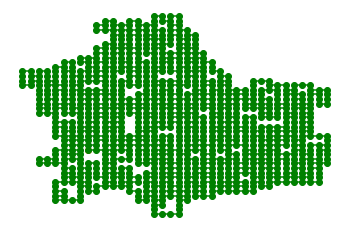

1001 95 R = 30.795984450748758


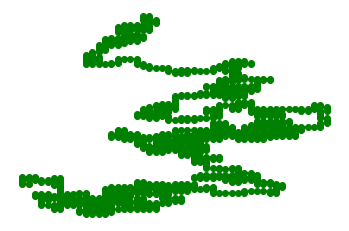

1001 96 R = 33.54440350877436


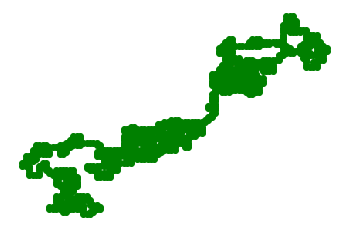

1001 97 R = 13.686827177778385


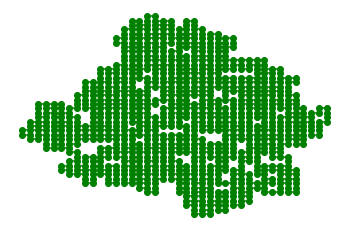

1001 98 R = 15.223837091981045


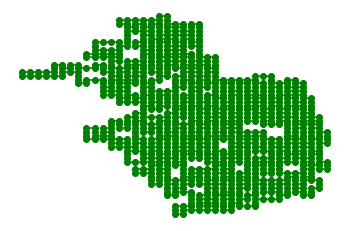

1001 99 R = 25.293711995180608


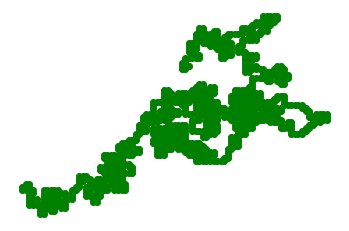

In [190]:
%matplotlib inline
for conf in range(N_conf):
    file_name = dir_name + 'struct_conf_' + str(conf) + '.dat'
    struct = read_conformation(file_name)
    print(len(struct), conf, 'R =', radius_of_gyration(struct))
    draw_conformation(struct)

In [76]:
%matplotlib inline
# mean Binder cumulant
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
U_transition = 0.6
betas = np.linspace(0.1, 1, 10)
U_good = [False] * N_conf
R = [0] * N_conf
U = [0] * N_conf
beta_transition = [-1] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        u = [0] * len(betas)
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] = 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
        U_good[j] = max(u) >= U_transition
        U[j] = max(u)
        for k in range(len(betas)):
            if u[k] >= U_transition:
                beta_transition[j] = betas[k]
                break
        R[j] = radius_of_gyration(struct)
        print(j, 'R =',R[j], U_good[j])
#         plt.figure()
#         plt.title('cumulant')
#         plt.xlabel(r'$\beta')
#         plt.ylabel('u')
#         plt.ylim([0, 1])
#         plt.errorbar(betas, u, fmt='o-')
#         plt.grid(True)
#         plt.show()
        
#         plt.figure()
#         plt.title('mag2')
#         plt.xlabel(r'$\beta')
#         plt.ylabel('mag2')
#         plt.ylim([0, 1])
#         plt.errorbar(betas, [m.mean for m in mag2], fmt='o-')
#         plt.grid(True)
#         plt.show()
    


0 R = 28.30080592196483 False
1 R = 13.926336860081362 True
2 R = 14.295609631145261 True
3 R = 14.507738093732698 True
4 R = 15.685638000470274 True
5 R = 14.114897594437677 True
6 R = 13.825754369319402 True
7 R = 27.3949527221215 False
8 R = 14.308287915287536 True
9 R = 14.683395934372701 True
10 R = 43.05428839071191 False
11 R = 14.518528021137088 True
12 R = 14.789054500468625 True
13 R = 20.590227805450773 False
14 R = 13.7814659041143 True
15 R = 13.621808584329573 True
16 R = 15.227646754093014 True
17 R = 13.753436037489783 True
18 R = 14.268937984831908 True
19 R = 15.012969396842472 True
20 R = 20.47708355180186 False
21 R = 31.2115009293319 False
22 R = 14.066207724270091 True
23 R = 14.467633733126583 True
24 R = 13.615011991489085 True
25 R = 32.77164540474262 False
26 R = 31.117064070628064 False
27 R = 24.427393070853718 False
28 R = 18.75438419197584 False
29 R = 27.173872430974345 False
30 R = 24.460460735788423 False
31 R = 13.943164845054419 True
32 R = 18.2919299

<IPython.core.display.Javascript object>


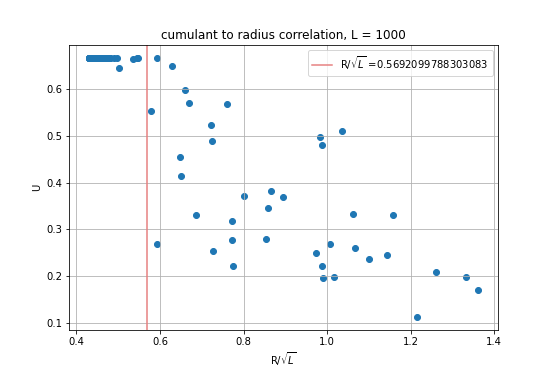

In [77]:
%matplotlib notebook
plt.figure()
plt.title(r'cumulant to radius correlation, L = 1000')
plt.xlabel(r'R/$\sqrt{L}$')
plt.ylabel(r'U')
plt.scatter([r/np.sqrt(1000) for r in R], U)
plt.axvline(x=18/np.sqrt(1000), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(18/np.sqrt(1000)))
plt.legend(loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


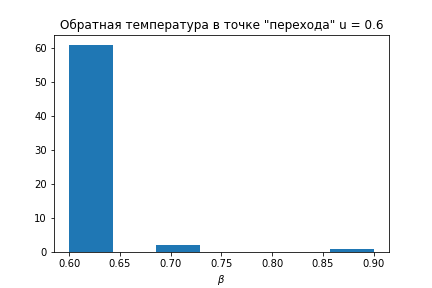

In [192]:
%matplotlib notebook
beta_hist = []
k = 0
for b in beta_transition:
    if b > 0:
        beta_hist.append(b)
        

plt.figure()
plt.title('Обратная температура в точке \"перехода\" u = ' + str(U_transition))
plt.xlabel(r'$\beta$')
plt.hist(beta_hist, bins=7)
plt.show()

In [193]:
len(beta_hist)

64

<IPython.core.display.Javascript object>


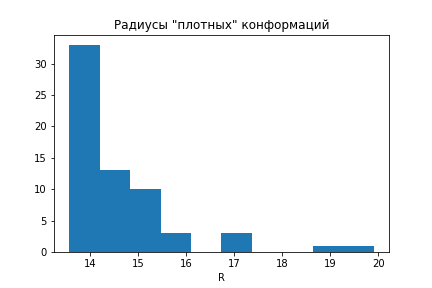

In [194]:
%matplotlib notebook
R_hist = []
for i in range(len(R)):
    if U_good[i]:
        R_hist.append(R[i])

plt.figure()
plt.title('Радиусы \"плотных\" конформаций')
plt.xlabel('R')
plt.hist(R_hist, bins=10)
plt.show()

<IPython.core.display.Javascript object>


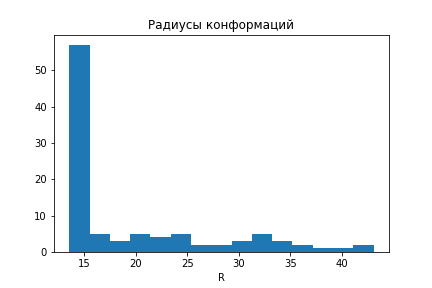

In [197]:
%matplotlib notebook
plt.figure()
plt.title('Радиусы конформаций')
plt.xlabel('R')
plt.hist(R, bins=15)
plt.show()

<IPython.core.display.Javascript object>


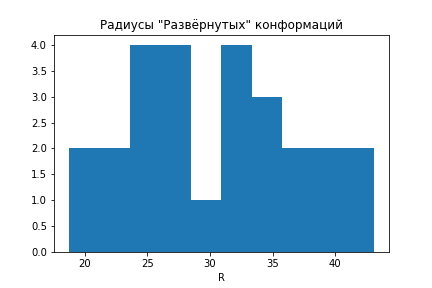

In [124]:
%matplotlib notebook
R_hist = []
for i in range(len(R)):
    if not U_good[i]:
        R_hist.append(R[i])

plt.figure()
plt.title('Радиусы \"Развёрнутых\" конформаций')
plt.xlabel('R')
plt.hist(R_hist, bins=10)
plt.show()

In [35]:
# mean Binder cumulant
%matplotlib inline
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
betas = np.linspace(0.1, 1, 10)
R_normal = 17 #np.sqrt(1000) / 2
conf_count = 0
u = [0] * len(betas)
R = [0] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if radius_of_gyration(struct) > R_normal:
            if radius_of_gyration(struct) < R_normal + 3:
                print(j)
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
u = [U / conf_count for U in u]

u_err = [0] * len(betas)
conf_count = 0
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if radius_of_gyration(struct) > R_normal:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2


u_err = [np.sqrt(u / conf_count) for u in u_err]

U1000 = u
U1000_err = u_err
print(R_normal)
print('fraction of dence conformations =', conf_count / N_rep)

28
32
37
43
87
90
17
fraction of dence conformations = 0.6


<IPython.core.display.Javascript object>


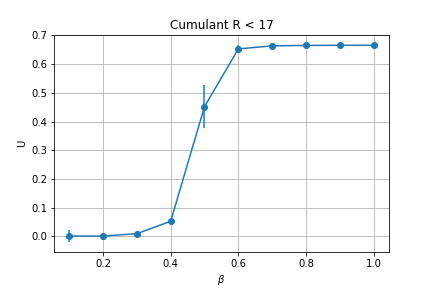

In [15]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant R < '+str(R_normal))
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U1000, yerr=U1000_err, fmt='o-')
plt.grid(True)
plt.show()

In [36]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant')
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U250, yerr=U250_err, fmt='o-', label='250')
plt.errorbar(betas, U500, yerr=U500_err, fmt='o-', label='500')
plt.errorbar(betas, U1000, yerr=U1000_err, fmt='o-', label='1000')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [146]:
%matplotlib notebook
plt.figure()
plt.title('Куулянты')
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U250, fmt='o-', label='250')
plt.errorbar(betas, U500, fmt='o-', label='500')
plt.errorbar(betas, U1000, fmt='o-', label='1000')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

## length = 2000

In [155]:
dir_name = 'Conformations\\L2000_beta0.0_1_10\\'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 100


In [156]:
%matplotlib inline
# mean Binder cumulant
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
U_transition = 0.6
betas = np.linspace(0.1, 1, 10)
U_good = [False] * N_conf
R = [0] * N_conf
U = [0] * N_conf
beta_transition = [-1] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        u = [0] * len(betas)
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] = 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
        U_good[j] = max(u) >= U_transition
        U[j] = max(u)
        for k in range(len(betas)):
            if u[k] >= U_transition:
                beta_transition[j] = betas[k]
                break
        R[j] = radius_of_gyration(struct)
        print(j, 'R =',R[j], U_good[j])
#         plt.figure()
#         plt.title('cumulant')
#         plt.xlabel(r'$\beta')
#         plt.ylabel('u')
#         plt.ylim([0, 1])
#         plt.errorbar(betas, u, fmt='o-')
#         plt.grid(True)
#         plt.show()
        
#         plt.figure()
#         plt.title('mag2')
#         plt.xlabel(r'$\beta')
#         plt.ylabel('mag2')
#         plt.ylim([0, 1])
#         plt.errorbar(betas, [m.mean for m in mag2], fmt='o-')
#         plt.grid(True)
#         plt.show()
    


0 R = 38.74444315436328 False
1 R = 19.68812339689991 True
2 R = 47.95076865876063 False
3 R = 19.396675409082885 True
4 R = 20.831284696155997 True
5 R = 23.270576451641162 True
6 R = 21.604151116618617 True
7 R = 50.52294354581402 False
8 R = 24.02397673687439 True
9 R = 19.67777610208932 True
10 R = 52.329984689426226 False
11 R = 19.586578326521103 True
12 R = 20.171711796937142 True
13 R = 32.65048596503104 False
14 R = 19.49519883731887 True
15 R = 26.363056253255323 False
16 R = 18.705905367734797 True
17 R = 20.739641046943557 True
18 R = 20.42002070298114 True
19 R = 21.931977740265193 True
20 R = 40.170294118381975 False
21 R = 37.62746401891831 False
22 R = 33.61406564393146 False
23 R = 20.261687192781107 True
24 R = 20.389570336028843 True
25 R = 43.661575575498524 False
26 R = 43.21448605874803 False
27 R = 25.172091260223926 False
28 R = 29.55394067179392 False
29 R = 19.453656895868864 True
30 R = 34.26009925059674 False
31 R = 20.25562940036583 True
32 R = 27.653721503

In [157]:
%matplotlib notebook
plt.figure()
plt.title(r'cumulant to radius correlation, L = 2000')
plt.xlabel(r'R/$\sqrt{L}$')
plt.ylabel(r'U')
plt.scatter([r/np.sqrt(2000) for r in R], U)
plt.axvline(x=25/np.sqrt(2000), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(25/np.sqrt(2000)))
plt.legend(loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


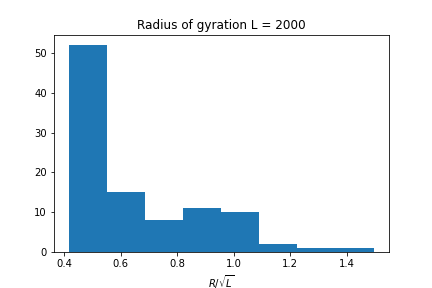

In [87]:
plt.figure()
plt.title('Radius of gyration L = 2000')
plt.xlabel(r'$R/\sqrt{L}$')
plt.hist([r/np.sqrt(2000) for r in R], bins='auto')

plt.show()

In [42]:
# mean Binder cumulant
%matplotlib inline
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
betas = np.linspace(0.1, 1, 10)
R_normal = 25 #np.sqrt(1000) / 2
conf_count = 0
u = [0] * len(betas)
R = [0] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if radius_of_gyration(struct) > R_normal:
            if radius_of_gyration(struct) < R_normal + 3:
                print(j)
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
u = [U / conf_count for U in u]

u_err = [0] * len(betas)
conf_count = 0
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if radius_of_gyration(struct) > R_normal:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2


u_err = [np.sqrt(u / conf_count) for u in u_err]

U2000 = u
U2000_err = u_err
print(R_normal)
print('fraction of dence conformations =', conf_count / N_rep)

15
27
32
58
59
61
70
72
83
25
fraction of dence conformations = 0.53


<IPython.core.display.Javascript object>


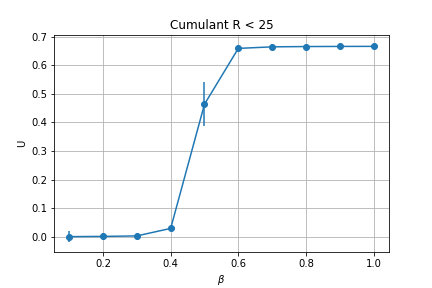

In [43]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant R < '+str(R_normal))
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U2000, yerr=U2000_err, fmt='o-')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


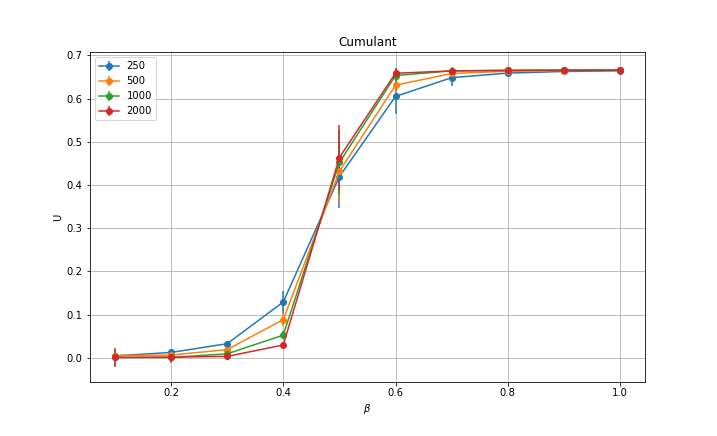

In [44]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant')
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U250, yerr=U250_err, fmt='o-', label='250')
plt.errorbar(betas, U500, yerr=U500_err, fmt='o-', label='500')
plt.errorbar(betas, U1000, yerr=U1000_err, fmt='o-', label='1000')
plt.errorbar(betas, U2000, yerr=U2000_err, fmt='o-', label='2000')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# cumulant $\beta\in (0.4, 0.6)$

In [14]:
dir_name = 'Conformations\\L250_beta0.4_0.6_10\\'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 100


In [15]:
# mean Binder cumulant
%matplotlib inline
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
betas = np.linspace(0.4+(0.2/10), 0.6, 10)
R_normal = 7.3
conf_count = 0
u = [0] * len(betas)
R = [0] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        R[j] = radius_of_gyration(struct)
        if R[j] > R_normal:
            if radius_of_gyration(struct) < R_normal + 3:
                print(j)
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
u = [U / conf_count for U in u]

u_err = [0] * len(betas)
conf_count = 0
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if R[j] > R_normal:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2

u_err = [np.sqrt(u / conf_count) for u in u_err]

U250 = u
U250_err = u_err
print(R_normal)
print("Accepted conformations fraction=", conf_count / N_conf)

2
3
5
6
9
10
12
13
14
15
16
17
18
21
23
26
28
30
31
34
37
38
41
46
47
49
51
52
54
55
56
59
60
62
64
68
69
70
71
74
76
77
84
85
86
92
93
7.3
Accepted conformations fraction= 0.31


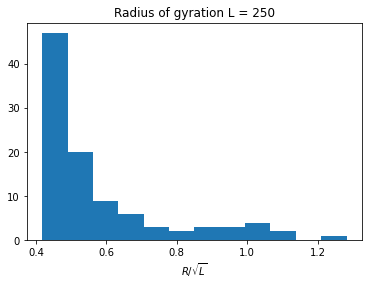

In [15]:
plt.figure()
plt.title('Radius of gyration L = 250')
plt.xlabel(r'$R/\sqrt{L}$')
plt.hist([r/np.sqrt(250) for r in R], bins='auto')
plt.show()

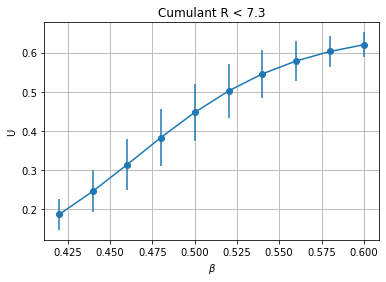

In [16]:
plt.figure()
plt.title('Cumulant R < '+str(R_normal))
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U250, yerr=U250_err, fmt='o-')
plt.grid(True)
plt.show()

6.91
Accepted conformations fraction= 0.11


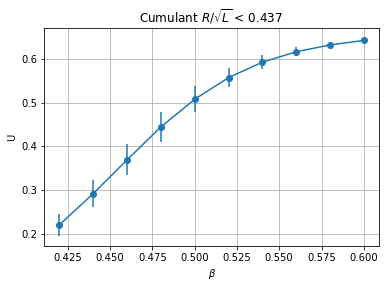

6.92
Accepted conformations fraction= 0.12


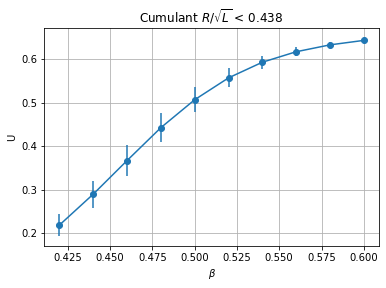

6.93
Accepted conformations fraction= 0.12


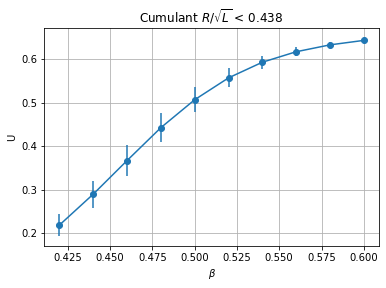

6.9399999999999995
Accepted conformations fraction= 0.12


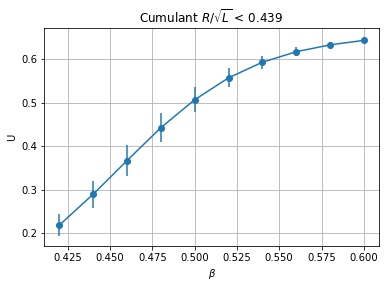

6.949999999999999
Accepted conformations fraction= 0.12


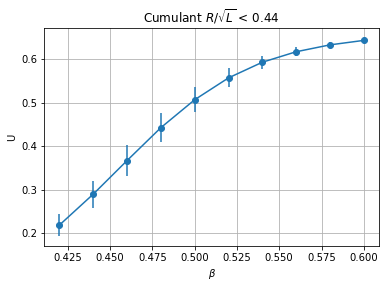

6.959999999999999
Accepted conformations fraction= 0.12


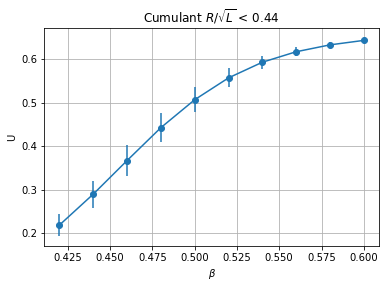

6.969999999999999
Accepted conformations fraction= 0.12


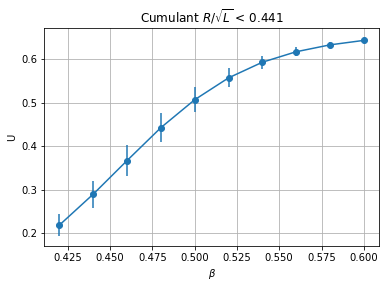

6.979999999999999
Accepted conformations fraction= 0.12


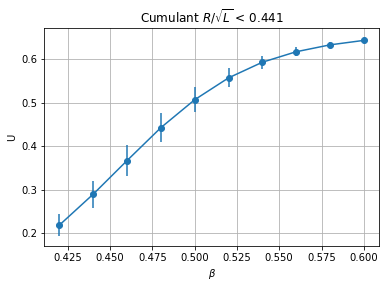

6.989999999999998
Accepted conformations fraction= 0.13


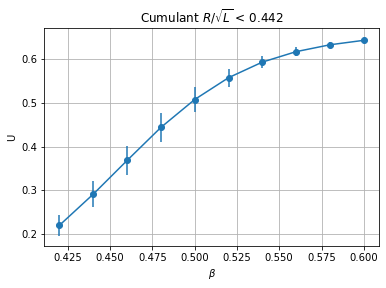

6.999999999999998
Accepted conformations fraction= 0.13


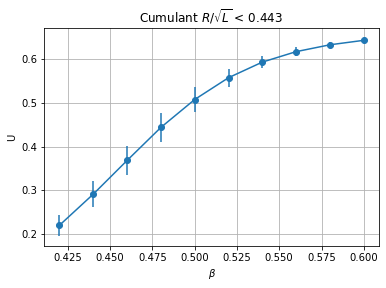

7.009999999999998
Accepted conformations fraction= 0.13


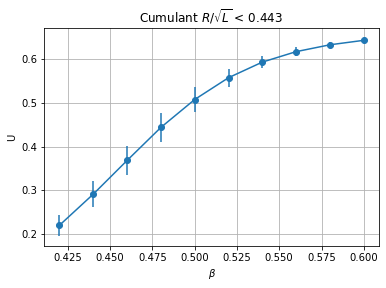

7.019999999999998
Accepted conformations fraction= 0.14


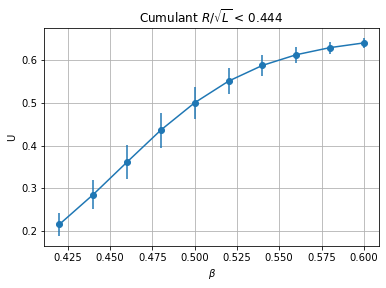

7.029999999999998
Accepted conformations fraction= 0.16


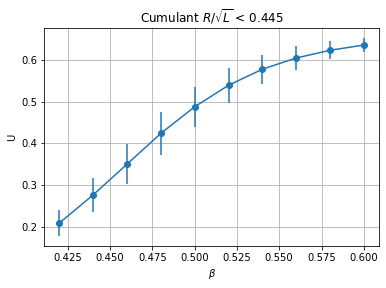

7.039999999999997
Accepted conformations fraction= 0.16


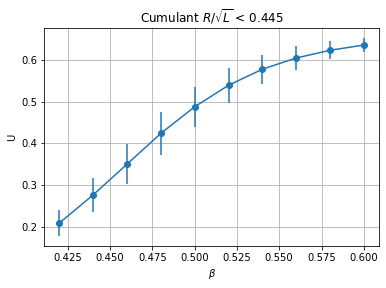

7.049999999999997
Accepted conformations fraction= 0.17


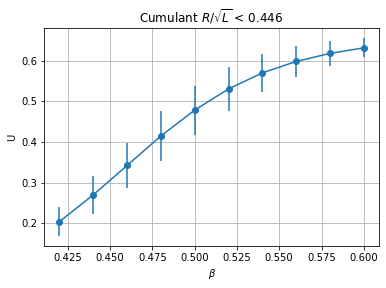

7.059999999999997
Accepted conformations fraction= 0.18


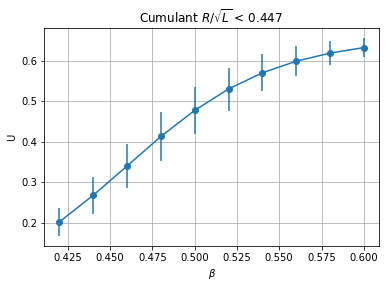

7.069999999999997
Accepted conformations fraction= 0.18


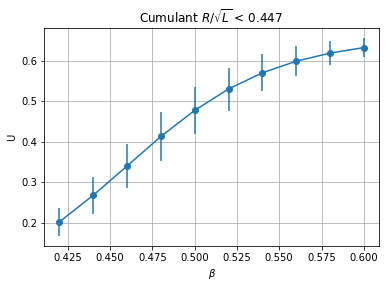

7.0799999999999965
Accepted conformations fraction= 0.2


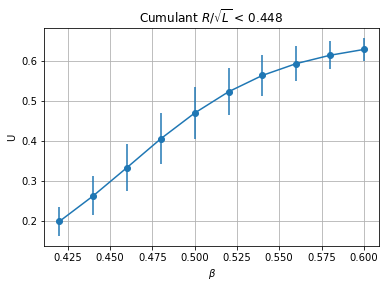

7.089999999999996
Accepted conformations fraction= 0.2


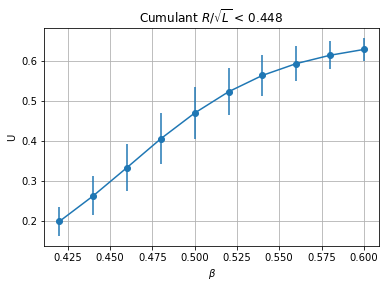

7.099999999999996
Accepted conformations fraction= 0.2


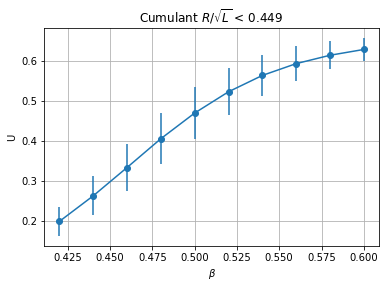

In [21]:
def shift_R(dir_name, R_start, N_steps)
    num_file = open(dir_name + 'num_of_files.txt', 'r')
    N_conf = int(num_file.readline())
    N_rep = int(num_file.readline().split()[0])
    print('number of conformations =', N_conf)
    print('number replicas with same length =', N_rep)
    num_file.close()
    R = [0] * N_conf
    for i in range(0, N_conf, N_rep):
        for j in range(i, i+N_rep):
            struct = read_conformation(struct_f_mane+str(j)+'.dat')
            R[j] = radius_of_gyration(struct)
    
    for i in range(N_steps):
        R_normal += step_L
        %matplotlib inline
        f_name = dir_name + 'conf_data_'
        struct_f_mane = dir_name + 'struct_conf_'
        betas = np.linspace(0.4+(0.2/10), 0.6, 10)
        conf_count = 0
        u = [0] * len(betas)
        R = [0] * N_conf
        for i in range(0, N_conf, N_rep):
            for j in range(i, i+N_rep):
                struct = read_conformation(struct_f_mane+str(j)+'.dat')
                R[j] = radius_of_gyration(struct)
                if R[j] > R_normal:
                    continue
                conf_count += 1
                data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
                mag2 = data['mag2']
                mag4 = data['mag4']
                for k in range(len(betas)):
                    u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)

        u = [U / conf_count for U in u]

        u_err = [0] * len(betas)
        conf_count = 0
        for i in range(0, N_conf, N_rep):
            for j in range(i, i+N_rep):
                struct = read_conformation(struct_f_mane+str(j)+'.dat')
                if R[j] > R_normal:
                    continue
                conf_count += 1
                data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
                mag2 = data['mag2']
                mag4 = data['mag4']
                for k in range(len(betas)):
                    u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2

        u_err = [np.sqrt(u / conf_count) for u in u_err]

        U250 = u
        U250_err = u_err
        print(R_normal)
        print("Accepted conformations fraction=", conf_count / N_conf)

        plt.figure()
        plt.title(r'Cumulant $R/\sqrt{L}$ < '+str(round(R_to_norm(R_normal, 250), 3)))
        plt.xlabel(r'$\beta$')
        plt.ylabel('U')
        plt.errorbar(betas, U250, yerr=U250_err, fmt='o-')
        plt.grid(True)
        plt.show()

In [41]:
dir_name = 'Conformations\\L500_beta0.4_0.6_10\\'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 100


In [42]:
# mean Binder cumulant
%matplotlib inline
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
betas = np.linspace(0.4+(0.2/10), 0.6, 10)
R_normal = 13.5
conf_count = 0
u = [0] * len(betas)
R = [0] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        print(j)
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        R[j] = radius_of_gyration(struct)
        if R[j] > R_normal:
            if radius_of_gyration(struct) < R_normal + 3:
                print(j)
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
u = [U / conf_count for U in u]

u_err = [0] * len(betas)
conf_count = 0
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if R[j] > R_normal:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2


u_err = [np.sqrt(u / conf_count) for u in u_err]

U500 = u
U500_err = u_err
print(R_normal)
print("Accepted conformations fraction=", conf_count / N_conf)

0
1
2
3
4
5
6
7
7
8
9
10
11
12
13
13
14
15
16
17
18
19
20
20
21
22
23
24
25
26
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
59
60
61
61
62
63
64
65
66
67
68
69
69
70
70
71
72
73
74
75
76
77
78
79
79
80
81
82
83
83
84
85
86
87
87
88
89
90
91
92
93
94
95
96
96
97
98
99
13.5
Accepted conformations fraction= 0.65


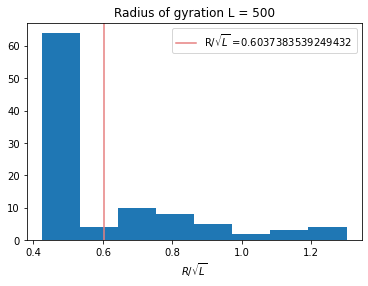

In [43]:
plt.figure()
plt.title('Radius of gyration L = 500')
plt.xlabel(r'$R/\sqrt{L}$')
plt.hist([r/np.sqrt(500) for r in R], bins='auto')
plt.axvline(x=13.5/np.sqrt(500), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(13.5/np.sqrt(500)))
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


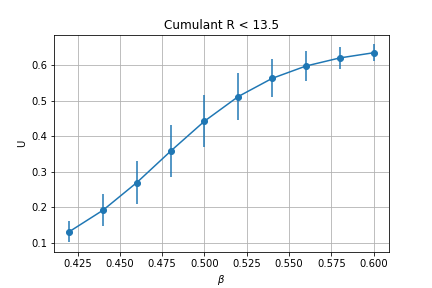

In [44]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant R < '+str(R_normal))
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U500, yerr=U500_err, fmt='o-')
plt.grid(True)
plt.show()

12.1
Accepted conformations fraction= 0.64


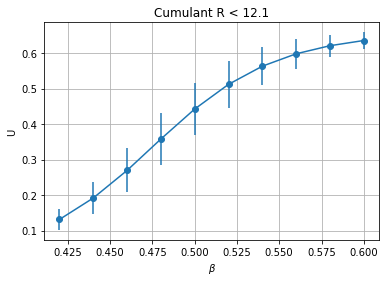

12.2
Accepted conformations fraction= 0.64


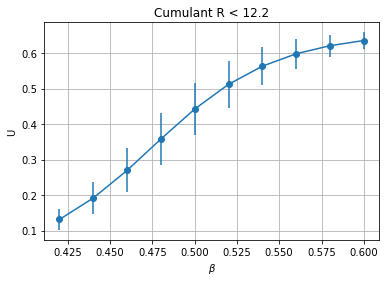

12.299999999999999
Accepted conformations fraction= 0.65


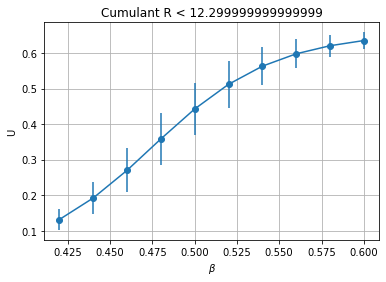

12.399999999999999
Accepted conformations fraction= 0.65


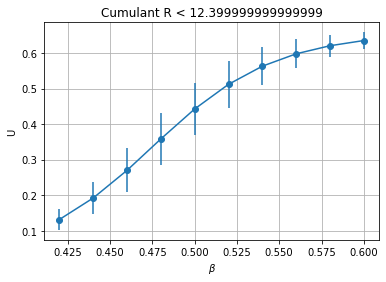

12.499999999999998
Accepted conformations fraction= 0.65


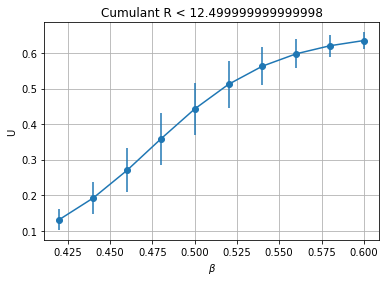

12.599999999999998
Accepted conformations fraction= 0.65


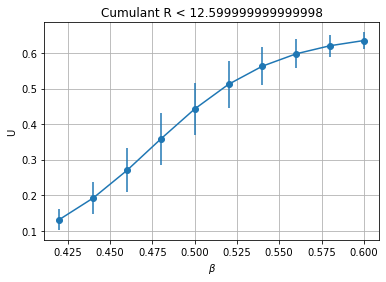

12.699999999999998
Accepted conformations fraction= 0.65


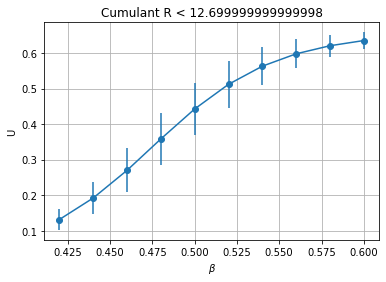

12.799999999999997
Accepted conformations fraction= 0.65


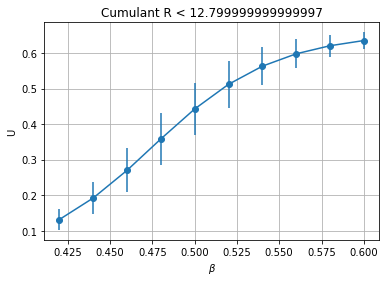

12.899999999999997
Accepted conformations fraction= 0.65


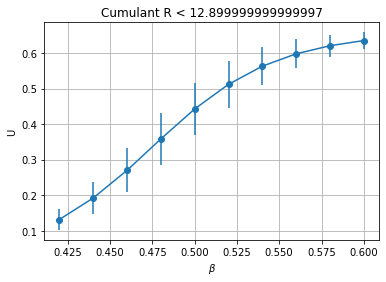

12.999999999999996
Accepted conformations fraction= 0.65


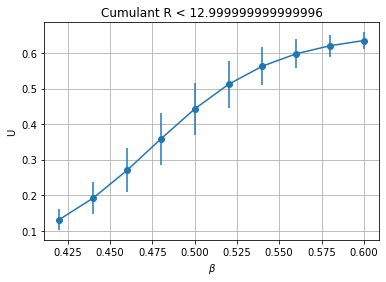

13.099999999999996
Accepted conformations fraction= 0.65


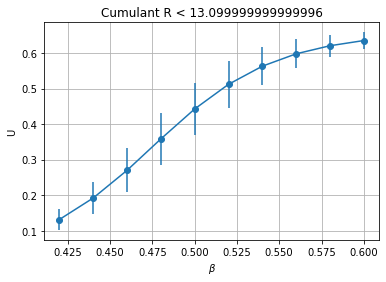

13.199999999999996
Accepted conformations fraction= 0.65


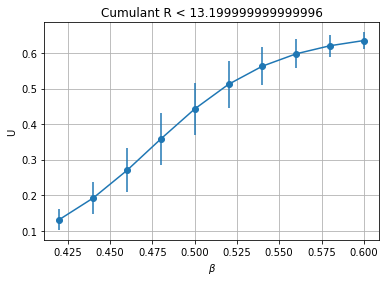

13.299999999999995
Accepted conformations fraction= 0.65


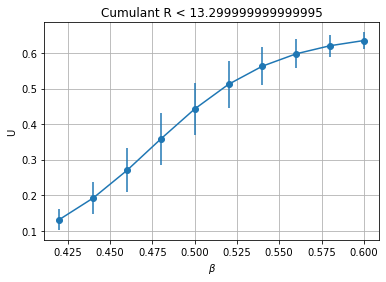

13.399999999999995
Accepted conformations fraction= 0.65


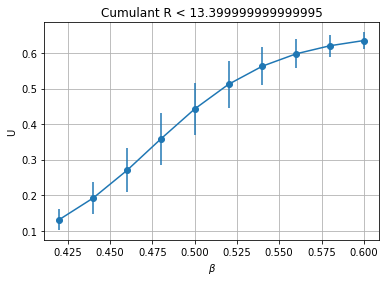

13.499999999999995
Accepted conformations fraction= 0.65


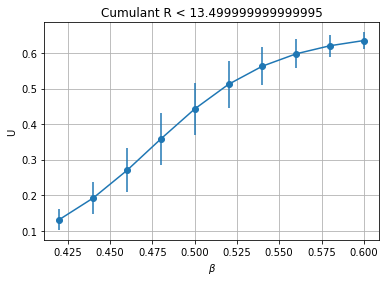

13.599999999999994
Accepted conformations fraction= 0.65


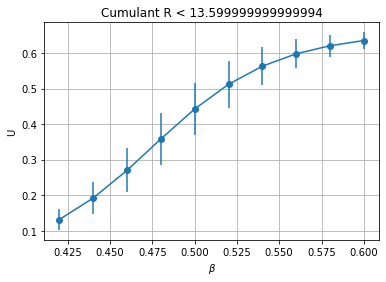

13.699999999999994
Accepted conformations fraction= 0.65


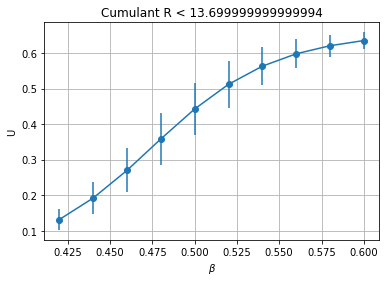

13.799999999999994
Accepted conformations fraction= 0.65


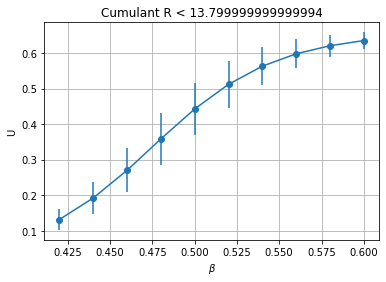

13.899999999999993
Accepted conformations fraction= 0.66


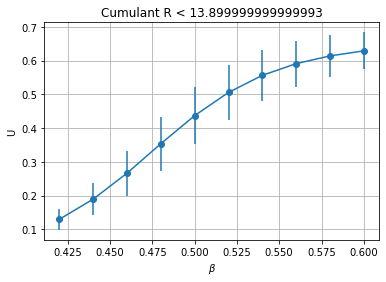

13.999999999999993
Accepted conformations fraction= 0.67


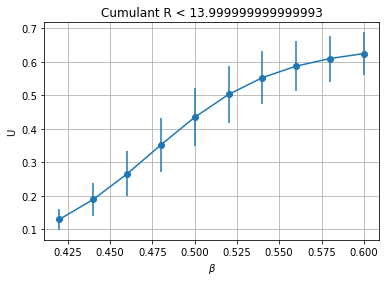

In [47]:
R_normal = 12
for i in range(20):
    R_normal += 0.1
    %matplotlib inline
    f_name = dir_name + 'conf_data_'
    struct_f_mane = dir_name + 'struct_conf_'
    betas = np.linspace(0.4+(0.2/10), 0.6, 10)
    conf_count = 0
    u = [0] * len(betas)
    R = [0] * N_conf
    for i in range(0, N_conf, N_rep):
        for j in range(i, i+N_rep):
            struct = read_conformation(struct_f_mane+str(j)+'.dat')
            R[j] = radius_of_gyration(struct)
            if R[j] > R_normal:
                continue
            conf_count += 1
            data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
            mag2 = data['mag2']
            mag4 = data['mag4']
            for k in range(len(betas)):
                u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)

    u = [U / conf_count for U in u]

    u_err = [0] * len(betas)
    conf_count = 0
    for i in range(0, N_conf, N_rep):
        for j in range(i, i+N_rep):
            struct = read_conformation(struct_f_mane+str(j)+'.dat')
            if R[j] > R_normal:
                continue
            conf_count += 1
            data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
            mag2 = data['mag2']
            mag4 = data['mag4']
            for k in range(len(betas)):
                u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2

    u_err = [np.sqrt(u / conf_count) for u in u_err]

    U250 = u
    U250_err = u_err
    print(R_normal)
    print("Accepted conformations fraction=", conf_count / N_conf)
    
    plt.figure()
    plt.title('Cumulant R < '+str(R_normal))
    plt.xlabel(r'$\beta$')
    plt.ylabel('U')
    plt.errorbar(betas, U250, yerr=U250_err, fmt='o-')
    plt.grid(True)
    plt.show()

In [30]:
dir_name = 'Conformations\\L1000_beta0.4_0.6_10\\'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 100


In [31]:
# mean Binder cumulant
%matplotlib inline
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
betas = np.linspace(0.4+(0.2/10), 0.6, 10)
R_normal = 18
conf_count = 0
u = [0] * len(betas)
R = [0] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        print(j)
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        R[j] = radius_of_gyration(struct)
        if R[j] > R_normal:
            if radius_of_gyration(struct) < R_normal + 3:
                print(j)
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
u = [U / conf_count for U in u]

u_err = [0] * len(betas)
conf_count = 0
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if R[j] > R_normal:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2


u_err = [np.sqrt(u / conf_count) for u in u_err]

U1000 = u
U1000_err = u_err
print(R_normal)
print("Accepted conformations fraction=", conf_count / N_conf)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
13
14
15
16
17
18
19
20
20
21
22
23
24
25
26
27
28
28
29
30
31
32
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
87
88
89
90
91
92
93
94
95
96
97
98
99
18
Accepted conformations fraction= 0.63


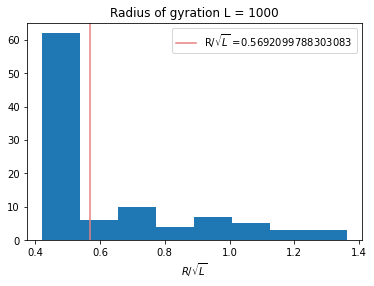

In [32]:
plt.figure()
plt.title('Radius of gyration L = 1000')
plt.xlabel(r'$R/\sqrt{L}$')
plt.hist([r/np.sqrt(1000) for r in R], bins='auto')
plt.axvline(x=18/np.sqrt(1000), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(18/np.sqrt(1000)))
plt.legend(loc='best')
plt.show()

In [38]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant R < '+str(R_normal))
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U1000, yerr=U1000_err, fmt='o-')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [33]:
dir_name = 'Conformations\\L2000_beta0.4_0.6_10\\'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 100


In [34]:
# mean Binder cumulant
%matplotlib inline
f_name = dir_name + 'conf_data_'
struct_f_mane = dir_name + 'struct_conf_'
betas = np.linspace(0.4+(0.2/10), 0.6, 10)
R_normal = 25
conf_count = 0
u = [0] * len(betas)
R = [0] * N_conf
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        print(j)
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        R[j] = radius_of_gyration(struct)
        if R[j] > R_normal:
            if radius_of_gyration(struct) < R_normal + 3:
                print(j)
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
            
u = [U / conf_count for U in u]

u_err = [0] * len(betas)
conf_count = 0
for i in range(0, N_conf, N_rep):
    for j in range(i, i+N_rep):
        struct = read_conformation(struct_f_mane+str(j)+'.dat')
        if R[j] > R_normal:
            continue
        conf_count += 1
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(len(betas)):
            u_err[k] += (u[k] - (1 - mag4[k].mean / (3 * mag2[k].mean**2)))**2


u_err = [np.sqrt(u / conf_count) for u in u_err]

U2000 = u
U2000_err = u_err
print(R_normal)
print("Accepted conformations fraction=", conf_count / N_conf)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
15
16
17
18
19
20
21
22
23
24
25
26
27
27
28
29
30
31
32
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
58
59
59
60
61
61
62
63
64
65
66
67
68
69
70
70
71
72
72
73
74
75
76
77
78
79
80
81
82
83
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
25
Accepted conformations fraction= 0.53


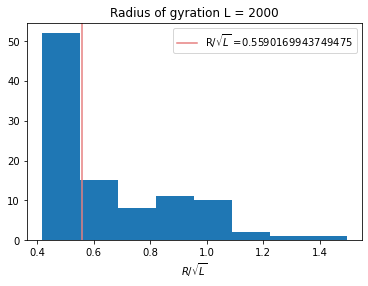

In [35]:
plt.figure()
plt.title('Radius of gyration L = 2000')
plt.xlabel(r'$R/\sqrt{L}$')
plt.hist([r/np.sqrt(2000) for r in R], bins='auto')
plt.axvline(x=25/np.sqrt(2000), color = (0.9, 0.5, 0.5), label=r'R/$\sqrt{L}$ ='+str(25/np.sqrt(2000)))
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


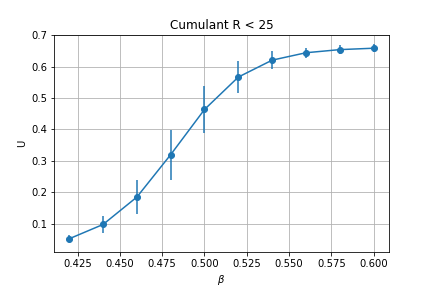

In [173]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant R < '+str(R_normal))
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U2000, yerr=U2000_err, fmt='o-')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


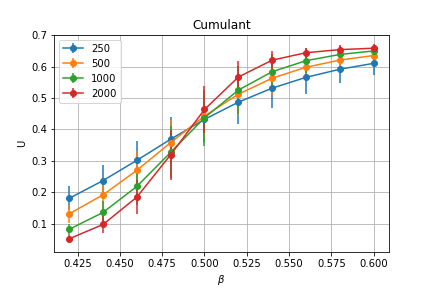

In [149]:
%matplotlib notebook
plt.figure()
plt.title('Cumulant')
plt.xlabel(r'$\beta$')
plt.ylabel('U')
plt.errorbar(betas, U250, yerr=U250_err, fmt='o-', label='250')
plt.errorbar(betas, U500, yerr=U500_err, fmt='o-', label='500')
plt.errorbar(betas, U1000, yerr=U1000_err, fmt='o-', label='1000')
plt.errorbar(betas, U2000, yerr=U2000_err, fmt='o-', label='2000')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Reading cluster update results

In [27]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [28]:
%%cython

def energy(long[::1] spins, 
           long[:, ::1] neighbors,
           double J=1.0):
    """Ising model energy of a spin state.
    """
    cdef:
        double ene = 0.0
        Py_ssize_t site, site1, num_neighb

    for site in range(spins.shape[0]):
        num_neighb = neighbors[site, 0]
        for j in range(1, num_neighb+1):
            site1 = neighbors[site, j]
            ene += -J * spins[site] * spins[site1]
    
    # each bond is counted twice, hence divide by two
    return ene / 2.0

In [29]:
%%cython
def magnetization(long[::1] spins):
    cdef:
        double mag = 0.0
        Py_ssize_t site
    
    for site in range(spins.shape[0]):
        mag += spins[site]

    return mag

In [30]:
neigh = tabulate_neighbors(struct)
ene_cluster = np.empty(N, dtype=RealObservable)
mag_2_cluster = np.empty(N, dtype=RealObservable)
fname = r'size10_min1_max3.5_step0.0625_batch1000_re100_N10000_square'

file = open(fname, 'r')
for i in range(N):
    e = RealObservable()
    m = RealObservable()
    for j in range(1000):
        spins = np.empty((size**2), dtype=int)
        for row in range(size):
            line = file.readline().split()
            for col in range(size):
                spins[row*size + col] = int(line[col])
        file.readline()
        e_cur = energy(spins, neigh) / (size**2)
        mag_cur = magnetization(spins) / (size**2)
        m.add_measurement(mag_cur**2)
        e.add_measurement(e_cur)
    ene_cluster[i] = e
    mag_2_cluster[i] = m

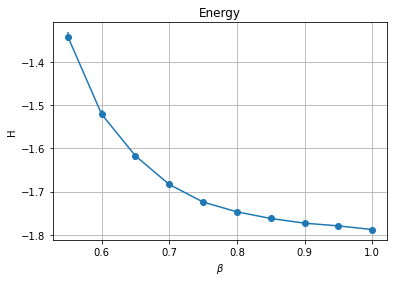

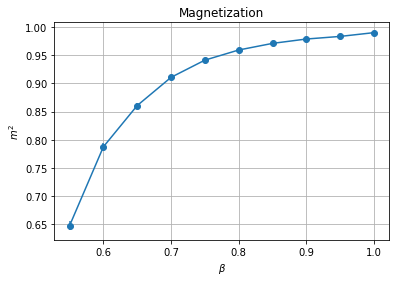

In [31]:
betas = np.linspace(0.5+(1 - 0.5)/10, 1, 10)

plt.figure()
plt.title("Energy")
plt.xlabel(r"$\beta$")
plt.ylabel("H")
plt.errorbar(betas, [e.mean for e in ene_cluster], yerr = [e.errorbar for e in ene_cluster], fmt='o-')
plt.grid(True)
plt.show()

plt.figure()
plt.title("Magnetization")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$m^2$")
plt.errorbar(betas, [m.mean for m in mag_2_cluster], yerr = [m.errorbar for m in mag_2_cluster], fmt='o-')
plt.grid(True)
plt.show()

In [32]:
 [m.errorbar for m in mag_2_cluster]

[0.0076463164928589145,
 0.006452619142231602,
 0.004698087282258982,
 0.003629187106607531,
 0.002770424149948951,
 0.0019021875337112601,
 0.0016461744753039633,
 0.001155204762325028,
 0.0014288568154027707,
 0.000709423546951302]

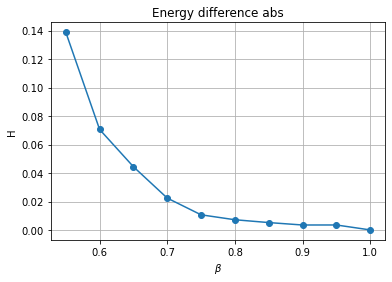

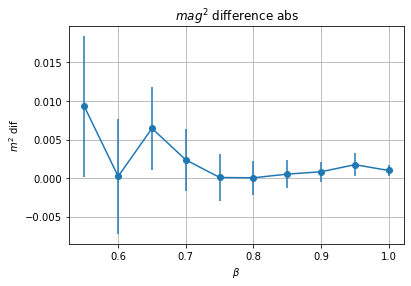

In [36]:
betas = np.linspace(0.5+(1 - 0.5)/10, 1, 10)

plt.figure()
plt.title("Energy difference abs")
plt.xlabel(r"$\beta$")
plt.ylabel("H")
plt.errorbar(betas, [abs(e1.mean - e2.mean) for e1, e2 in zip(ene_cluster, ene)], fmt='o-')
plt.grid(True)
plt.show()

betas = np.linspace(0.5+(1 - 0.5)/10, 1, 10)

plt.figure()
plt.title(r"$mag^2$ difference abs")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$m^2$ dif")
plt.errorbar(betas, [abs(e1.mean - e2.mean) for e1, e2 in zip(mag_2_cluster, mag2)], yerr = [m1.errorbar + m2.errorbar for m1, m2 in zip(mag2,mag_2_cluster)], fmt='o-')
plt.grid(True)
plt.show()

## Radius of giration test

In [48]:
def generate_test_conf(W, H):
    struct = []
    for x in range(W * 2):
        for y in range(H):
            if x % 2 == 0:
                struct.append([x, y])
            else:
                struct.append([x, H-1-y])
                
    struct.append([W*2, 0])
    for y in range(H):
        struct.append([W*2+1, y])
            
    struct.append([W*2+2, H-1])
    for y in range(H):
        struct.append([W*2+3, H-1-y])
        
    struct.append([W*2+4, 0])
    for x in range(W*2+5, W*2+5+W*2):
        for y in range(H):
            if (x - W*2-5) % 2 == 0:
                struct.append([x, y])
            else:
                struct.append([x, H-1-y])
    return struct

def generate_test_conf_2(W, H):
    struct = []
    for x in range(W * 2):
        for y in range(H):
            if x % 2 == 0:
                struct.append([x, y])
            else:
                struct.append([x, H-1-y])
                
    struct.append([W*2, 0])
    
    for x in range(W*2+1, W*2+1+W*2):
        for y in range(H):
            if (x - W*2-1) % 2 == 0:
                struct.append([x, y])
            else:
                struct.append([x, H-1-y])
    return struct

59


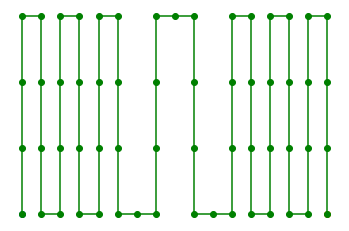

In [28]:
struct_teest = generate_test_conf(3, 4)
print(len(struct_teest))
draw_conformation(struct_teest)

245


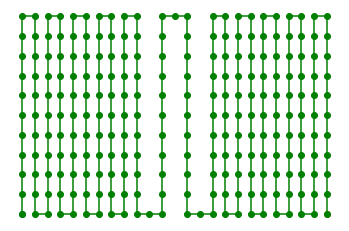

8.259786516780592
0.5276984037473603


In [32]:
struct_teest = generate_test_conf(5, 11)
print(len(struct_teest))
draw_conformation(struct_teest)
print(utils.radius_of_gyration(struct_teest))
print(utils.R_to_norm(utils.radius_of_gyration(struct_teest), len(struct_teest)))

245


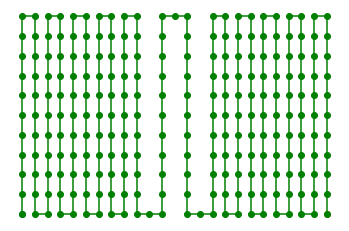

radius of giration = 8.259786516780592
length of conformation = 245
beta =  1.0   T =  1.0
Conformation size = 245

----- sweep =  0 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.0
  ene =  -1.689795918367347  (naive)
      =  -1.689795918367347 +/- 0.0
  mag^2 =  0.0001499375260


----- sweep =  90000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.0
  ene =  -1.6948128240753302  (naive)
      =  -1.6947131098533164 +/- 0.0002376331596562569
  mag^2 =  0.42413766399416913 +/- 0.000538391446645982
  mag^4 =  0.3616887523424487 +/- 0.0006793572779296262

----


----- sweep =  190000 spins =  [ 1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -1.6946541956966403  (naive)
      =  -1.694633571645988 +/- 0.00019451259311561452
  mag^2 =  0.42398699583033583 +/- 0.0003582655523436438
  mag^4 =  0.36133550453521535 +/- 0.0004110317925120575

-


----- sweep =  290000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.0
  ene =  -1.6946544237777974  (naive)
      =  -1.6946583320828328 +/- 0.00012803241545309278
  mag^2 =  0.42393490399986516 +/- 0.0002734336122966987
  mag^4 =  0.3613780748330981 +/- 0.0003208982004515092

-


----- sweep =  400000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -1.6946595184568423  (naive)
      =  -1.694657534644717 +/- 0.00010762886365096461
  mag^2 =  0.4241441628867745 +/- 0.0002300428847052914
  mag^4 =  0.361572085548677 +/- 0.00026404663905235757

---

In [65]:
struct_teest = generate_test_conf(5, 11)
print(len(struct_teest))
draw_conformation(struct_teest)
print("radius of giration =", utils.radius_of_gyration(struct_teest))
L = len(struct_teest)
print('length of conformation =', L)

nghbrs = utils.tabulate_neighbors(struct_teest)
ene, mag2, mag4, _ = cy_ising_cluster.simulate(L,
                                              nghbrs,
                                              1,
                                              500000,
                                              300000,
                                              2)

1015


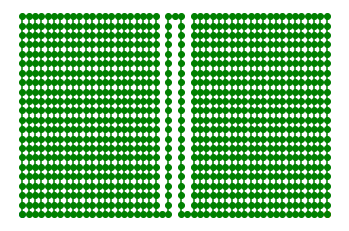

15.896699827270306
0.49896944573952784


In [34]:
struct_teest = generate_test_conf(11, 22)
print(len(struct_teest))
draw_conformation(struct_teest)
print(utils.radius_of_gyration(struct_teest))
print(utils.R_to_norm(utils.radius_of_gyration(struct_teest), len(struct_teest)))

1015


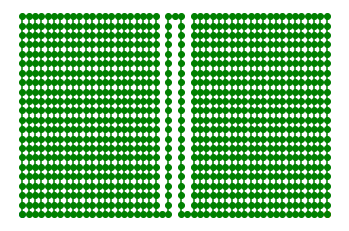

radius of giration = 15.896699827270306
length of conformation = 1015
beta =  1.0   T =  1.0
Conformation size = 1015

----- sweep =  0 spins =  [-1 -1 -1 ...  1  1  1] beta =  1.0
  ene =  -1.8423645320197044  (naive)
      =  -1.8423645320197044 +/- 0.0
  mag^2 =  0.0004280618311533888 +/- 0.0
  mag^4 =  1.8323693129039236e-07 +/- 0.0

----- sweep =  10000 spins =  [1 1 1 ... 1 1 1] beta =  1.0
  ene =  -1.8503428474886738  (naive)
      =  -1.8503575074539802 +/- 0.00045616272487134326
  mag^2 =  0.4599399714357236 +/- 0.0012251278801179528
  mag^4 =  0.42222487669373004 +/- 0.0011864553990238713

----- sweep =  20000 spins =  [ 1  1  1 ... -1 -1 -1] beta =  1.0
  ene =  -1.8507453937648264  (naive)
      =  -1.8507541077910292 +/- 0.000312316585800086
  mag^2 =  0.4605322706715829 +/- 0.0008016229472273801
  mag^4 =  0.42294288727079093 +/- 0.0007739719490078506

----- sweep =  30000 spins =  [ 1  1  1 ... -1 -1 -1] beta =  1.0
  ene =  -1.8507819197489062  (naive)
      =  -1.8507


----- sweep =  300000 spins =  [-1 -1 -1 ... -1 -1 -1] beta =  1.0
  ene =  -1.8506442219842036  (naive)
      =  -1.8506706851652297 +/- 8.352793508736813e-05
  mag^2 =  0.45872737102669037 +/- 0.000283418866186252
  mag^4 =  0.42106675821077777 +/- 0.0002789810949729539

----- sweep =  310000 spins =  [ 1  1  1 ... -1 -1 -1] beta =  1.0
  ene =  -1.8506483317659632  (naive)
      =  -1.8506706851652297 +/- 8.239653970628956e-05
  mag^2 =  0.45872737102669037 +/- 0.000283418866186252
  mag^4 =  0.42106675821077777 +/- 0.0002789810949729539

----- sweep =  320000 spins =  [-1 -1 -1 ... -1 -1 -1] beta =  1.0
  ene =  -1.8506738656538804  (naive)
      =  -1.8506562679766492 +/- 8.072239413510692e-05
  mag^2 =  0.4587785952830227 +/- 0.000283418866186252
  mag^4 =  0.42111184092795395 +/- 0.0002789810949729539

----- sweep =  330000 spins =  [1 1 1 ... 1 1 1] beta =  1.0
  ene =  -1.8506818676112649  (naive)
      =  -1.8506811162638546 +/- 7.902478215898413e-05
  mag^2 =  0.45881389407

In [62]:
struct_teest = generate_test_conf(11, 22)
print(len(struct_teest))
draw_conformation(struct_teest)
print("radius of giration =", utils.radius_of_gyration(struct_teest))
L = len(struct_teest)
print('length of conformation =', L)

nghbrs = utils.tabulate_neighbors(struct_teest)
ene, mag2, mag4, _ = cy_ising_cluster.simulate(L,
                                              nghbrs,
                                              1,
                                              500000,
                                              300000,
                                              2)

In [18]:
1 - 0.42108/(3 * 0.4587383546 ** 2)

0.33301931950409513

241


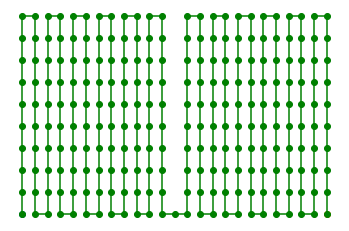

7.889318892895091
0.5081957042647639


In [49]:
struct_teest = generate_test_conf_2(6, 10)
print(len(struct_teest))
draw_conformation(struct_teest)
print(utils.radius_of_gyration(struct_teest))
print(utils.R_to_norm(utils.radius_of_gyration(struct_teest), len(struct_teest)))

241


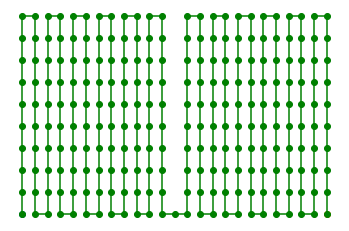

radius of giration = 7.889318892895091
length of conformation = 241
beta =  1.0   T =  1.0
Conformation size = 241

----- sweep =  0 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1] beta =  1.0
  ene =  -1.7593360995850622  (naive)
      =  -1.7593360995850622 +/- 0.0
  mag^2 =  0.0001549560097105766 +/-


----- sweep =  110000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1] beta =  1.0
  ene =  -1.8042663587984336  (naive)
      =  -1.8042681828269618 +/- 7.501759983658164e-05
  mag^2 =  0.7560473998803726 +/- 0.0010948621881685006
  mag^4 =  0.7493351211476902 +/- 0.001093974627041696

----- sweep =  1


----- sweep =  210000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1] beta =  1.0
  ene =  -1.8042618686604108  (naive)
      =  -1.8042917845160131 +/- 5.93535441929041e-05
  mag^2 =  0.7558823867913183 +/- 0.0007432490770431521
  mag^4 =  0.7491989824154166 +/- 0.0007459595106394564

----- sweep =  2


----- sweep =  300000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] beta =  1.0
  ene =  -1.8042035018970983  (naive)
      =  -1.8042051562409944 +/- 5.4385881977218935e-05
  mag^2 =  0.7554607365414246 +/- 0.0006056815546690484
  mag^4 =  0.7487231297529903 +/- 0.0006067572475226571

----- sweep =  310000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 


----- sweep =  390000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1] beta =  1.0
  ene =  -1.8042289305424102  (naive)
      =  -1.8042279289875842 +/- 4.6864272774721034e-05
  mag^2 =  0.7556461580160238 +/- 0.0005313014056159437
  mag^4 =  0.7489182902520238 +/- 0.0005318786641275619

----- sweep = 


Final:
  ene =  -1.8042109211754453  (naive)
  ene =  -1.8042179429514567 +/- 3.7226914241519484e-05
  mag^2 =  0.7557218190346955 +/- 0.00047234128474171803
  mag^4 =  0.7489874852075565 +/- 0.0004734159702059831


In [50]:
print(len(struct_teest))
draw_conformation(struct_teest)
print("radius of giration =", utils.radius_of_gyration(struct_teest))
L = len(struct_teest)
print('length of conformation =', L)

nghbrs = utils.tabulate_neighbors(struct_teest)
ene, mag2, mag4, _ = cy_ising_cluster.simulate(L,
                                              nghbrs,
                                              1,
                                              500000,
                                              300000,
                                              2)

1001


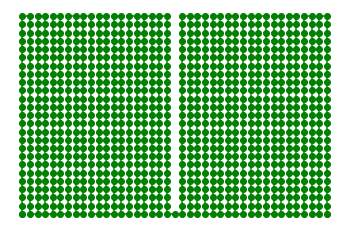

13.980286396784589
0.4418745914640699


In [55]:
struct_teest = generate_test_conf_2(10, 25)
print(len(struct_teest))
draw_conformation(struct_teest)
print(utils.radius_of_gyration(struct_teest))
print(utils.R_to_norm(utils.radius_of_gyration(struct_teest), len(struct_teest)))

1001


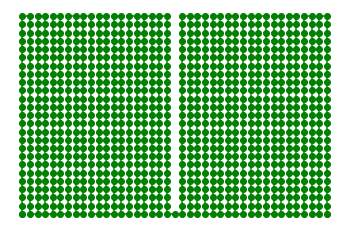

radius of giration = 13.980286396784589
length of conformation = 1001
beta =  1.0   T =  1.0
Conformation size = 1001

----- sweep =  0 spins =  [ 1  1  1 ... -1 -1 -1] beta =  1.0
  ene =  -1.8881118881118881  (naive)
      =  -1.8881118881118881 +/- 0.0
  mag^2 =  9.98002996004994e-07 +/- 0.0
  mag^4 =  9.96009980034944e-13 +/- 0.0

----- sweep =  10000 spins =  [-1 -1 -1 ... -1 -1 -1] beta =  1.0
  ene =  -1.903294385846051  (naive)
      =  -1.9032846265576524 +/- 9.298005187419254e-05
  mag^2 =  0.7615045460152654 +/- 0.0034800169029084228
  mag^4 =  0.7581333916665817 +/- 0.00347154670551607

----- sweep =  20000 spins =  [-1 -1 -1 ... -1 -1 -1] beta =  1.0
  ene =  -1.9033536834645244  (naive)
      =  -1.9033388486513485 +/- 7.986569297845361e-05
  mag^2 =  0.7637501869450019 +/- 0.002976538904825034
  mag^4 =  0.760413967947156 +/- 0.0029609955061947885

----- sweep =  30000 spins =  [-1 -1 -1 ...  1  1  1] beta =  1.0
  ene =  -1.9033371548286508  (naive)
      =  -1.90334818


----- sweep =  320000 spins =  [ 1  1  1 ... -1 -1 -1] beta =  1.0
  ene =  -1.9033291607371423  (naive)
      =  -1.9033286049887668 +/- 1.7136260617772483e-05
  mag^2 =  0.7593563400523712 +/- 0.0006209537813923418
  mag^4 =  0.7560085450266112 +/- 0.000617751338838948

----- sweep =  330000 spins =  [-1 -1 -1 ...  1 -1  1] beta =  1.0
  ene =  -1.9033236726094207  (naive)
      =  -1.9033253916493726 +/- 1.6910302057852745e-05
  mag^2 =  0.7594350234234034 +/- 0.0006175143217960582
  mag^4 =  0.7560854797875629 +/- 0.0006140419217755058

----- sweep =  340000 spins =  [1 1 1 ... 1 1 1] beta =  1.0
  ene =  -1.9033262583614687  (naive)
      =  -1.9033253916493726 +/- 1.682109225654816e-05
  mag^2 =  0.7594350234234034 +/- 0.0006073091947820079
  mag^4 =  0.7560854797875629 +/- 0.0006039817856006737

----- sweep =  350000 spins =  [1 1 1 ... 1 1 1] beta =  1.0
  ene =  -1.9033237641601026  (naive)
      =  -1.9033253916493726 +/- 1.669213809055421e-05
  mag^2 =  0.7594350234234034 +

In [56]:
print(len(struct_teest))
draw_conformation(struct_teest)
print("radius of giration =", utils.radius_of_gyration(struct_teest))
L = len(struct_teest)
print('length of conformation =', L)

nghbrs = utils.tabulate_neighbors(struct_teest)
ene, mag2, mag4, _ = cy_ising_cluster.simulate(L,
                                              nghbrs,
                                              1,
                                              500000,
                                              300000,
                                              2)